# F82H Properties Database

## Table of Contents
- [Abstract (TBD)](#Abstract)
- [1 Introduction](#1-Introduction)
- [2 Fabrication and Microstructure](#2-Fabrication-and-Microstructure)
    - [2.1 F82H Fabrication](#2.1-F82H-Fabrication)
    - [2.2 F82H Microstructure](#2.2-F82H-Microstructure)
- [3 Thermophysical Properties](#3-Thermophysical-Properties)
    - [3.1 Coefficient of Thermal Expansion](#3.1-Coefficient-of-Thermal-Expansion)
    - [3.2 Specific Heat](#3.2-Specific-Heat)
    - [3.3 Thermal Conductivity](#3.3-Thermal-Conductivity)
    - [3.4 Thermal Diffusivity](#3.4-Thermal-Diffusivity)
    - [3.5 Electrical Resistivity](#3.5-Electrical-Resistivity)
    - [3.6 Thermal Emissivity](#3.6-Thermal-Emissivity)
- [4 Mechanical Properties](#4-Mechanical-Properties)
    - [4.1 Elastic Properties](#4.1-Elastic-Properties)
    - [4.2 Yield Strength](#4.2-Yield-Strength)
    - [4.3 Ultimate Strength](#4.3-Ultimate-Strength)
    - [4.4 Uniform Elongation](#4.4-Uniform-Elongation)
    - [4.5 Total Elongation](#4.5-Total-Elongation)
    - [4.6 Creep](#4.6-Creep)
    - [4.7 Fatigue](#4.7-Fatigue)
    - [4.8 Fracture Toughness](#4.8-Fracture-Toughness)

## Abstract
We present a comprehensive database for the ferritic-martensitic steel F82H.  The database is intended to assist in the mechanical design of components manufactured from reduced activation 9 Cr steels (e.g. F82H), in particular, in a fusion reactor power source. The database is classified into three main categories: (1) fabrication and microstructure, (2) thermophysical properties, and (3) mechanical properties.  The effects of irradiation (both neutron and ion) on the properties of F82H are also discussed. Data for each property is collected from various sources available in the public domain.  The sources of data are given together with links to the original publication for verification or corrections. Various functional forms are developed to describe the properties of F82H as a function of temperature, and if available, as a function of the irradiation dose.

## 1 Introduction
Ferritic/martensitic (F/M) steels have been proposed as fusion structures for the past few decades, mainly because of their favorable response to neutron irradiation and their potential low-activation characteristics as compared to austenitic steels. Ghoniem et al. [[1](#ghoniem2013)] estimated the effects of neutron irradiation on the lifetime of a ferritic/martensitic steel structural FW/B.  They used available data and simple design rules (such as limiting the volumetric swelling strain to 5%) to show that an operating design window exists for such structures.  The lower temperature limit is dictated by the shift in the Ductile-to-Brittle-Transition Temperature (DBTT), while the upper-temperature limit is dictated by creep strain accumulation and potential rupture.  The structure lifetime in the intermediate temperature range is limited by volumetric swelling. To determine the precise operational temperature and lifetime of fusion structures, a validated property database is required.  The objective of this document is to assemble such a database in forms that are suitable for large-scale structural and thermal analyses of the first wall and blanket components of fusion reactors. 

Development of specific grades of F/M steels for fusion energy applications followed a parallel path to the larger effort of their development for the power industry, we mention here two fundamental differences.  First, early efforts in introducing generations of fusion steels have recognized the importance and possibility of developing steels that have the characteristic of being "low activation" [[2](#gelles1985low)].  Second, the expected lifetime of structural materials in FW/B applications is only a few years, as opposed to the 40-60 year target for steels employed in most power industries.  The first constraint has led to the elimination of Mo, Nb, Ni, Cu and N, and the introduction of W and V as carbide formers in place of Mo, while Ta was introduced as a replacement for Nb. In addition,  the 7-9\% Cr range was found to be very suitable in the elimination of the $\delta$-ferrite phase, which causes a reduction in fracture toughness.  

Following parallel lines of development to fission reactor steels, the following generations of "fusion steels" have been developed (all compositions are in wt-%): [[3](#ghoniem2013deformation)]
1. *Gen-I. Low Activation F/M Steels (LAFMs)*: The first "low-activation" steel was developed in the mid-eighties on the basis of radioactivity and decay chain analysis of the main elements, and substitutions of Mo in low-Cr steels with V and W. The first such steel is the vanadium steel UCVS-1, with composition: 0.11C, 0.3Mn, 0.3Si, 2.46Cr, 0.05Ni, 1.5V, 0.02Mo, 0.007P, 0.015S, 0.015N, 0.043Al, 0.003Ti, 0.04Cu [[2](#gelles1985low)].
2. *Gen-II. Reduced Activation F/M Steels (RAFs)*: These steels have the composition range: ∼0.1C, 0.04-0.3Si, ∼0.45Mn, 8-9.4Cr, 1-2W, ∼0.25V, 0.04-0.08Ta, 0.01-0.03N, 0.003-0.006B. They have been developed as follows:<br>
a. Japan: F82H, JLF-1 [[4](#jitsukawa2002development)].<br>
b. Europe: Eurofer, Optifer-I, Optifer-II [[5](#chaouadi2009radiation)].<br>
c. US: 9Cr-2WVTa (CNA) [[6](#tan2016development)].<br>
d. China: China Low-Activation Martensitic (CLAM) Steel [[7](#huang2011progress)].
3. *Gen-III. Oxide Dispersion Strengthened Reduced Activation F/M Steels (ODS-RAFM)*: These steels contain dispersoids of oxide particles (yttrium oxide and titanium oxide). Examples of steels under development are PM2000, MA957, with experimental grades of 9-12% Cr (martensites) and 12-20% Cr (ferrites). Although these steels are developed for fusion, they are also being considered for Gen-IV fission reactor steel applications in the cladding and structural supports. The alloy MA957 has a nominal composition 13.87Cr, 1.05Ti, 0.30Mo, 0.22Y2O3, 0.014C, 0.04Si, 0.13N, 0.1Al, 0.006S, while the alloy PM2000 has the composition of 19Cr, 5.5Al , 0.5Ti, 0.5Y2O3. W is sometimes used to replace Mo in fusion ODS steels, with lower Ti concentrations.
Gen-IV. Super ODS-RAFM. Mechanical alloying of metal and oxide powders is being developed to
produce oxide dispersion-strengthened (ODS) ferritic alloys containing nano-scale oxide dispersoids.
4. *Gen-IV. Super ODS-RAFM*: Mechanical alloying of metal and oxide powders is being developed to produce oxide dispersion-strengthened (ODS) ferritic alloys containing nano-scale oxide dispersoids. For example, the alloy 12YWT has the composition: 13.3Cr, 0.92W, 0.46Ti, 0.13Y, 0.19O. The stability of these dispersoids at high temperatures and under irradiation has been studied recently. Ultrafine Ti-, Y- and O-enriched particles were found to be extremely resistant to coarsening during isothermal aging at 1300 °C.

F82H is a ferritic-martensitic steel that has high chromium content and was developed as a reduced radioactivity variant from the commercial 9%-Cr steel (Grade 91) by replacing elements that have long-term radioactive decay chains, such as molybdenum, niobium, and nickel. The chemical composition of F82H is as follows (wt%): N=0.007, Ta=0.04, C=0.09, Si=.07, Mn=0.1, V=0.19, W=1.98, Cr=7.84, Fe=balance.

The development of RAFM steels is based on waste disposal considerations. Waste disposal considerations include:
1. Transportation of discharged components to a permanent storage or recycling site.
2. Burial disposal of waste materials.
3. Recycling of decommissioned materials if practical.

Let’s define radiation dose units as follows.<br>
**Definitions**
1. 1 mSv/a according to U.S. 10CFR-20.1301(a) is the dose limit for individual members of the public, total effective dose equivalent, per annum.
2. $H = Q \times D$; $H$ is tissue equivalent dose (1 Sv = 1 J/Kg), D is absorbed dose in Grays (1 J/Kg).
   
The transportation stage requires a limiting contact dose rate of 2 mSv/h without a radiation shield. The low-level, shallow-land (10CFR61 Class C) waste disposal is a more attractive waste disposal option for fusion. However, the ultimate waste management scenario is the recycling of used materials. For hands-on recycling, the limiting contact dose rate adopted is 25 mSv/h. RAFM steels are optimized for alloy compositions that can be recycled in several hundred years, and for minimum decay heat in accidents. This involves the elimination of elements that induce high radioactivity at shutdown, and those with long-term half-lives. The specific radioactivity after reactor shutdown for three candidate low-activation structural materials and the contact dose rate after the shutdown is shown in Fig. 1.

<figure>
<img src="Figures/activity.png" style="width:45%">
<img src="Figures/dose.png" style="width:45%">
<figcaption align = "center"> Figure 1: Specific activity response and Contact $\gamma$-dose rate response of three fusion structural materials. </figcaption>
</figure>

(Fig. 1 reference: [[8](#cheng1998concentration)])

The effect of impurities on the radioactive decay of RAFM steels is shown in Fig. 2 which gives the surface gamma dose rate dependence on the time after shutdown. First RAFM steels like OPTIFER (70ppm Nb) reached the remote recycling level at about 100 years after irradiation, while EUROFER and F82H mod could be stored as low-level waste after the same period of time after reactor shut-down. The difference between the latter two alloys (hatched area) is due to the lower Nb (1 ppm) content of F82H mod compared to 10 ppm for EUROFER. In order to move into the hands-on-level domain the activation level has to be reduced by two orders of magnitude. This seems to be technically feasible; it requires increased feedstock control and production lines [[9](#lindau2005present)].

<figure>
<img src="Figures/Radioactivity.png" style="width:75%">
<figcaption align = "center"> Figure 2: Calculated decay of $\gamma$ surface dose rate in iron and ferritic–martensitic steels after irradiation (12.5MW/m$^2$) in a first wall DEMO spectrum. </figcaption>
</figure>

(Fig. 2 reference: [[9](#lindau2005present)])

## 2 Fabrication and Microstructure

### 2.1 F82H Fabrication
The production of FM heats usually implies vacuum arc or induction melting, and purification through vacuum arc re-melting, to produce chemically and mechanically homogeneous ingots. Development aspects mainly focus on large-scale smelting and purification techniques. For RAFM steels in particular, there is a need to reduce neutron-induced activation and lower impurities levels. Two fabrication methods have been used for the production of large heats of F82H. The first is Hot Isostatic Pressing (HIP) for near-net-shape structures, and the second is Thermo-Mechanical-Controlled-Processing (TMCP) [[10](#hirose2004effects)]. Because HIPPING is a solid-state bonding process, the process requires heating above temperatures that result in phase transformation and can cause coarsening of Prior-Austenite-Grains (PAG). The ASTM grain size for HIPPED F82H is 8 (17-24 μm), and is 3 (95-135 μm) for the TMCP-produced steel [[10](#hirose2004effects)]. Tempering treatments are done for several hours in the temperature range of 1000-1100 °C. The resulting microstructure is shown in Fig. 7 [[10](#hirose2004effects)]. To dissolve precipitates and normalize the grain size, heating above 1100 °C is required. However, because the $\gamma$-to-$\delta$ ferrite transformation temperature is >1200 °C, homogenization is carried out below 1200 °C. The HIPPING process is sequentially carried out as follows: HIP at >1100 °C ⇒ Normalize at <1000 °C $\Rightarrow$ Temper at 750 °C for 60 min. The heating and cooling rates are 400 K/s for typical HIPPINg furnace conditions. A schematic of the manufacturing methods of RAFM and ODS steels is shown in Fig. 3 [[6](#tan2016development)].

The tempering temperature has important consequences on the mechanical properties. As the temperature increases, the yield and ultimate strength decrease, while the toughness increases, as can be seen in Fig. 4. However, tempering above the AC1 (the temperature at which austenite begins to form during heating) has the opposite effects [[11](#haarmann1999t91)]. Typical resulting microstructures in low-carbon steels are shown in Figs. 5 and 6 [[12](#chakraborty2022lath)].

<figure>
<img src="Figures/steel_manufacture.png" style="width:90%">
<figcaption align = "center"> Figure 3: Manufacturing processes of RAFM and ODS steels. </figcaption>
</figure>

(Fig. 3 reference: [[6](#tan2016development)])


<figure>
<img src="Figures/F82H_tempering.png" style="width:90%">
<figcaption align = "center"> Figure 4: Effects of tempering temperature on the mechanical properties. </figcaption>
</figure>

(Fig. 4 reference: [[11](#haarmann1999t91)])

<figure>
<img src="Figures/F82H_micro6.png" style="width:90%">
<figcaption align = "center"> Figure 5: Typical microstructure of low-carbon steels. </figcaption>
</figure>

(Fig. 5 reference: [[12](#chakraborty2022lath)])


<figure>
<img src="Figures/F82H_schematic.png" style="width:90%">
<figcaption align = "center"> Figure 6: Schematic of a typical prior austenite grain (left) and the distribution of prior austenite grains in low-carbon steels. </figcaption>
</figure>

(Fig. 6 reference: [[12](#chakraborty2022lath)])

### 2.2 F82H Microstructure
Optical micrographs after homogenizing and low-temperature normalizing are shown in Fig. 7 [[10](#hirose2004effects)]. Higher magnification micrographs of F82H that is normalized at 1040 °C for 38 min and tempered at 750 °C for 1h, to produce a final fully tempered martensite lath structure are shown in Fig. 8. After irradiation, the defects (nano-voids and dislocation loops) accumulate, as shown in Fig. 10.

A schematic representation of the microstructure features in irradiated F82H is shown in Fig. 10. The main microstructure components of RAFM and ODS steels are shown in Table 1, reproduced from reference [[6](#tan2016development)].

| Microstructure | 9Cr RAFM steels | 9Cr CNAs | 9-20Cr NFA/ODS alloys | |
| --- | --- | --- | --- | --- |
| Coarse particles | Size, nm | 70-300 ($M_{23}C_6$, TaN, etc.) | 70-150 ($M_{23}C_6$, TaN, etc.) | 50-100 (TiN, $M_{23}C_6$) |
| | Density, m$^{-3}$ | $10^{18} - 10^{19}$ | $10^{18} - 10^{19}$ | $10^{18}$ |
| | vol% (cal.) | 2 | 0.9-1.8 | $<\approx 0.1$ |
| Fine particles | Size, nm | 10-50 (MX) | 3-20 (MX) | 2-30 (TiN, $Y_2 O_3$) |
| | Density, m$^{-3}$ | $10^{19} - 10^{20}$ | $10^{21} - 10^{22}$ | $10^{21} - 10^{24}$ |
| | vol% (cal.) | <0.2 | 0.4-0.6 | $<\approx 0.7 - 3$ |
| Dislocations | Density, m$^{-3}$ | $2\times10^{14}$ | $3\times10^{14}$ | $(0.1 - 7.8)\times10^{14}$ |
| Lath subgrains | Width, nm | 200-500 | 100-500 | 200-500 (only in 9Cr) |
| Grains | Size, μm | 10-60 (prior-austenite) | 10-60 (prior-austenite) | 0.4-2 |

Table 1: Comparison of microstructural components and estimated strengthening contributions at room temperature for 9Cr RAFM steels, 9Cr CNAs, and 9-20Cr NFA/ODS alloys in the as-fabricated condition [[6](#tan2016development)].

<figure>
<img src="Figures/F82H_micro1.png" style="width:90%">
<img src="Figures/F82H_micro2.png" style="width:90%">
<figcaption align = "center"> Figure 7: Optical micrographs of F82H after heat treatments. </figcaption>
</figure>

(Fig. 7 reference: [[10](#hirose2004effects)])

<figure>
<img src="Figures/F82H_micro3.png" style="width:90%">
<figcaption align = "center"> Figure 8: Higher magnification micrograph of F82H showing the martensite lath boundary. </figcaption>
</figure>

(Fig. 8 reference: [[13](#jia2003microstructure)])

<figure>
<img src="Figures/F82H_micro4.png" style="width:90%">
<figcaption align = "center"> Figure 9: Optical micrographs of irradiated F82H showing dislocation loops and nano-voids. </figcaption>
</figure>

(Fig. 9 reference: [[13](#jia2003microstructure)])

<figure>
<img src="Figures/F82H_micro5.png" style="width:90%">
<figcaption align = "center"> Figure 10: Schematic representation of the irradiated F82H microstructure. </figcaption>
</figure>

(Fig. 10 reference: [[14](#mahler2021microstructure)])

## 3 Thermophysical Properties
The fundamental thermophysical properties of F82H are shown in Table 2 below. Temperatures are in [K].<br>
Table 2: Basic thermophysical properties of F82H (CITE)
| Parameter | Symbol | Value | Unit ||
| --- | --- | --- | --- | --- |
| Solid density (RT) | $\rho$ | 7871 | [kg/$m^3$] |
| Specific heat at 500 $^\circ$C | $c_p$ | 630 | [J/(kg $\cdot$ K)] |
| Thermal conductivity (RT) | $k$ | 24 | [W/(m $\cdot$ K)] |
| Thermal conductivity at 500 $^\circ$C | $k$ | 14.8 | [W/(m $\cdot$ K)] |
| Thermal diffusivity at 500 $^\circ$C | $\alpha$ | 6.5477 $\times$ 10$^{-8}$ | [m$^2$/s] |
| Thermal expansion (RT) | $C_\text{TE}$ | 10.4 | [$\mu$m/(m $\cdot$ K)] |
| Electrical resistivity (RT) | $\rho_\text{e}$ | 4.8931 $\times$ 10$^{-7}$ | [$\Omega \cdot$m] |
| Young's modulus (RT) | $E$ | 220 | [GPa] |
| Shear modulus (RT) | $G$ | 80 | [GPa] |
| Bulk modulus (RT) | $K$ | 160 | [GPa] |
| Poisson ratio (RT) | $\nu$ | 0.29 | [m/m] |

In [1]:
# Import utilities
from Utilities_modeling_1_3 import *
from Utilities_plots_1_3 import *

# Excel spreadsheet and material name strings
excel_filename = 'F82H_data.xlsx'
material_name = "F82H"

# Font and marker sizes for plotting
f_size = 10 # font size
m_size = 10 # marker size

### 3.1 Coefficient of Thermal Expansion
The temperature dependece of the coefficient of thermal expansion of F82H is given by (CITE):
\begin{equation}
C_\text{TE} = 9.0955 + 4.6477 \times 10^{-3} T - 1.2141 \times 10^{-6} T^2
\end{equation}
where $C_\text{TE}$ is in $10^{-6}$/K and $T$ in [K]. The temperature dependence of the CTE is displayed in Fig. 11.

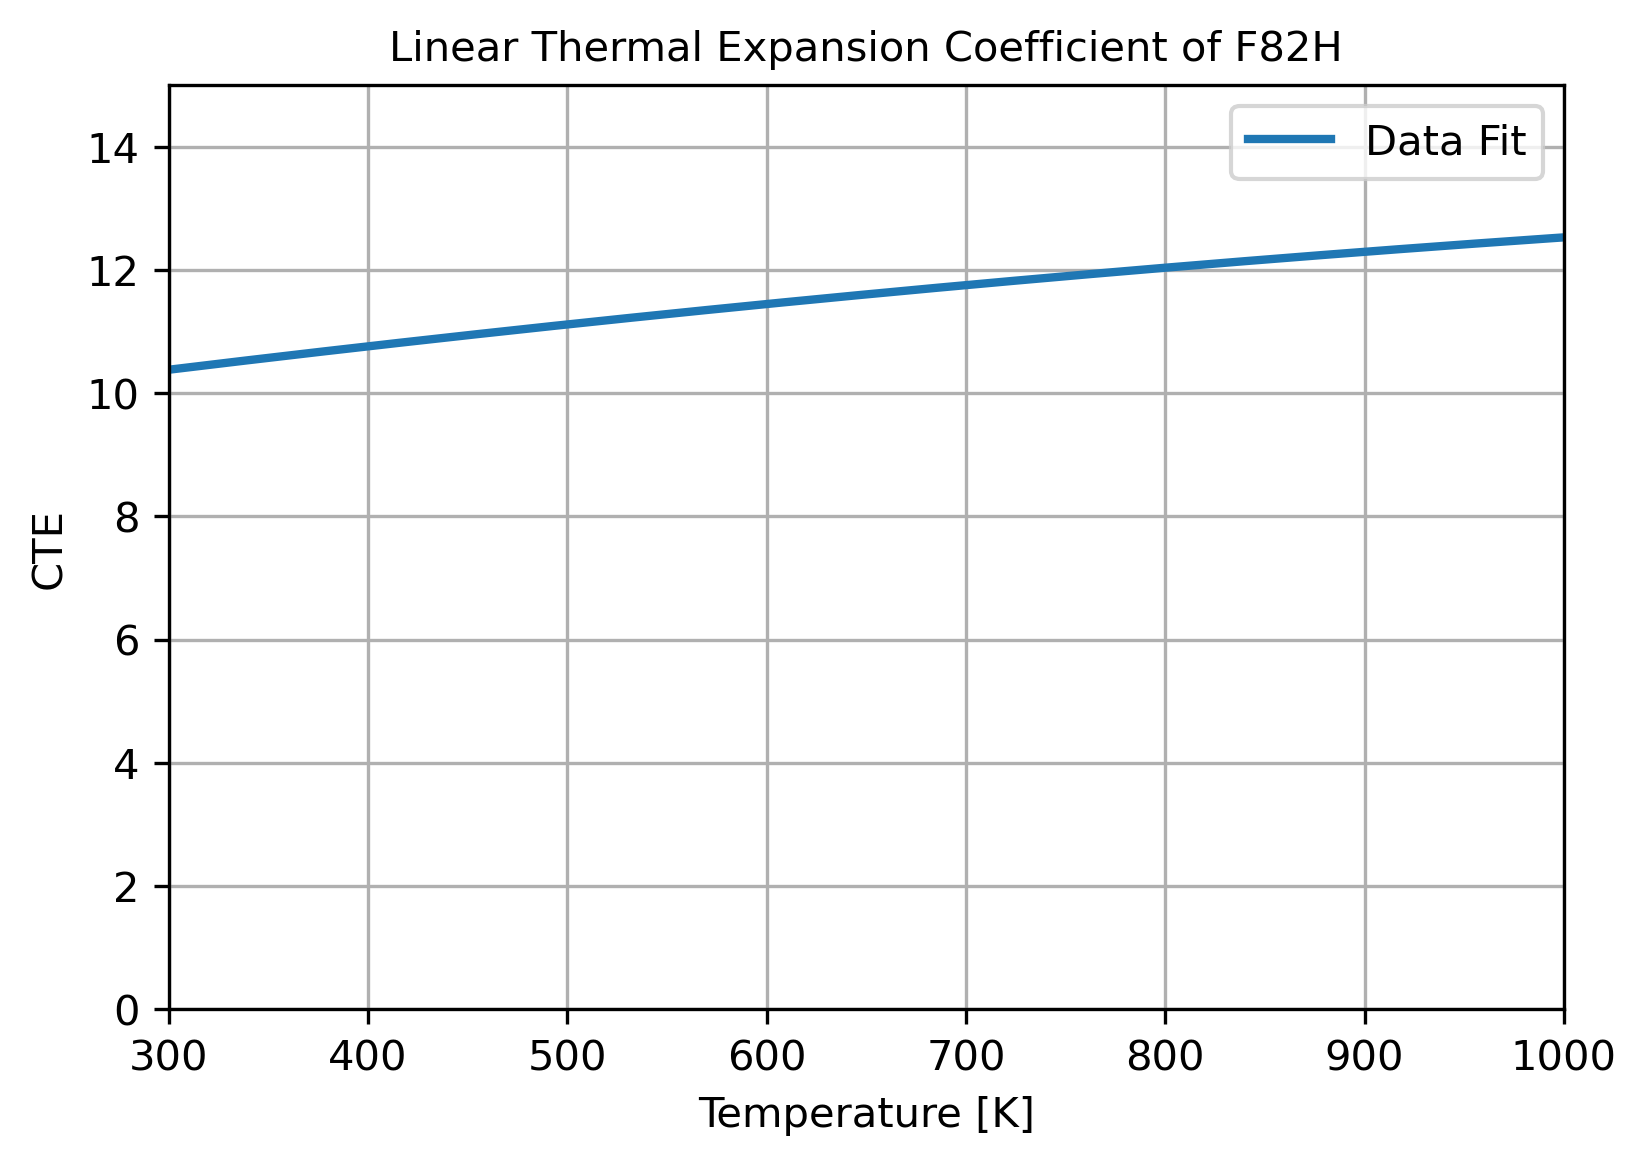

In [2]:
# Temperature range and function initializations
CTE_func = lambda T: 9.0955 + 4.6477e-3 * T - 1.2141e-6 * T**2
X_fit = np.linspace(300, 1000, 1000)
Y_fit = CTE_func(X_fit)

# Plot formatting
title = 'Linear Thermal Expansion Coefficient of F82H'
x_label = 'Temperature [K]'
y_label = 'CTE'
x_lim = [np.min(X_fit), np.max(X_fit)]
y_lim = [0, 15]
fit_line_width = 2

custom_multi_plot(None, None, x_fit_list=[X_fit], y_fit_list=[Y_fit],\
                  x_label=x_label, y_label=y_label, title=title,\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=None, fit_labels=['Data Fit'],\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc='best', legend_num_cols=1)

Figure 11: F82H CTE as a function of temperature. <br>
(Fig. 11 reference: )

### 3.2 Specific Heat
The specific heat of F82H is given by (CITE):
\begin{equation}
c_p = 1390.2 -7.8498T + 0.022969T^2 - 2.7446\times 10^{-5} T^3 + 1.1932\times 10^{-8}T^4
\end{equation}
and the temperature dependence is displayed in Fig. 12.

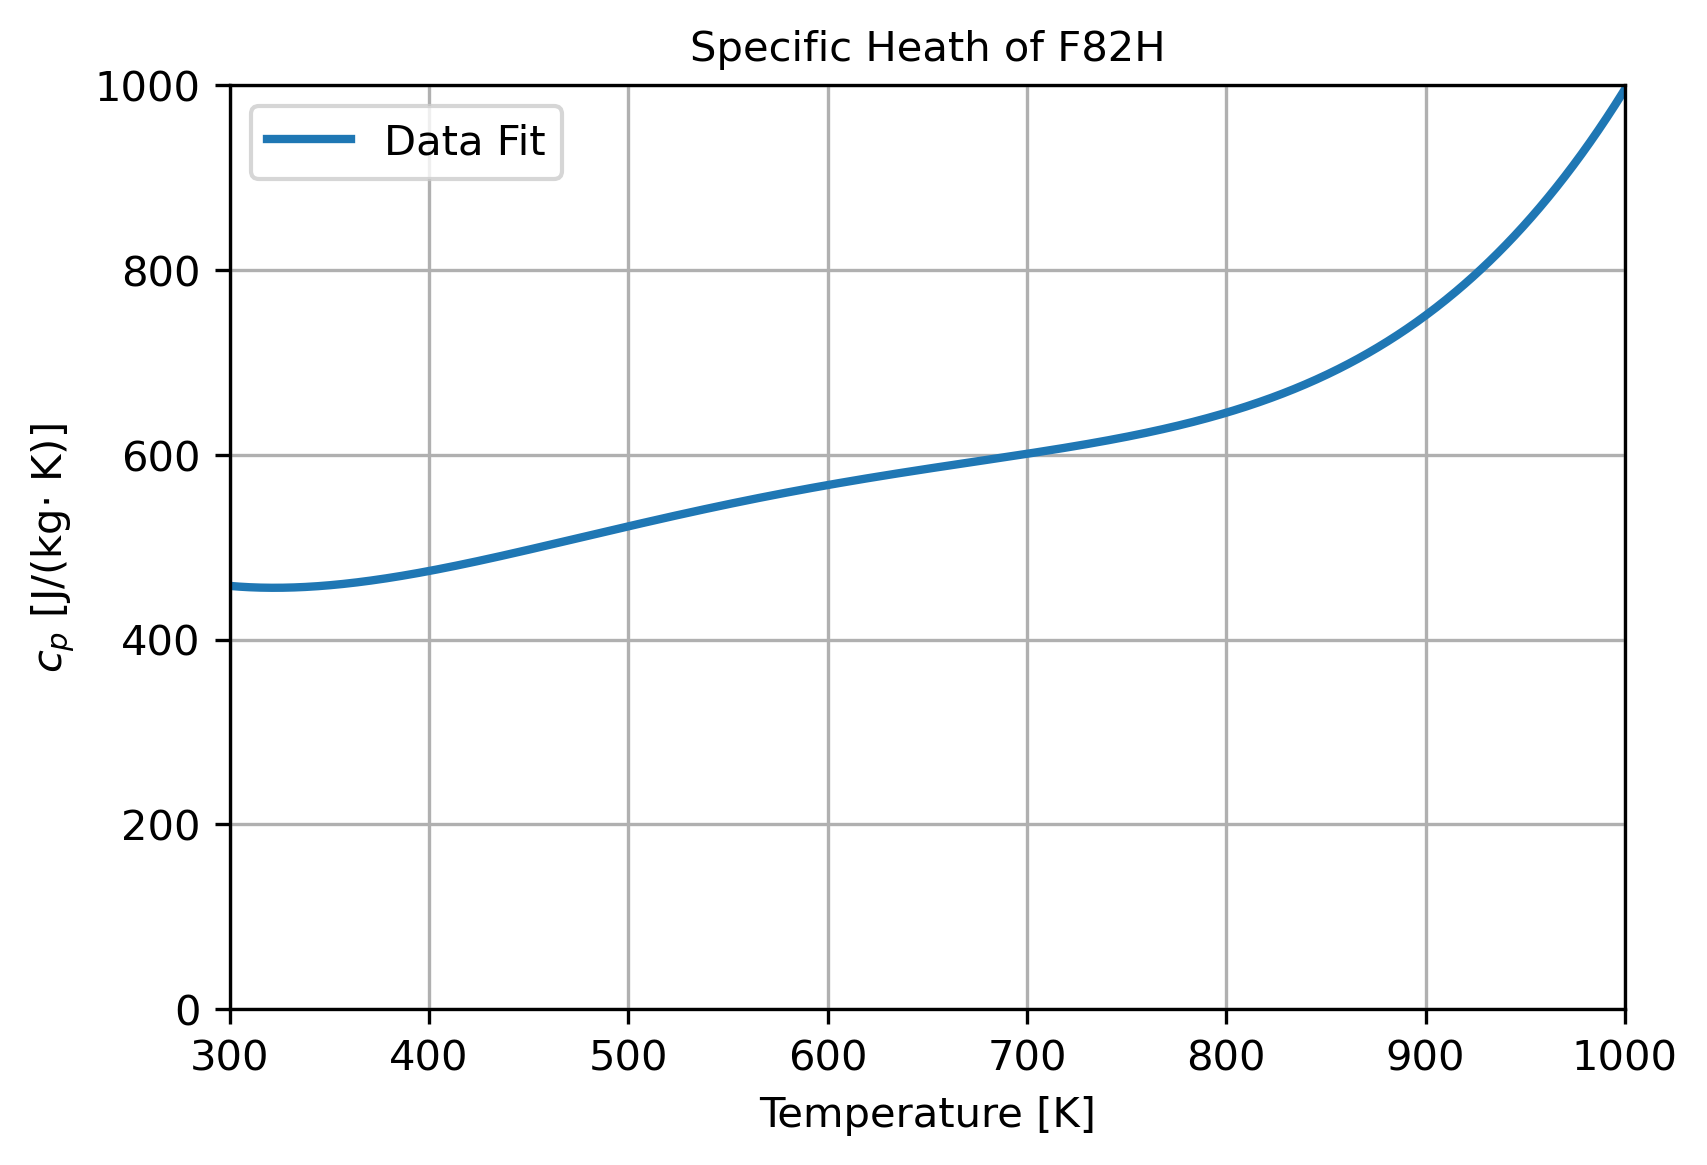

In [3]:
# Temperature range and function initializations
c_p_func = lambda T: 1390.2 - 7.8498*T + 0.022969*T**2 - 2.7446e-5*T**3 + 1.1932e-8*T**4
X_fit = np.linspace(300, 1000, 1000)
Y_fit = c_p_func(X_fit)

# Plot formatting
title = 'Specific Heath of F82H'
x_label = 'Temperature [K]'
y_label = r'$c_p$ [J/(kg$\cdot$ K)]'
x_lim = [np.min(X_fit), np.max(X_fit)]
y_lim = [0, 1000]
fit_line_width = 2

custom_multi_plot(None, None, x_fit_list=[X_fit], y_fit_list=[Y_fit],\
                  x_label=x_label, y_label=y_label, title=title,\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=None, fit_labels=['Data Fit'],\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc='best', legend_num_cols=1)

Figure 12: F82H specific heat at constant pressure as a function of temperature. <br>
(Fig. 12 reference: )

### 3.3 Thermal Conductivity
The thermal conductivity of F82H is given by (CITE):
\begin{equation}
k = 28.38 4- 0.011777 T - 1.0632\times 10^{-6} T^2 - 8.2935\times 10^{-9}T^3
\end{equation}
and the temperature dependence is displayed in Fig. 13.

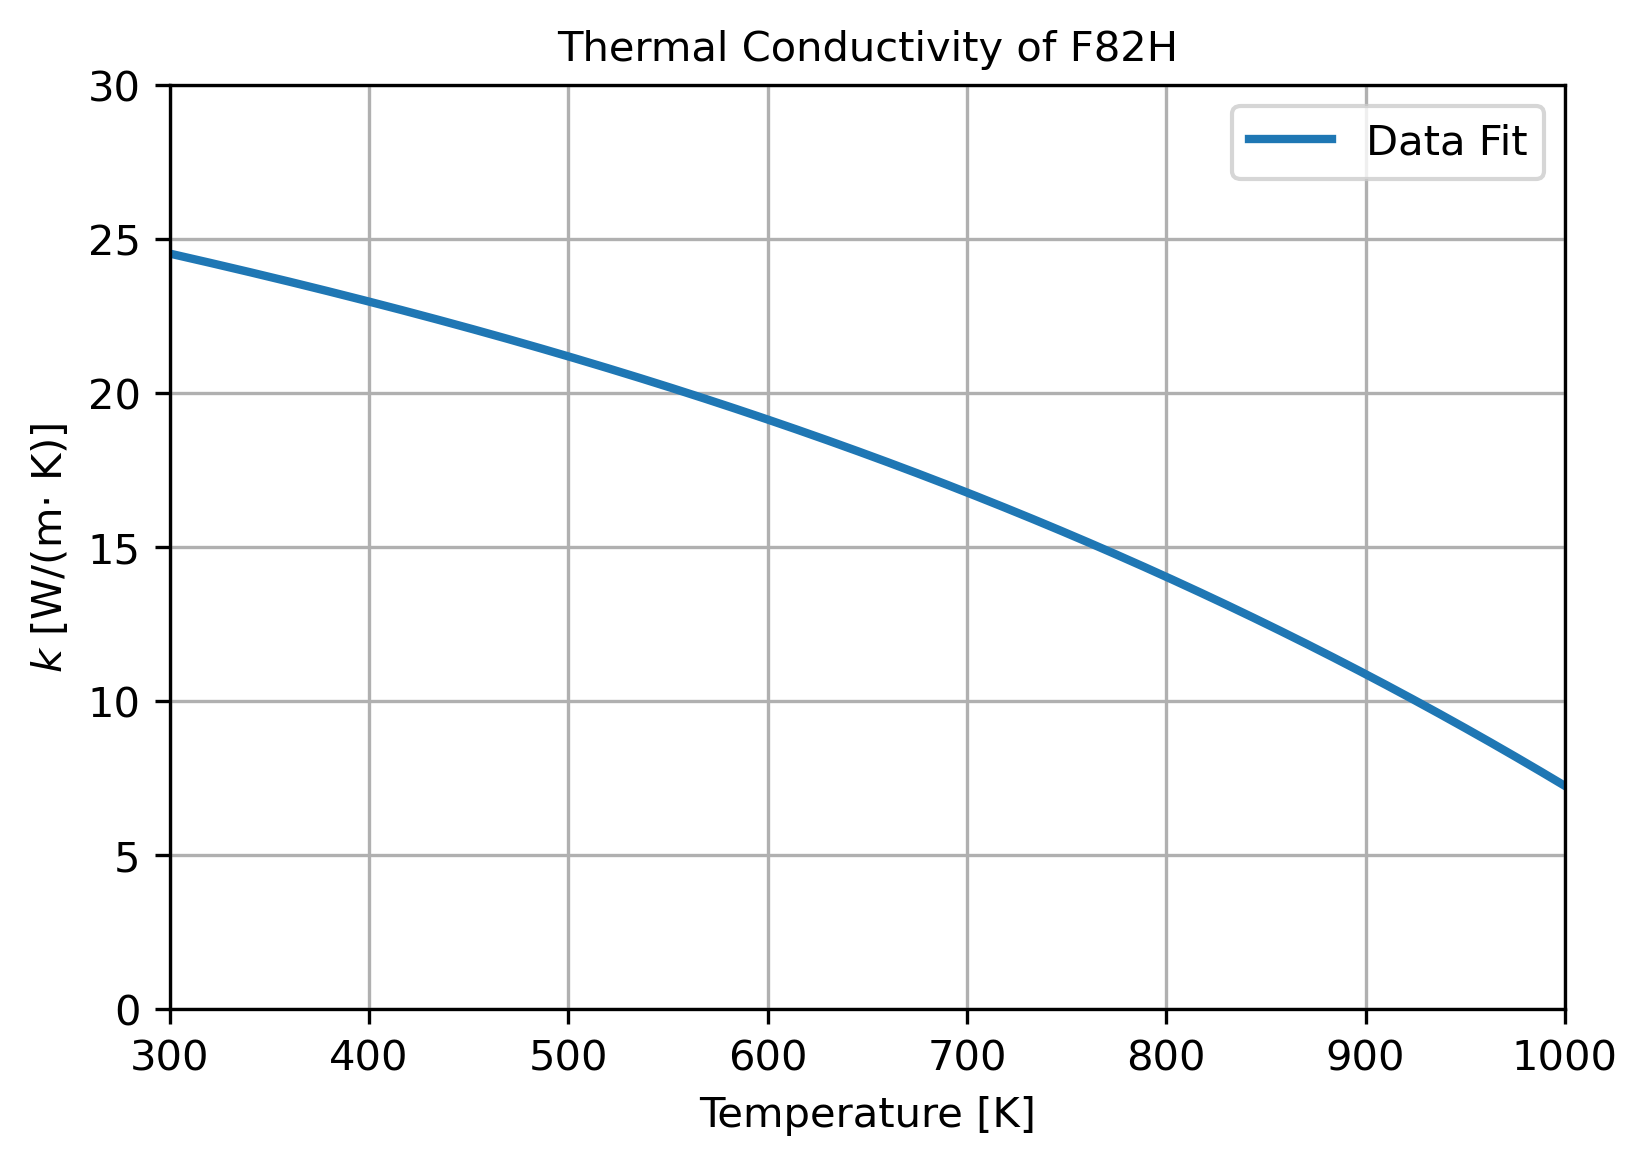

In [4]:
# Temperature range and function initializations
k_func = lambda T: 28.384 - 0.011777 * T - 1.0632e-6 * T**2 - 8.2935e-9 * T**3
X_fit = np.linspace(300, 1000, 1000)
Y_fit = k_func(X_fit)

# Plot formatting
title = 'Thermal Conductivity of F82H'
x_label = 'Temperature [K]'
y_label = r'$k$ [W/(m$\cdot$ K)]'
x_lim = [np.min(X_fit), np.max(X_fit)]
y_lim = [0, 30]
fit_line_width = 2

custom_multi_plot(None, None, x_fit_list=[X_fit], y_fit_list=[Y_fit],\
                  x_label=x_label, y_label=y_label, title=title,\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=None, fit_labels=['Data Fit'],\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc='best', legend_num_cols=1)

Figure 13: F82H thermal conductivity as a function of temperature. <br>
(Fig. 13 reference: )

### 3.4 Thermal Diffusivity
The thermal diffusivity of F82H is given by (CITE):
\begin{equation}
\alpha = 0.089188 + 1.4051\times 10^{-5} T - 5.7859\times 10^{-8} T^2;\quad T[\text{K}],\;\alpha [\text{mm}^2/\text{s}]
\end{equation}
and the temperature dependence is displayed in Fig. 14.

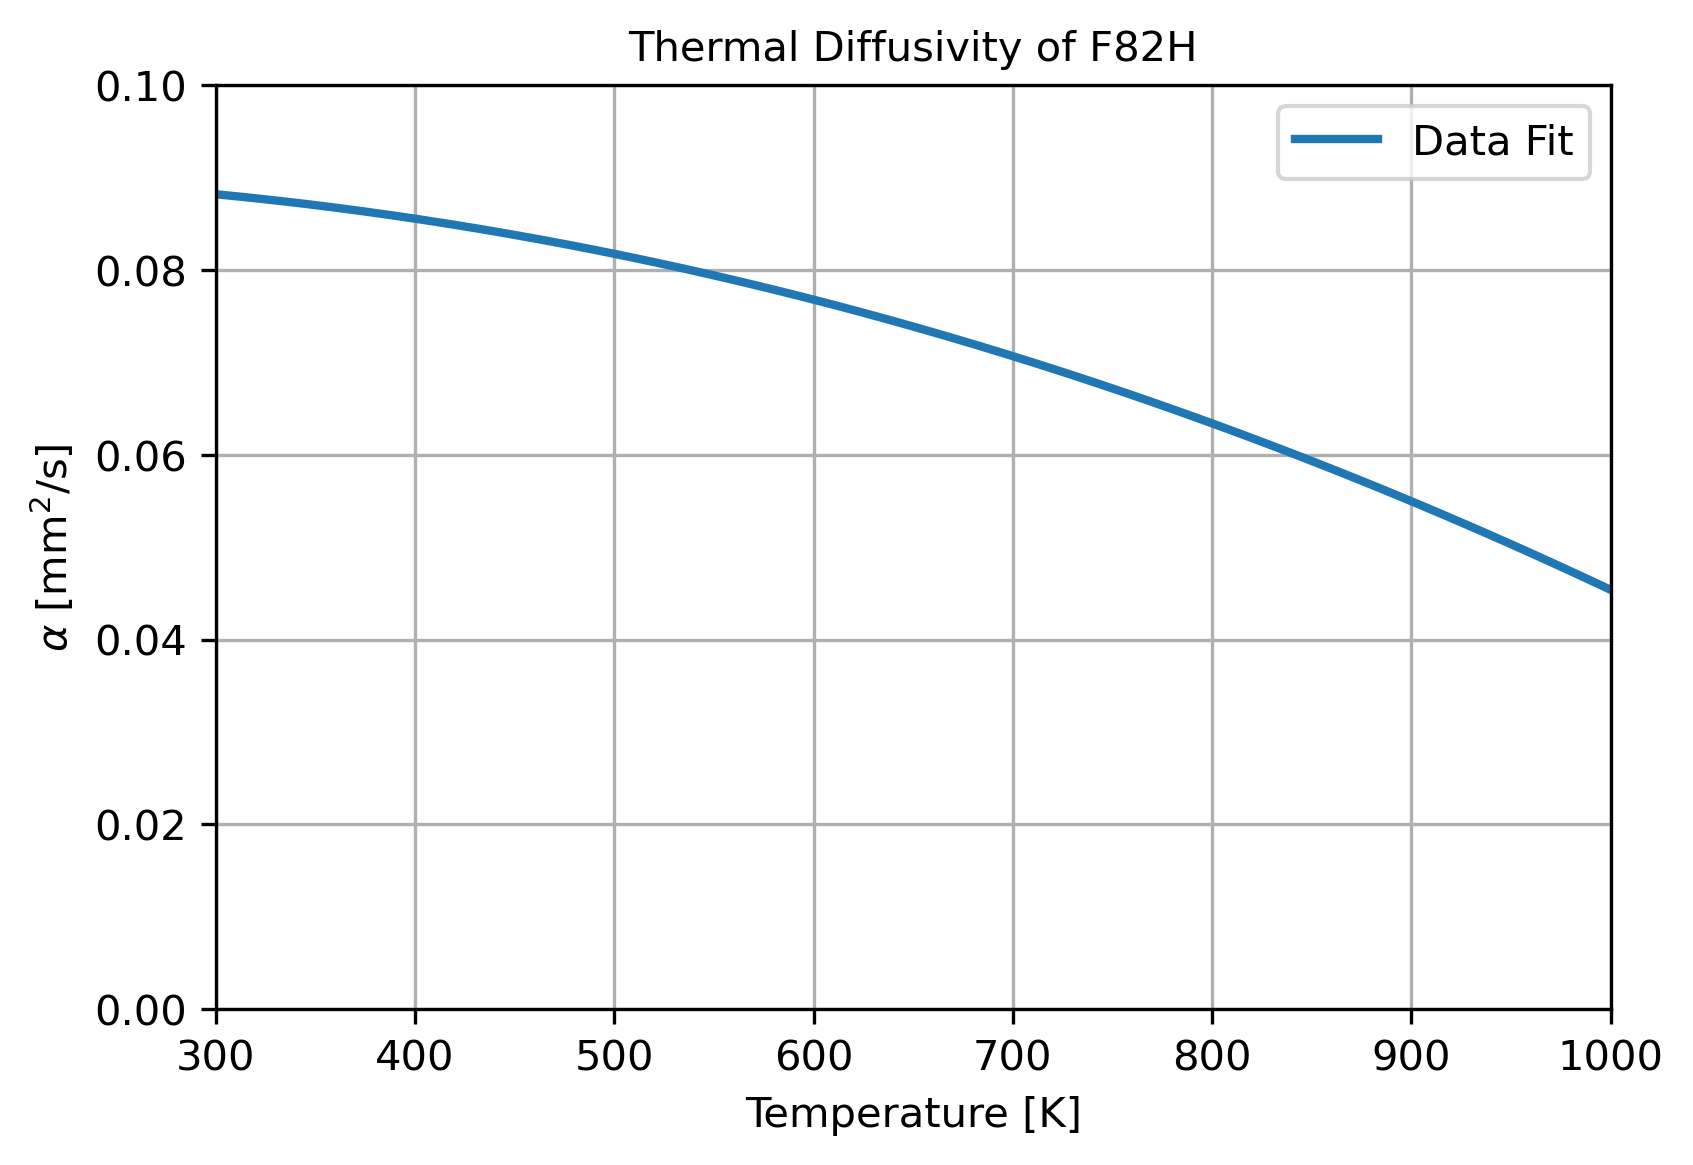

In [5]:
# Temperature range and function initializations
alpha_func = lambda T: 0.089188 + 1.4051e-5 * T - 5.7859e-8 * T**2
X_fit = np.linspace(300, 1000, 1000)
Y_fit = alpha_func(X_fit)

# Plot formatting
title = 'Thermal Diffusivity of F82H'
x_label = 'Temperature [K]'
y_label = r'$\alpha$ [mm$^2$/s]'
x_lim = [np.min(X_fit), np.max(X_fit)]
y_lim = [0, 0.1]
fit_line_width = 2

custom_multi_plot(None, None, x_fit_list=[X_fit], y_fit_list=[Y_fit],\
                  x_label=x_label, y_label=y_label, title=title,\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=None, fit_labels=['Data Fit'],\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc='best', legend_num_cols=1)

Figure 14: F82H thermal diffusivity as a function of temperature. <br>
(Fig. 14 reference: )

### 3.5 Electrical Resistivity
The electrical resistivity of F82H is given by (CITE):
\begin{equation}
\rho_\text{e} = 3.289\times 10^{-7} + 5.867\times 10^{-10} T - 1.733\times 10^{-13}T^2;\quad T[\text{K}],\;\alpha [\Omega \cdot \text{m}]
\end{equation}
and the temperature dependence is displayed in Fig. 15.

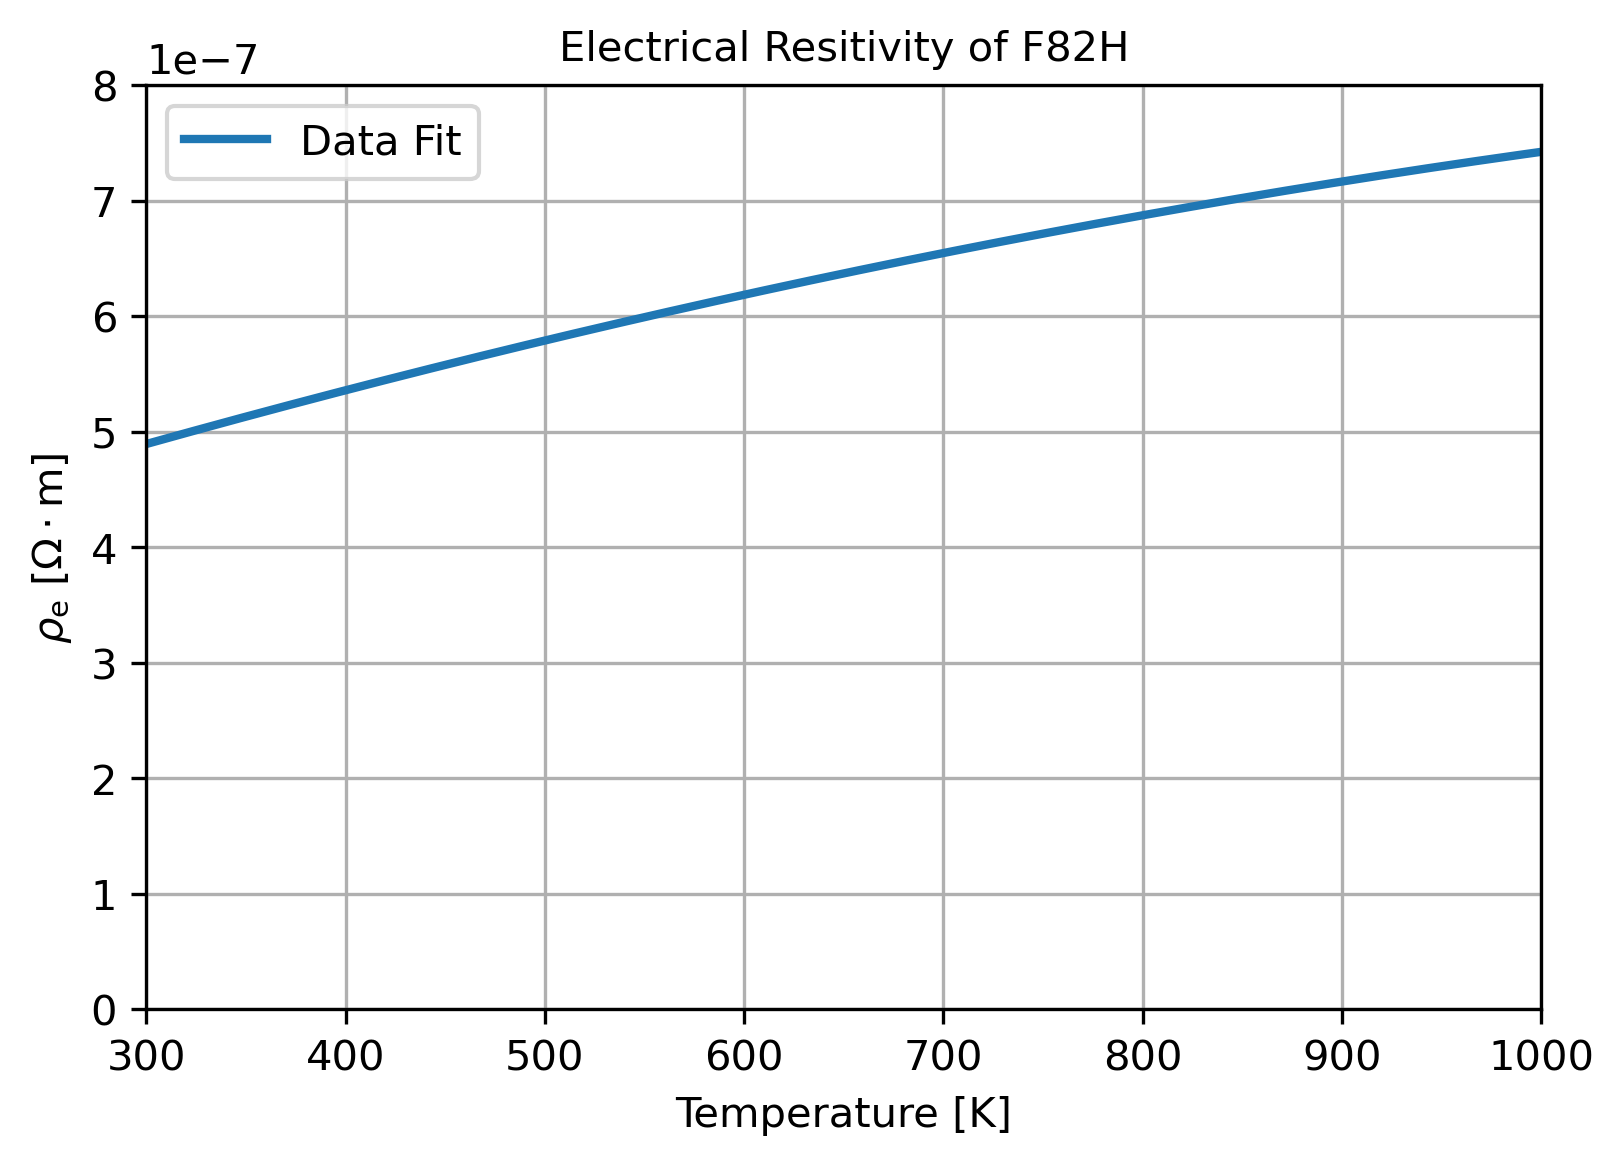

In [6]:
# Temperature range and function initializations
rho_e_func = lambda T: 3.289e-7 + 5.867e-10 * T - 1.733e-13 * T**2
X_fit = np.linspace(300, 1000, 1000)
Y_fit = rho_e_func(X_fit)

# Plot formatting
title = 'Electrical Resitivity of F82H'
x_label = 'Temperature [K]'
y_label = r'$\rho_\text{e}$ [$\Omega \cdot \text{m}$]'
x_lim = [np.min(X_fit), np.max(X_fit)]
y_lim = [0, 8e-7]
fit_line_width = 2

custom_multi_plot(None, None, x_fit_list=[X_fit], y_fit_list=[Y_fit],\
                  x_label=x_label, y_label=y_label, title=title,\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=None, fit_labels=['Data Fit'],\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc='best', legend_num_cols=1)

Figure 15: F82H electrical resistivity as a function of temperature. <br>
(Fig. 15 reference: )

### 3.6 Thermal Emissivity
Davisson and Weeks (CITE) used the Hagen-Rubens relation together with the Fresnel equations to calculate the total hemispherical emissivity of a metal. Their expression, as modified by Parker and Abbott, is as follows (CITE):
\begin{equation}
\sigma = 0.766\sqrt{(T\rho_e(T))}-(0.309-0.0889\ln(T\rho_e(T)))(T\rho_e(T))-0.0175(T\rho_e(T) )^{3/2};\quad T[\text{K}],\;\rho_\text{e} [\Omega \cdot \text{cm}]
\end{equation}
The electrical resistivity, and hence the emissivity, depend on the surface roughness. The electrical resistivity $\Omega \cdot$cm of polished and rolled F82H are fitted to the following equations:
\begin{eqnarray}
\rho_\text{e} &=& 4.2757\times 10^{-5}+7.6271\times 10^{-8}T-2.2529\times 10^{-11} T^2\qquad \mbox{polished}\\
\rho_\text{e} &=& 7\times 10^{-5}+3.15\times 10^{-7}T-2.8\times 10^{-12}T^2\qquad \qquad\mbox{rolled}
\end{eqnarray}
The temperature dependence is displayed in Fig. 16.

,T_polished_sigmaK,polished_sigma,T_rolled_sigmaK,rolled_sigma
0,429.171271,0.118732,471.712707,0.181412
1,524.309392,0.129971,573.038674,0.215130
2,626.408840,0.142939,673.591160,0.244524
3,726.961326,0.155476,772.596685,0.273919
4,822.872928,0.174496,874.696133,0.302450


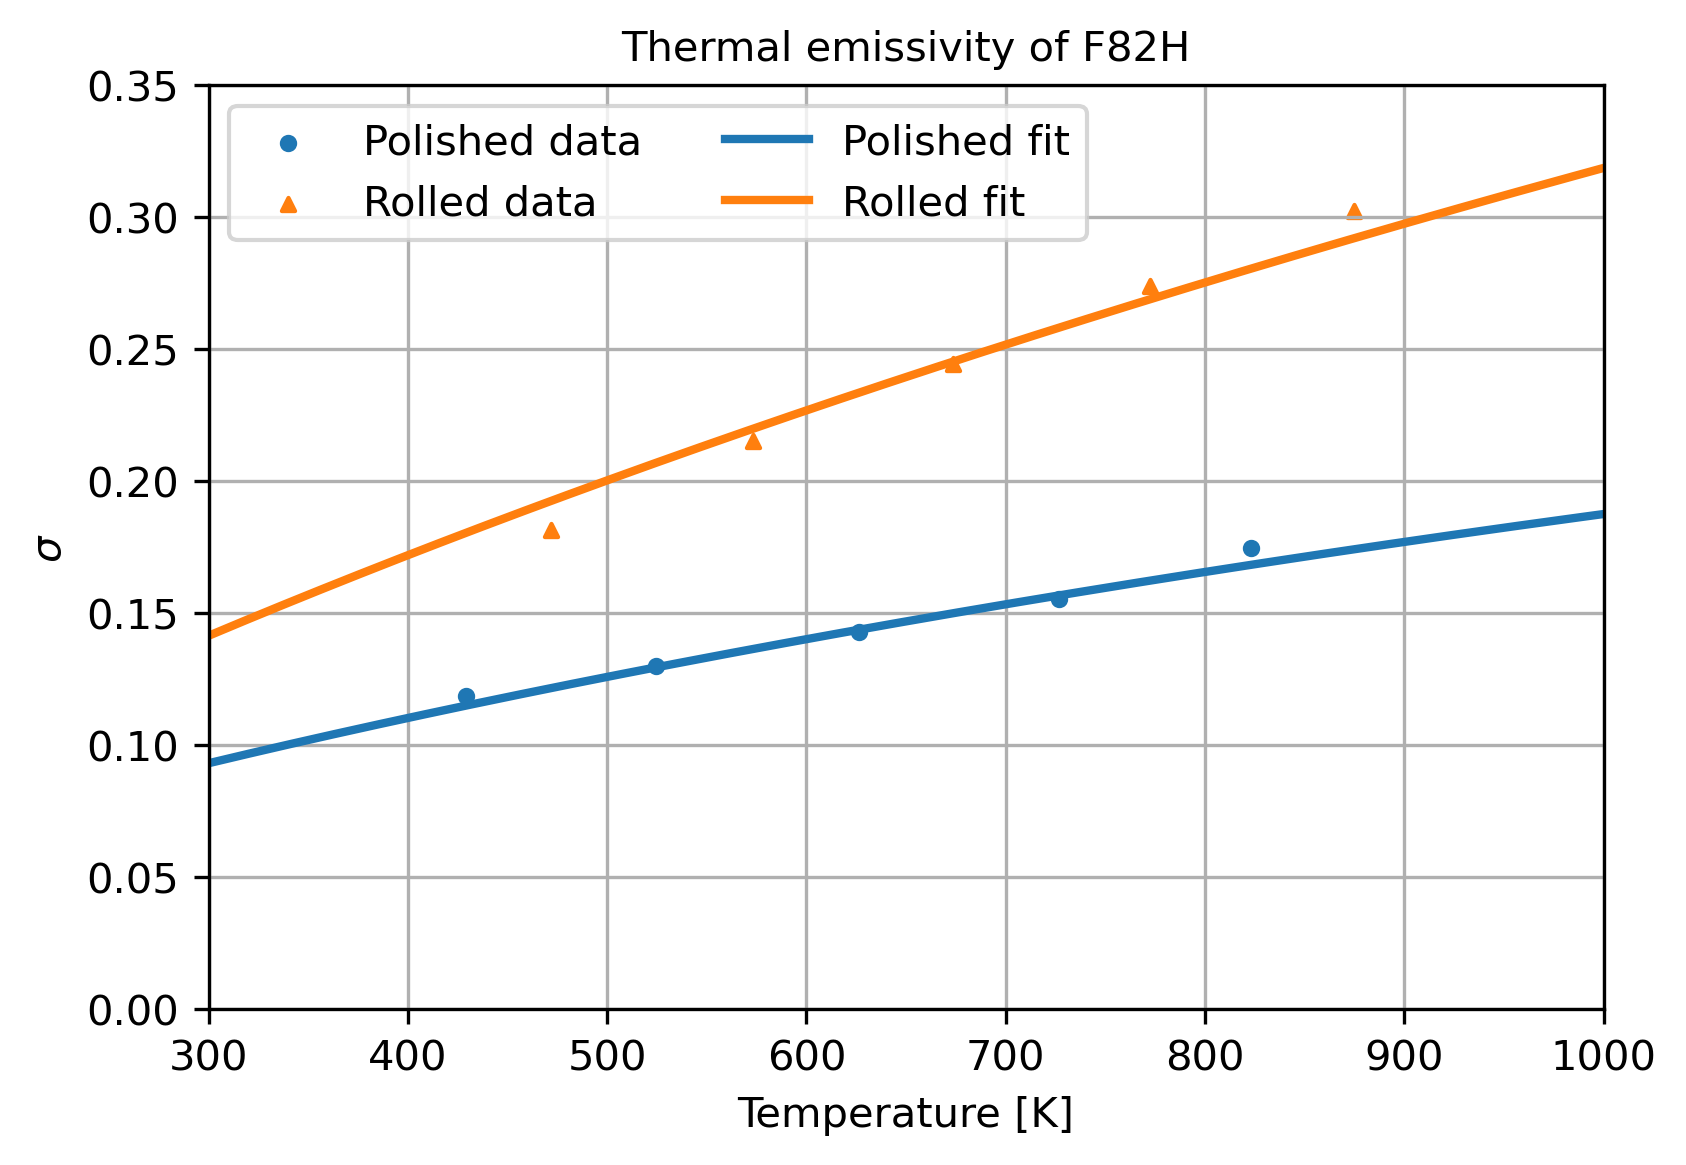

In [7]:
# Load excel data for desired property name
material_property = "Thermal Emissivity"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=6, room_temp=293, display_data_table_bool = True)

x_data_list = variables[::2]
y_data_list = variables[1::2]

# Temperature range and function initializations
rho_e_polished_func = lambda T: 4.2757e-5 + 7.6271e-8 * T - 2.2529e-11 * T**2
rho_e_rolled_func = lambda T: 7e-5 + 3.15e-7 * T - 2.8e-12 * T**2
sigma_polished_func = lambda T: 0.766 * (T * rho_e_polished_func(T))**(1/2) - (0.309 - 0.0889 * np.log(T*rho_e_polished_func(T))) * (T * rho_e_polished_func(T)) - 0.0175 * (T * rho_e_polished_func(T))**(3/2)
sigma_rolled_func = lambda T: 0.766 * (T * rho_e_rolled_func(T))**(1/2) - (0.309 - 0.0889 * np.log(T*rho_e_rolled_func(T))) * (T * rho_e_rolled_func(T)) - 0.0175 * (T * rho_e_rolled_func(T))**(3/2)

X_fit = np.linspace(300, 1000, 1000)
Y_fit_polished = sigma_polished_func(X_fit)
Y_fit_rolled = sigma_rolled_func(X_fit)

# Plot formatting
title = 'Thermal emissivity of F82H'
x_label = 'Temperature [K]'
y_label = r'$\sigma$'
data_labels = ['Polished data', 'Rolled data']
fit_labels = ['Polished fit', 'Rolled fit']
x_lim = [np.min(X_fit), np.max(X_fit)]
y_lim = [0, 0.35]
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=[X_fit, X_fit], y_fit_list=[Y_fit_polished, Y_fit_rolled],\
                  x_label=x_label, y_label=y_label, title=title,\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc='best', legend_num_cols=2)

Figure 16: F82H total hemispherical emissivity as a function of temperature. <br>
(Fig. 16 reference: )

## 4 Mechanical Properties

### 4.1 Elastic Properties
Young's ($E$), the shear ($G$) modulus, and Poisson's ratio of F82H are given by (CITE):
\begin{eqnarray}
    E &=& 218.76 - 0.077834\times(T-273) + 1.4735\times 10^{-4}\times(T-273)^2 - 2.1998\times 10^{-7}\times(T-273)^3\\
    G &=& 84.902 - 0.03378\times(T-273) + 6.8965\times 10^{-5}\times(T-273)^2 - 9.828\times 10^{-8}\times(T-273)^3 \\
    \nu &=&0.28247 + 6.1902\times 10^{-6}(T-298) + 3.162\times 10^{-9}T^2
\end{eqnarray}
The temperature dependence of the elastic and shear module are displayed in Fig. 17. The temperature dependence of Poisson's ratio is displayed in Fig. 18.

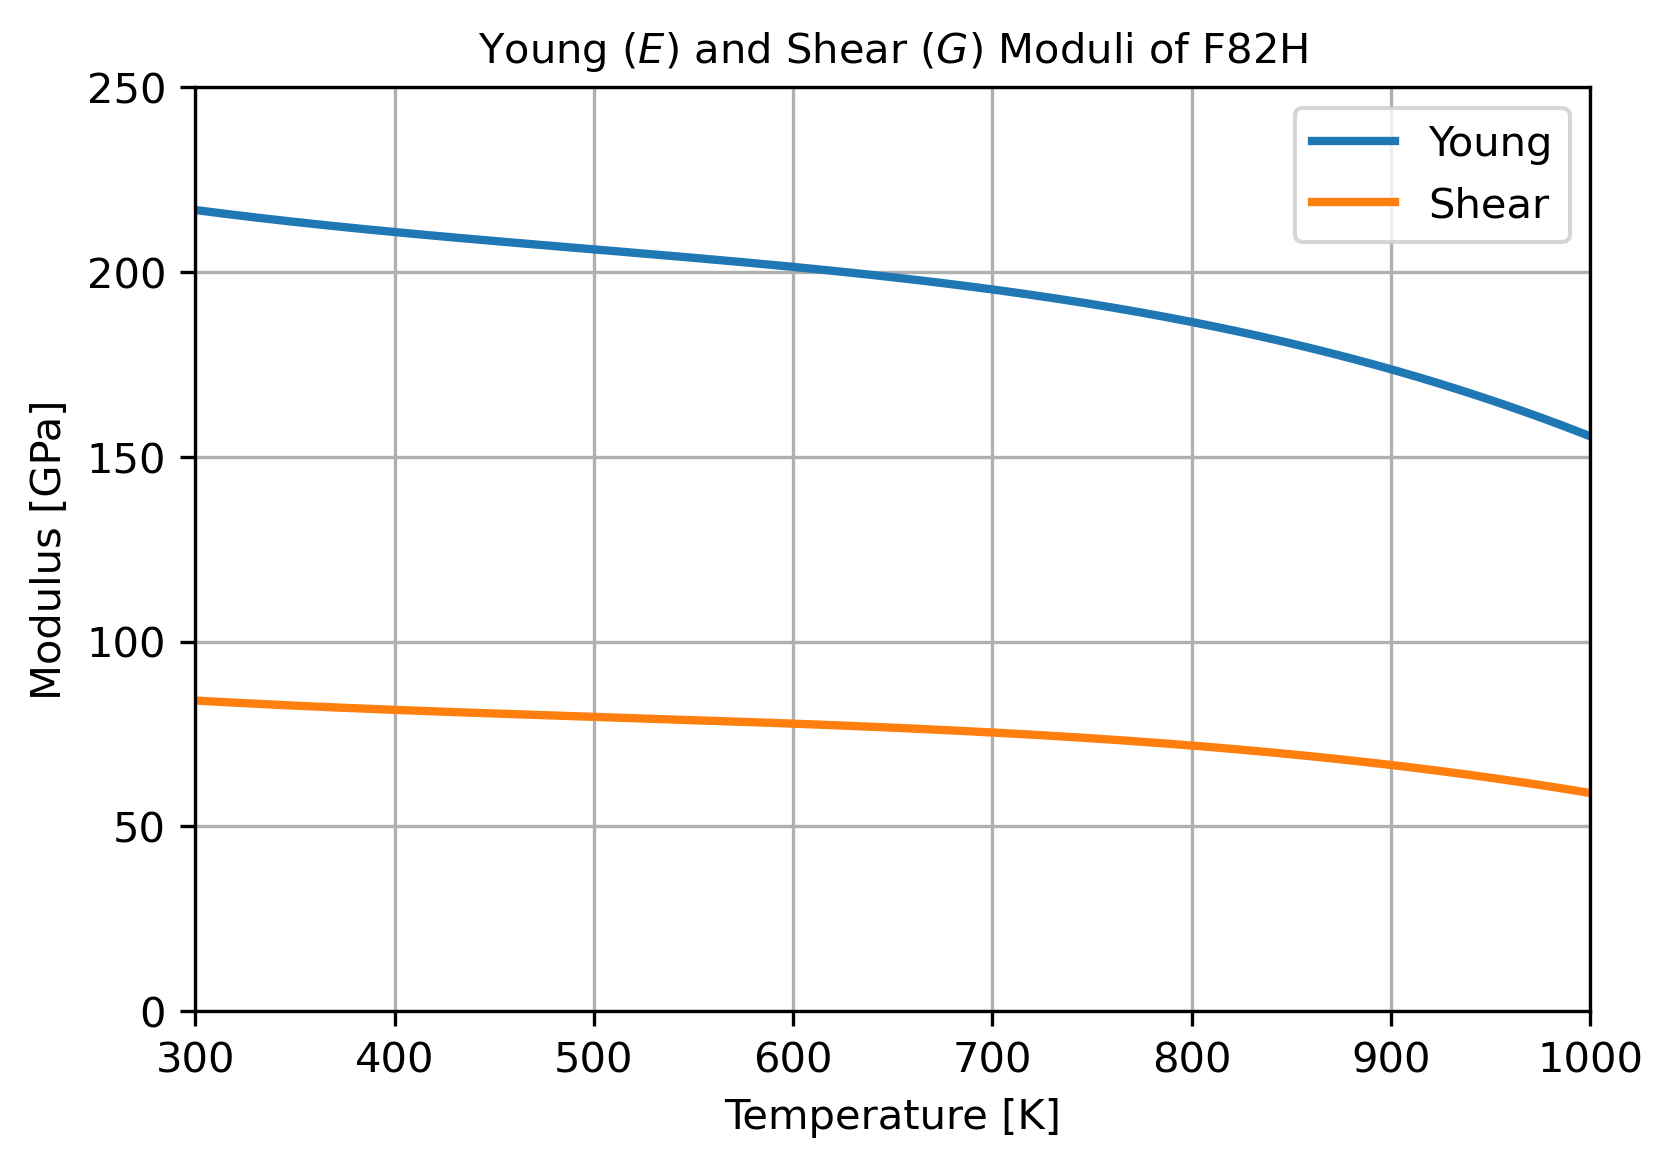

In [8]:
# Temperature range and function initializations
E_func = lambda T: 218.76 - 0.077834 * (T-273) + 1.4735e-4 * (T-273)**2 - 2.1998e-7 * (T-273)**3
G_func = lambda T: 84.902 - 0.03378 * (T-273) + 6.8965e-5 * (T-273)**2 - 9.828e-8 * (T-273)**3

X_fit = np.linspace(300, 1000, 1000)
Y_fit_E = E_func(X_fit)
Y_fit_G = G_func(X_fit)

# Plot formatting
title = 'Young ($E$) and Shear ($G$) Moduli of F82H'
x_label = 'Temperature [K]'
y_label = r'Modulus [GPa]'

x_lim = [np.min(X_fit), np.max(X_fit)]
y_lim = [0, 250]
fit_line_width = 2

custom_multi_plot(None, None, x_fit_list=[X_fit, X_fit], y_fit_list=[Y_fit_E, Y_fit_G],\
                  x_label=x_label, y_label=y_label, title=title,\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=None, fit_labels=['Young', 'Shear'],\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc='best', legend_num_cols=1)

Figure 17: F82H elastic and shear moduli as a function of temperature. <br>
(Fig. 17 reference: )

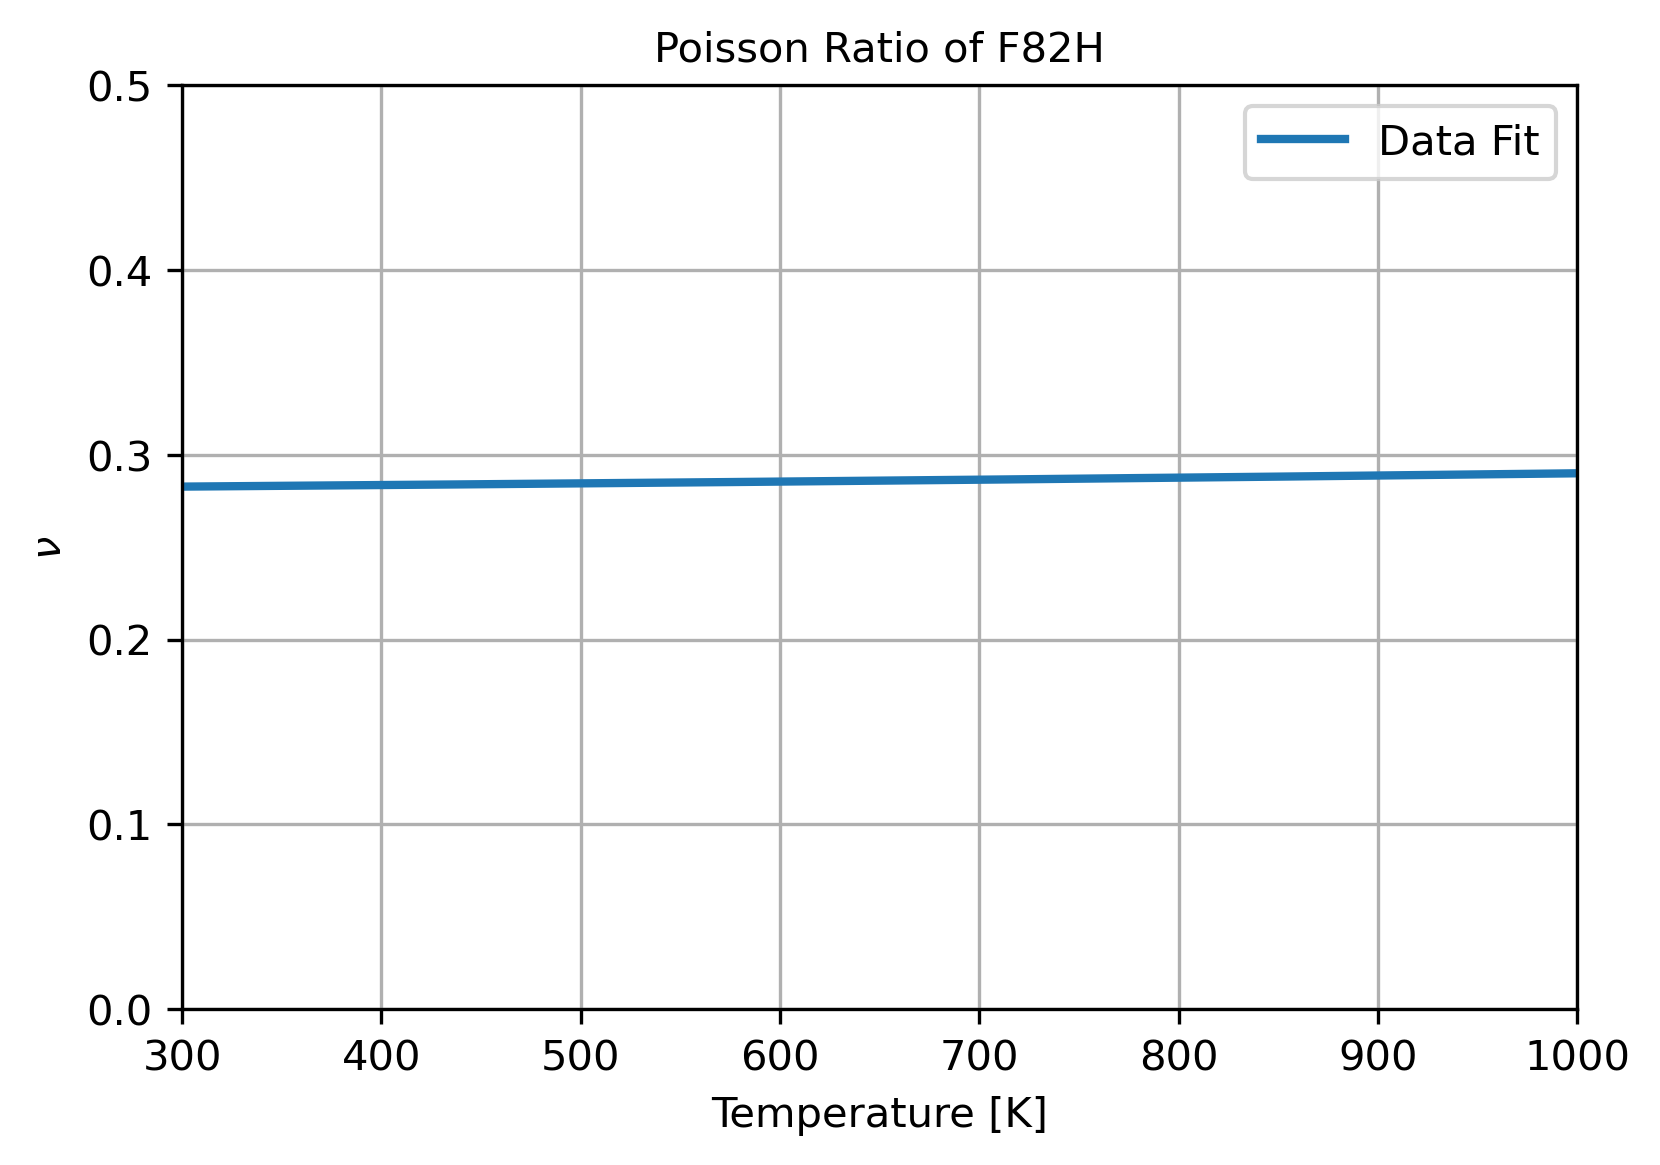

In [9]:
# Temperature range and function initializations
nu_func = lambda T: 0.28247 + 6.1902e-6 * (T-298) + 3.162e-9 * T**2

X_fit = np.linspace(300, 1000, 1000)
Y_fit = nu_func(X_fit)

# Plot formatting
title = 'Poisson Ratio of F82H'
x_label = 'Temperature [K]'
y_label = r'$\nu$'
x_lim = [np.min(X_fit), np.max(X_fit)]
y_lim = [0, 0.5]
fit_line_width = 2

custom_multi_plot(None, None, x_fit_list=[X_fit], y_fit_list=[Y_fit],\
                  x_label=x_label, y_label=y_label, title=title,\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=None, fit_labels=['Data Fit'],\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc='best', legend_num_cols=1)

Figure 18: F82H Poisson's ratio as a function of temperature. <br>
(Fig. 18 reference: )

The general characteristic of the uniaxial stress-strain diagram are shown in Fig. 19.

<figure>
<img src="Figures/stress-strain.png" style="width:90%">
<figcaption align = "center"> Figure 19: General characteristics of the stress-strain curve for a ductile material.. </figcaption>
</figure>

(Fig. 19 reference: )

### 4.2 Yield Strength

,T_CEA_yC,CEA_yMPa,T_ECN_yC,ECN_yMPa,T_CIEMAT_yC,CIEMAT_yMPa,T_FZK_yC,FZK_yMPa,T_JAERI_yC,JAERI_yMPa,T_TavassoliC,Tavassoli_yMPa
0,16.989027,521.843961,19.899852,495.672374,20.420682,502.574531,300.979055,463.714501,17.136249,552.384017,20,491
1,250.696868,472.679341,82.964550,508.102903,301.958753,438.396986,351.616576,458.507787,499.958474,430.916987,100,452
2,250.118711,459.105338,202.778599,474.512850,400.479066,423.881286,401.345427,448.949691,653.496893,226.921269,200,432
3,300.941051,464.762144,302.875923,458.187540,501.037782,373.225861,601.060114,305.298825,NaN,NaN,250,427
4,351.739048,445.990310,400.567813,443.008313,499.983179,355.769941,652.530493,228.365371,NaN,NaN,300,423
5,499.060812,399.152010,449.644329,425.296982,NaN,NaN,700.849226,165.003081,NaN,NaN,350,417
6,553.224289,358.002468,501.608174,407.020175,NaN,NaN,NaN,NaN,NaN,NaN,400,408
7,653.608520,237.667774,554.030279,365.607703,NaN,NaN,NaN,NaN,NaN,NaN,450,392
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,367
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,332


**Fitting parameters for F82H Yield Strength** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 43
    # variables        = 4
    chi-square         = 15704.9287
    reduced chi-square = 402.690479
    Akaike info crit   = 261.722779
    Bayesian info crit = 268.767580
    R-squared          = 0.96090419
[[Variables]]
    c0:  960.920802 +/- 86.9509574 (9.05%) (init = 1)
    c1: -2.71634278 +/- 0.48372624 (17.81%) (init = 1)
    c2:  0.00496028 +/- 8.2457e-04 (16.62%) (init = 1)
    c3: -3.1117e-06 +/- 4.3907e-07 (14.11%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9961
    C(c1, c2) = -0.9945
    C(c0, c1) = -0.9903
    C(c1, c3) = +0.9817
    C(c0, c2) = +0.9716
    C(c0, c3) = -0.9497


**The equation for F82H Yield Strength is:**


<IPython.core.display.Latex object>

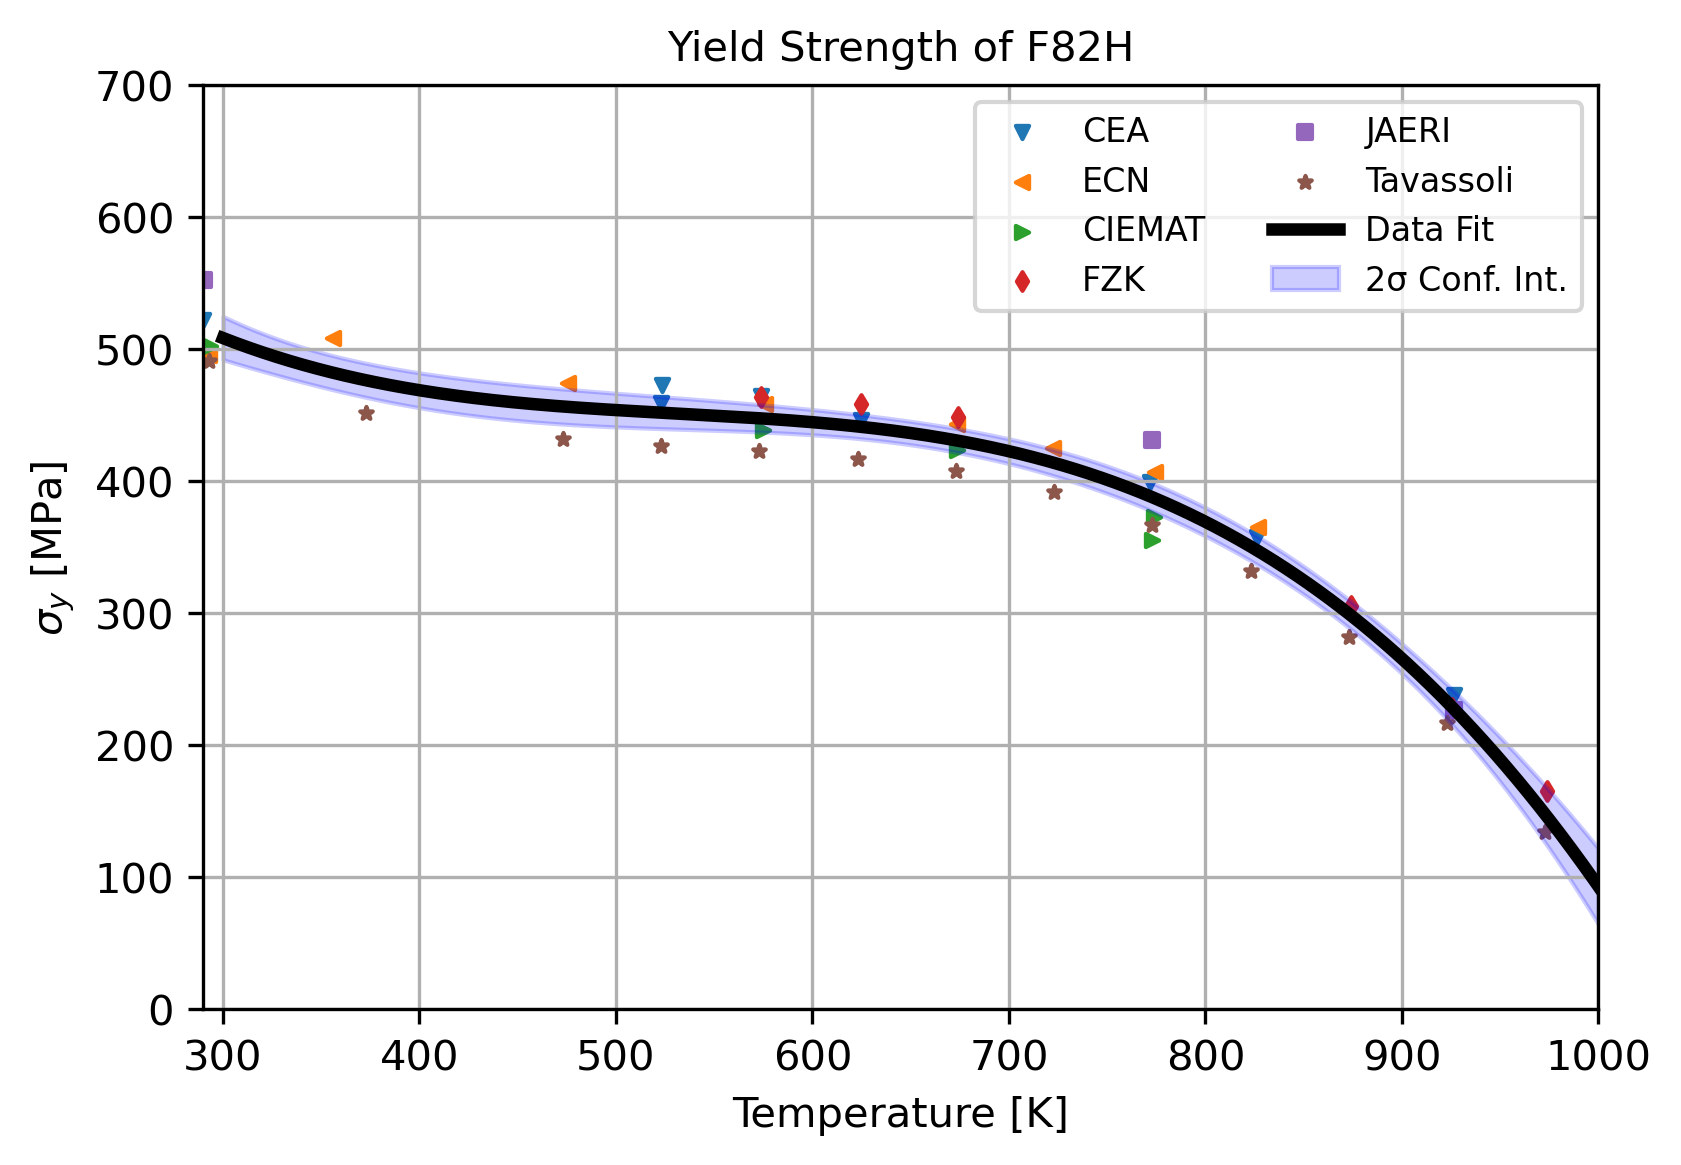

In [10]:
# Load excel data for desired property name
material_property = "Yield Strength"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

x_label = 'Temperature [K]'
y_label = r'$\sigma_y$ [MPa]'
x_lim = [290, 1000]
y_lim = [0, 700]
data_labels = [var.split('_')[0] for var in var_names[1::2]] # Replace '_' with your delimiter. Take [0] for the part in front of the delimiter.
# data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK', 'JAERI', 'Tavasolli']

# Temperature range and initializations
T = np.linspace(300, 1000, 1000)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2]
vars_y = variables[1::2]
X_data, Y_data = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
X_data += 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y

p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(X_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name)

### 4.3 Ultimate Strength

,T_CEA_uC,CEA_uMPa,T_ECN_uC,ECN_uMPa,T_CIEMAT_uC,CIEMAT_uMPa,T_FZK_JAERI_uC,FZK_JAERI_uMPa,T_TavassoliC,Tavassoli_uMPa
0,19.883690,636.194176,19.470673,625.930739,19.406076,613.075124,19.880718,656.808534,20,610
1,249.640933,529.611105,78.130252,608.814784,300.066745,498.784337,299.029337,516.301493,100,563
2,347.345292,499.317541,200.207251,554.298958,398.914934,467.483729,350.526986,490.576763,200,526
3,450.202342,442.119312,300.266598,514.904718,498.825122,390.710939,448.231257,440.433398,250,512
4,498.856082,412.865264,401.332095,492.921867,499.826334,371.288641,497.701877,459.330458,300,499
5,550.819140,353.491450,450.614773,456.902542,NaN,NaN,548.920888,347.005279,350,484
6,648.315147,214.193752,499.873757,431.036836,NaN,NaN,600.499369,286.641322,400,467
7,700.297656,146.484503,549.202130,375.435528,NaN,NaN,700.801548,153.242484,450,444
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,414
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,377


**Fitting parameters for F82H Ultimate Strength** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 42
    # variables        = 4
    chi-square         = 13059.6480
    reduced chi-square = 343.674948
    Akaike info crit   = 249.063739
    Bayesian info crit = 256.014417
    R-squared          = 0.98034823
[[Variables]]
    c0:  1064.80116 +/- 80.5496076 (7.56%) (init = 1)
    c1: -2.46487542 +/- 0.44458965 (18.04%) (init = 1)
    c2:  0.00408174 +/- 7.4835e-04 (18.33%) (init = 1)
    c3: -2.5722e-06 +/- 3.9363e-07 (15.30%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9959
    C(c1, c2) = -0.9946
    C(c0, c1) = -0.9906
    C(c1, c3) = +0.9814
    C(c0, c2) = +0.9726
    C(c0, c3) = -0.9504


**The equation for F82H Ultimate Strength is:**


<IPython.core.display.Latex object>

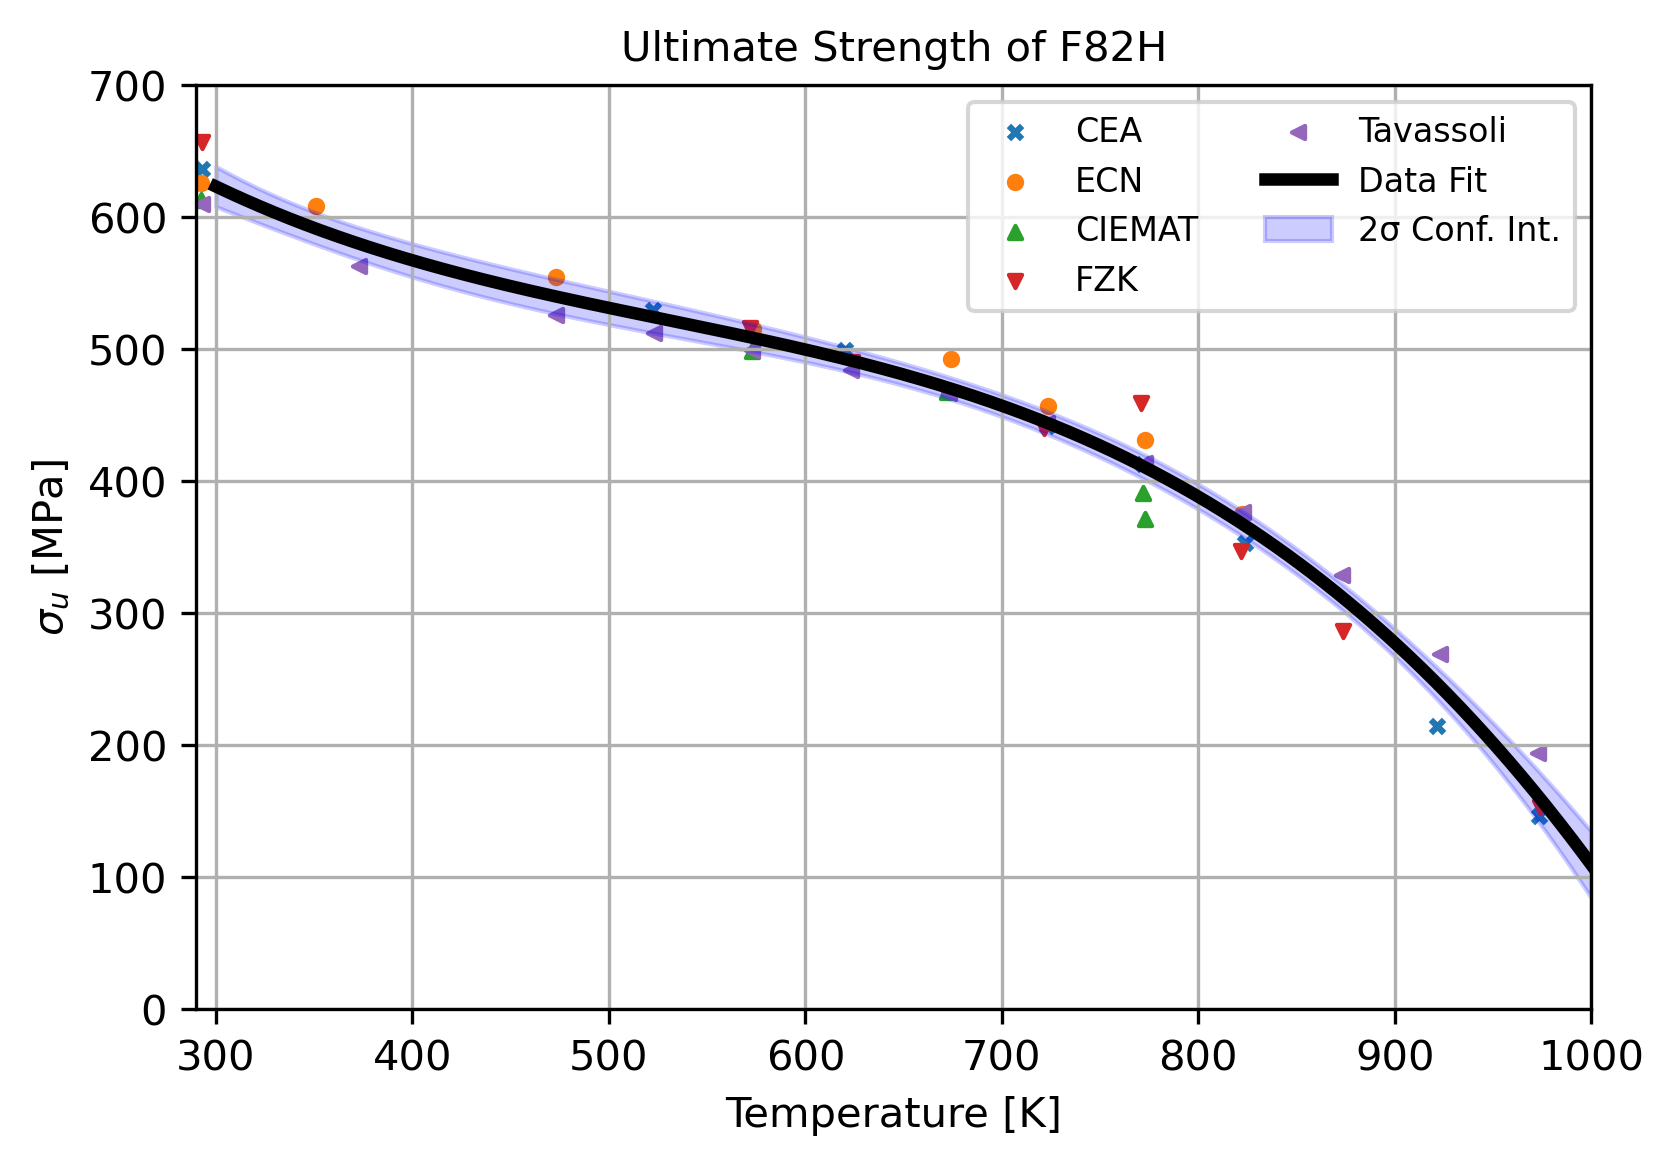

In [11]:
# Load excel data for desired property name
material_property = "Ultimate Strength"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

x_label = 'Temperature [K]'
y_label = r'$\sigma_u$ [MPa]'
x_lim = [290, 1000]
y_lim = [0, 700]
data_labels = [var.split('_')[0] for var in var_names[1::2]] # Replace '_' with your delimiter. Take [0] for the part in front of the delimiter.
# data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK & JAERI', 'Tavasolli']

# Temperature range and initializations
T = np.linspace(300, 1000, 1000)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2]
vars_y = variables[1::2]
X_data, Y_data = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
X_data += 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y

p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(X_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name)

### 4.4 Uniform Elongation

,T_CEA_uC,CEA_u,T_ECN_uC,ECN_u,T_CIEMAT_uC,CIEMAT_u,T_FZK_uC,FZK_u
0,19.114276,5.481020,18.295773,6.050780,20.607695,5.914908,19.396072,5.225153
1,17.863262,5.208505,78.867511,4.878994,300.073592,2.943780,249.055206,3.115027
2,250.537218,3.415612,199.312262,3.718388,299.655736,2.244383,300.892090,2.597541
3,347.189041,2.871911,298.105183,3.117848,399.453035,2.629894,601.252052,0.528846
4,349.183998,2.401259,400.176484,2.206043,397.898323,2.767781,698.752306,1.582707
5,399.344727,2.847838,451.472057,1.822783,499.966680,1.498425,649.140811,1.201503
6,450.332806,1.931936,500.584838,1.626278,500.542404,1.025605,350.658422,1.829034
7,499.998141,1.276128,550.278953,1.118473,NaN,NaN,18.923952,5.605686
8,552.213880,0.806149,NaN,NaN,NaN,NaN,NaN,NaN
9,650.056665,0.980869,NaN,NaN,NaN,NaN,NaN,NaN


**Fitting parameters for F82H Uniform Elongation** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 34
    # variables        = 4
    chi-square         = 4.33192343
    reduced chi-square = 0.14439745
    Akaike info crit   = -62.0518616
    Bayesian info crit = -55.9464195
    R-squared          = 0.95087664
[[Variables]]
    c0:  7.39335901 +/- 1.92056655 (25.98%) (init = 1)
    c1: -0.00260194 +/- 0.01107030 (425.46%) (init = 1)
    c2: -1.6486e-05 +/- 1.9244e-05 (116.73%) (init = 1)
    c3:  1.2824e-08 +/- 1.0378e-08 (80.93%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9968
    C(c1, c2) = -0.9959
    C(c0, c1) = -0.9928
    C(c1, c3) = +0.9859
    C(c0, c2) = +0.9791
    C(c0, c3) = -0.9624


**The equation for F82H Uniform Elongation is:**


<IPython.core.display.Latex object>

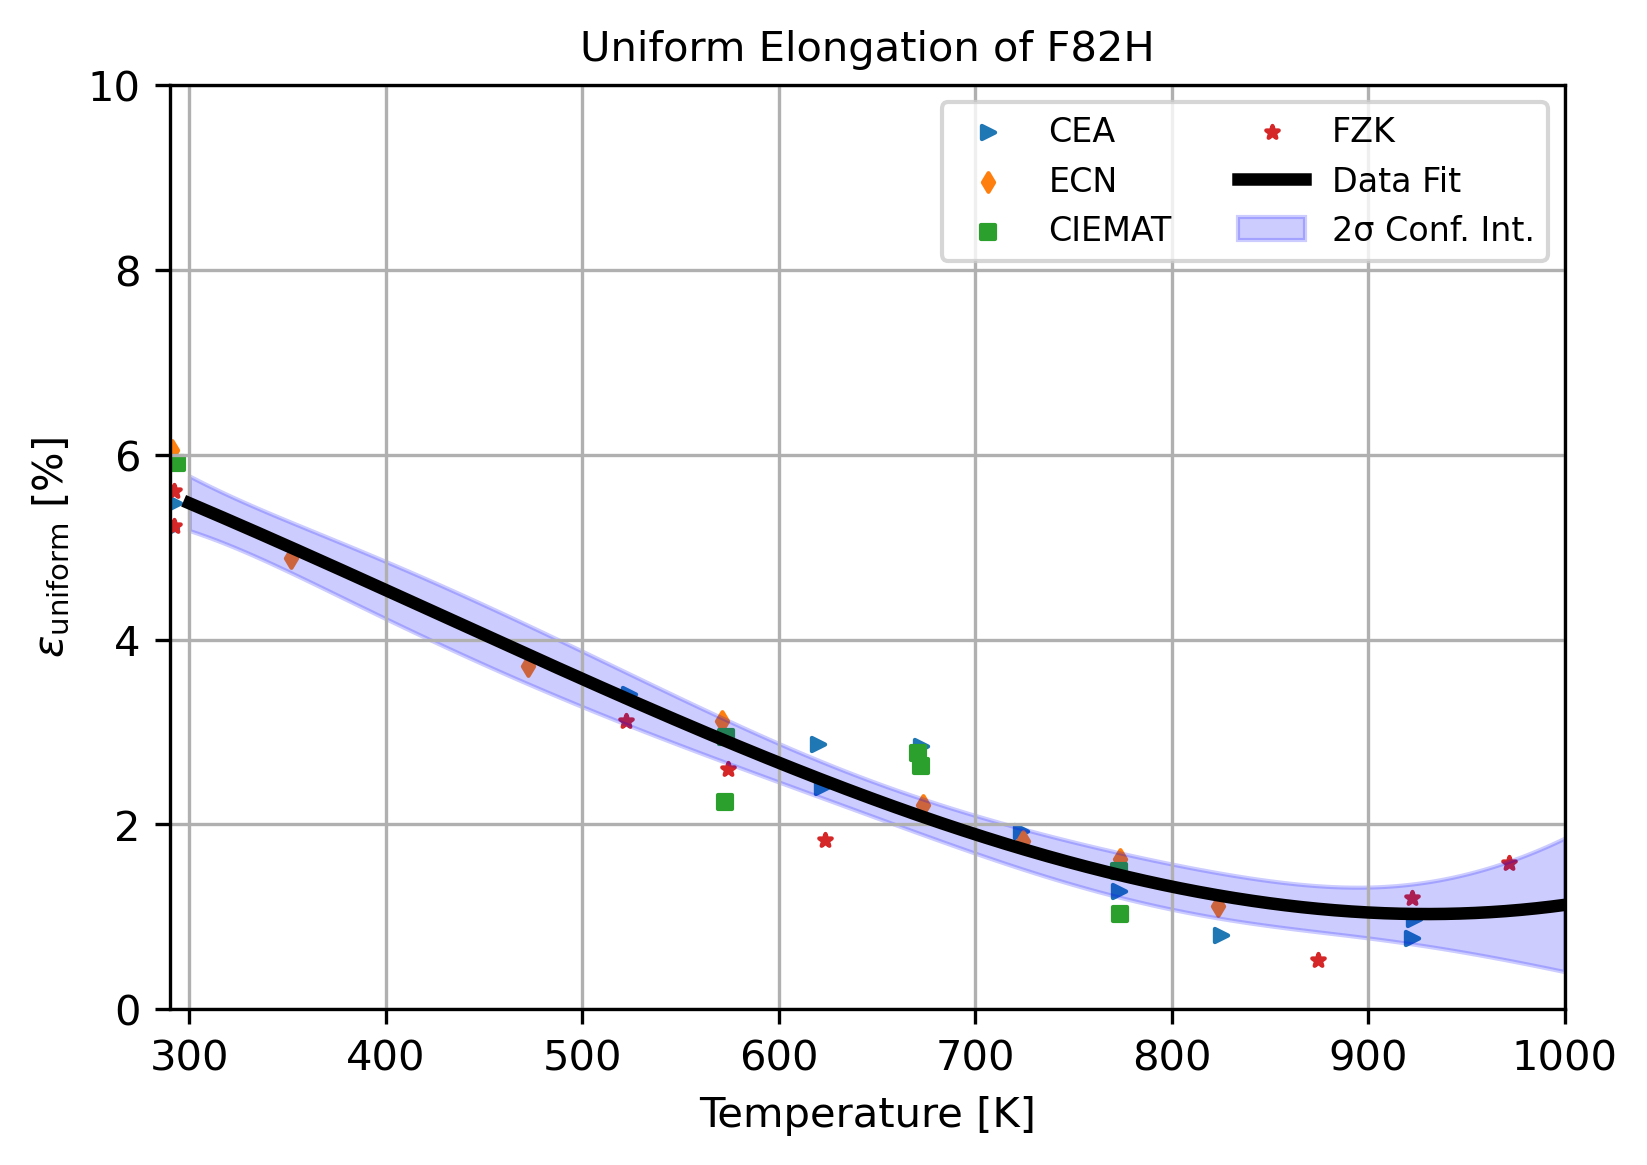

In [12]:
# Load excel data for desired property name
material_property = "Uniform Elongation"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

x_label = 'Temperature [K]'
y_label = r'$\epsilon_\text{uniform}$ [%]'
x_lim = [290, 1000]
y_lim = [0, 10]
data_labels = [var.split('_')[0] for var in var_names[1::2]] # Replace '_' with your delimiter. Take [0] for the part in front of the delimiter.
# data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK']

# Temperature range and initializations
T = np.linspace(300, 1000, 1000)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2]
vars_y = variables[1::2]
X_data, Y_data = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
X_data += 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
legend_loc = 'upper right'

p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(X_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc='upper right')

### 4.5 Total Elongation

,T_CEA_tC,CEA_t,T_ECN_tC,ECN_t,T_CIEMAT_tC,CIEMAT_t,T_FZK_tC,FZK_t,T_JAERI_tC,JAERI_t
0,18.687006,15.220612,17.516061,18.656908,16.638694,23.655059,18.010233,15.136548,16.984994,21.169447
1,17.595380,11.840886,77.909969,15.138426,301.641720,15.639512,400.284656,8.632500,19.083341,19.959147
2,252.221338,8.478699,197.765601,13.334048,302.244766,7.657476,597.740209,25.683929,20.866522,16.279494
3,249.170094,7.265266,301.589956,10.544117,302.906292,6.400074,698.050192,24.019075,497.611347,21.544136
4,349.752750,7.142764,399.348428,9.877881,399.720866,14.717389,NaN,NaN,NaN,NaN
5,399.616370,6.799844,449.801045,10.037060,400.514567,11.710500,NaN,NaN,NaN,NaN
6,448.244849,10.919695,501.217775,11.646948,498.987414,20.574656,NaN,NaN,NaN,NaN
7,449.319589,8.580022,549.421205,13.152979,498.123496,24.510961,NaN,NaN,NaN,NaN
8,499.203368,13.913173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,500.232280,12.180098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fitting parameters for F82H Total Elongation** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 37
    # variables        = 4
    chi-square         = 502.957654
    reduced chi-square = 15.2411410
    Akaike info crit   = 104.554758
    Bayesian info crit = 110.998430
    R-squared          = 0.56752698
[[Variables]]
    c0:  62.0864929 +/- 18.8055342 (30.29%) (init = 1)
    c1: -0.23063109 +/- 0.10917881 (47.34%) (init = 1)
    c2:  3.0322e-04 +/- 1.8982e-04 (62.60%) (init = 1)
    c3: -1.0815e-07 +/- 1.0249e-07 (94.76%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9964
    C(c1, c2) = -0.9959
    C(c0, c1) = -0.9937
    C(c1, c3) = +0.9851
    C(c0, c2) = +0.9809
    C(c0, c3) = -0.9635


**The equation for F82H Total Elongation is:**


<IPython.core.display.Latex object>

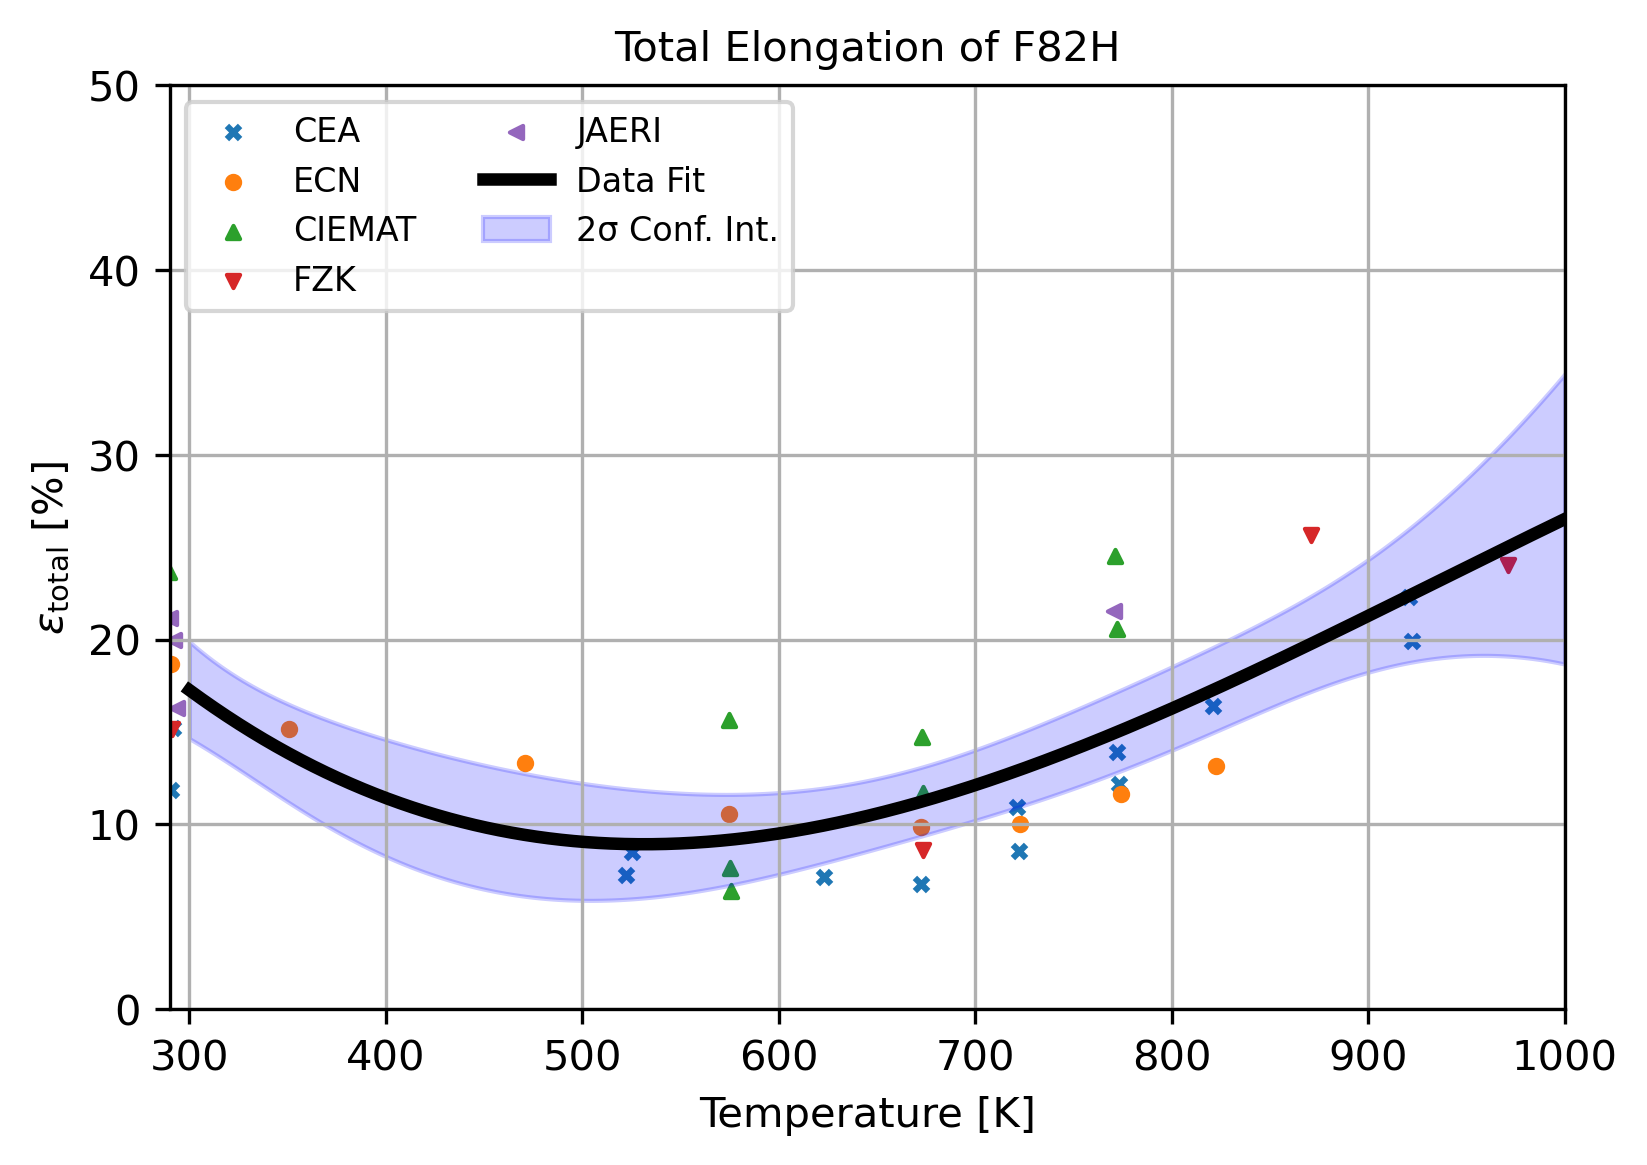

In [13]:
# Load excel data for desired property name
material_property = "Total Elongation"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

x_label = 'Temperature [K]'
y_label = r'$\epsilon_\text{total}$ [%]'
x_lim = [290, 1000]
y_lim = [0, 50]
data_labels = [var.split('_')[0] for var in var_names[1::2]] # Replace '_' with your delimiter. Take [0] for the part in front of the delimiter.
# data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK', 'JAERI']

# Temperature range and initializations
T = np.linspace(300, 1000, 1000)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2]
vars_y = variables[1::2]
X_data, Y_data = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
X_data += 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
legend_loc = 'upper right'

p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(X_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc='upper left')

### 4.6 Creep

,Time_HT9s66T873h,Strain_HT9s66T873,Time_HT9s53T873h,Strain_HT9s53T873,Time_HT9s39T873h,Strain_HT9s39T873,Time_HT9s26T873h,Strain_HT9s26T873
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,61.048565,0.185523,84.300643,0.127654,119.930564,0.081212,567.044213,0.069551
2,190.558800,0.218694,270.655039,0.154065,1062.296261,0.144600,1116.140599,0.090522
3,497.186888,0.268442,589.886000,0.212399,5132.590641,0.206887,5044.865597,0.147096
4,909.862070,0.340627,1083.368334,0.227774,7520.581538,0.292159,7505.051219,0.166590
5,4975.448677,0.514988,5151.369792,0.348565,9663.638215,0.310601,9546.812816,0.209773
6,7445.908938,0.599692,7552.471299,0.402324,13754.201137,0.386425,13726.554211,0.254514
7,9502.628340,0.671743,9659.927663,0.459410,NaN,NaN,NaN,NaN
8,NaN,NaN,13728.145943,0.568089,NaN,NaN,NaN,NaN


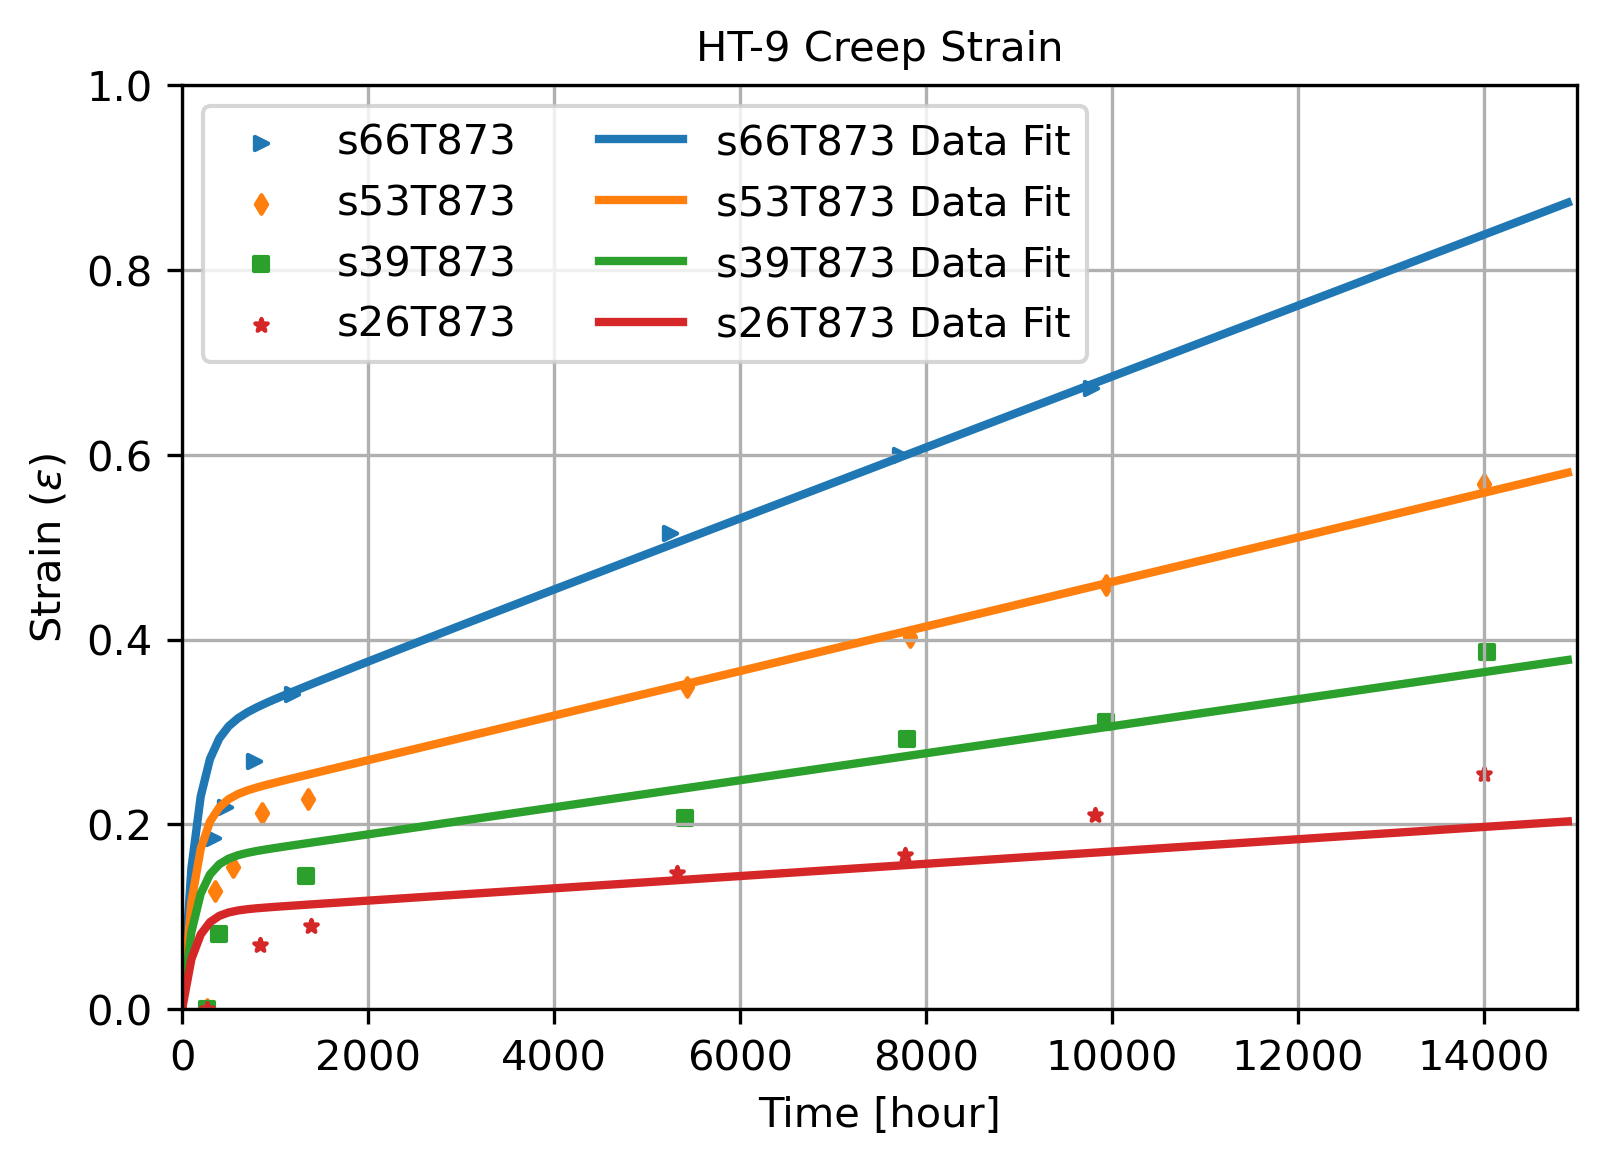

In [14]:
# Load excel data for desired property name
material_property = "HT-9 Creep Strain"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

x_label = 'Time [hour]'
y_label = r'Strain ($\epsilon$)'
x_lim = [0, 15000]
y_lim = [0, 1]
data_labels = [var.split('HT9')[1] for var in var_names[1::2]] # Replace 'HT9' with your delimiter. Take [1] for the part after the delimiter.
# data_labels = ['s26T873', 's39T873', 's53T873', 's66T873']

# Initialize fitting constants and functions
t = 3600 * np.arange(0, 15000, 100)
t_h = t / 3600
n_size = t.size
e1 = np.zeros(n_size)
e2 = np.zeros(n_size)
e3 = np.zeros(n_size)
e4 = np.zeros(n_size)

# Create custom fits
P_0 = lambda T: 0.5 - 2600 / T
P_1 = lambda T: 1 + 50 / T
e_p = lambda s, T: 10**(P_0(T) + P_1(T) * np.log10(s))
m = 2e-6
s0 = lambda s: 0.025 * s + 0.0055 * s**2
S_l = lambda T: -5.7 - 5562.28 / T
e_s = lambda s, T: 10**(S_l(T) + 2.5 * np.log10(s - s0(s)))
eps = lambda s, T, t: e_p(s, T) * (1 - np.exp(-m * t)) + e_s(s, T) * t
t_R = 10**7 * 3600

for i in range(n_size):
    e1[i] = eps(26, 873, t[i])
    e2[i] = eps(39, 873, t[i])
    e3[i] = eps(53, 873, t[i])
    e4[i] = eps(66 / (1 - (t[i] / t_R)**(1 / 3.5)), 873, t[i])

# Assemble raw and fit data
vars_x = variables[::2]
vars_y = variables[1::2]
x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
x_fit_list = [t_h, t_h, t_h, t_h]
y_fit_list = [e4, e3, e2, e1]
fit_labels = [label + ' Data Fit' for label in data_labels]
legend_loc = 'upper left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label=x_label, y_label=y_label, title=material_property,\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

,log10timeh_T91s100T873,log10strainrate_T91s100T873,log10timeh_T91s125T873,log10strainrate_T91s125T873,log10timeh_T91s150T873,log10strainrate_T91s150T873,log10timeh_T91s200T873,log10strainrate_T91s200T873,log10timeh_T91s225T873,log10strainrate_T91s225T873,log10timeh_T91s250T873,log10strainrate_T91s250T873,log10timeh_T91s100T923,log10strainrate_T91s100T923,log10timeh_T91s100T973,log10strainrate_T91s100T973
0,-2.013622,-5.359214,-1.968025,-5.145993,-1.949434,-4.992927,-1.962097,-4.948188,-1.974567,-4.688262,-1.992587,-4.393764,-1.904585,-5.315931,-1.963356,-4.679565
1,-1.921972,-5.402657,-1.860381,-5.273445,-1.848490,-5.081457,-1.843766,-5.104594,-1.745782,-4.969743,-1.920837,-4.456413,-1.798205,-5.445333,-1.861200,-4.772121
2,-1.833978,-5.503227,-1.729096,-5.415692,-1.741248,-5.187583,-1.730333,-5.219809,-1.527142,-4.971481,-1.810779,-4.510499,-1.688025,-5.517806,-1.724217,-4.899891
3,-1.711856,-5.532574,-1.537408,-5.611979,-1.656112,-5.299382,-1.644020,-5.302801,-1.397036,-5.011090,-1.753458,-4.643982,-1.566447,-5.640260,-1.640635,-4.987884
4,-1.604557,-5.718993,-1.427113,-5.715107,-1.523714,-5.510981,-1.552767,-5.381259,-1.319024,-5.088858,-1.624268,-4.715956,-1.479063,-5.762323,-1.575626,-5.032145
5,-1.516504,-5.840995,-1.303685,-5.828077,-1.331253,-5.641178,-1.409722,-5.505855,-1.189019,-5.234545,-1.605153,-4.751582,-1.391679,-5.834536,-1.485078,-5.102810
6,-1.439932,-5.948637,-1.201270,-5.926273,-1.208276,-5.800066,-1.244402,-5.566612,-1.058857,-5.216292,-1.509406,-4.752343,-1.308094,-5.892463,-1.410783,-5.142826
7,-1.344390,-6.020680,-1.106787,-6.073097,-1.075800,-5.929786,-1.155612,-5.640478,-0.965200,-5.265255,-1.428064,-4.797332,-1.232108,-6.021518,-1.327200,-5.182947
8,-1.305976,-6.120937,-0.928195,-6.220589,-0.943307,-6.041962,-1.029802,-5.719211,-0.876740,-5.304532,-1.332368,-4.851304,-1.156122,-6.065114,-1.227365,-5.218902
9,-1.206619,-6.193004,-0.786438,-6.406741,-0.823471,-6.183279,-0.899073,-5.816274,-0.653023,-5.441320,-1.222395,-4.994074,-1.049741,-6.144666,-1.136818,-5.311326


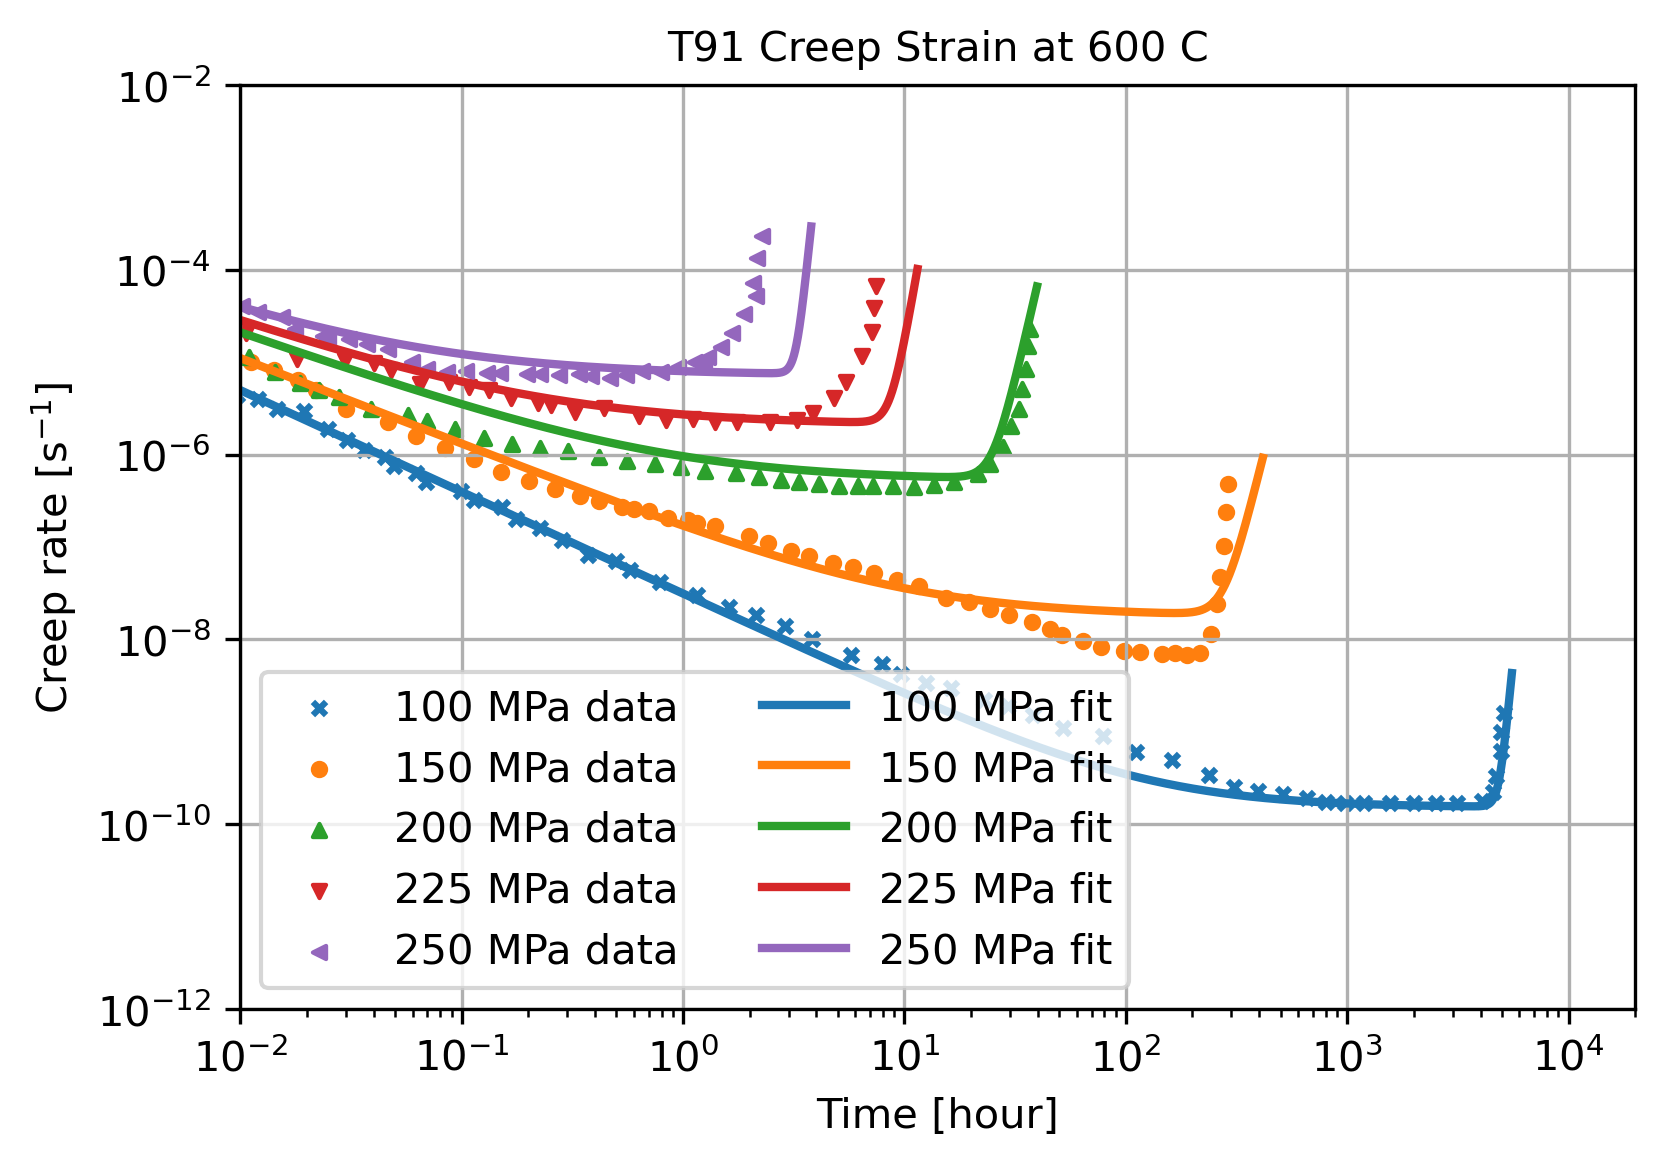

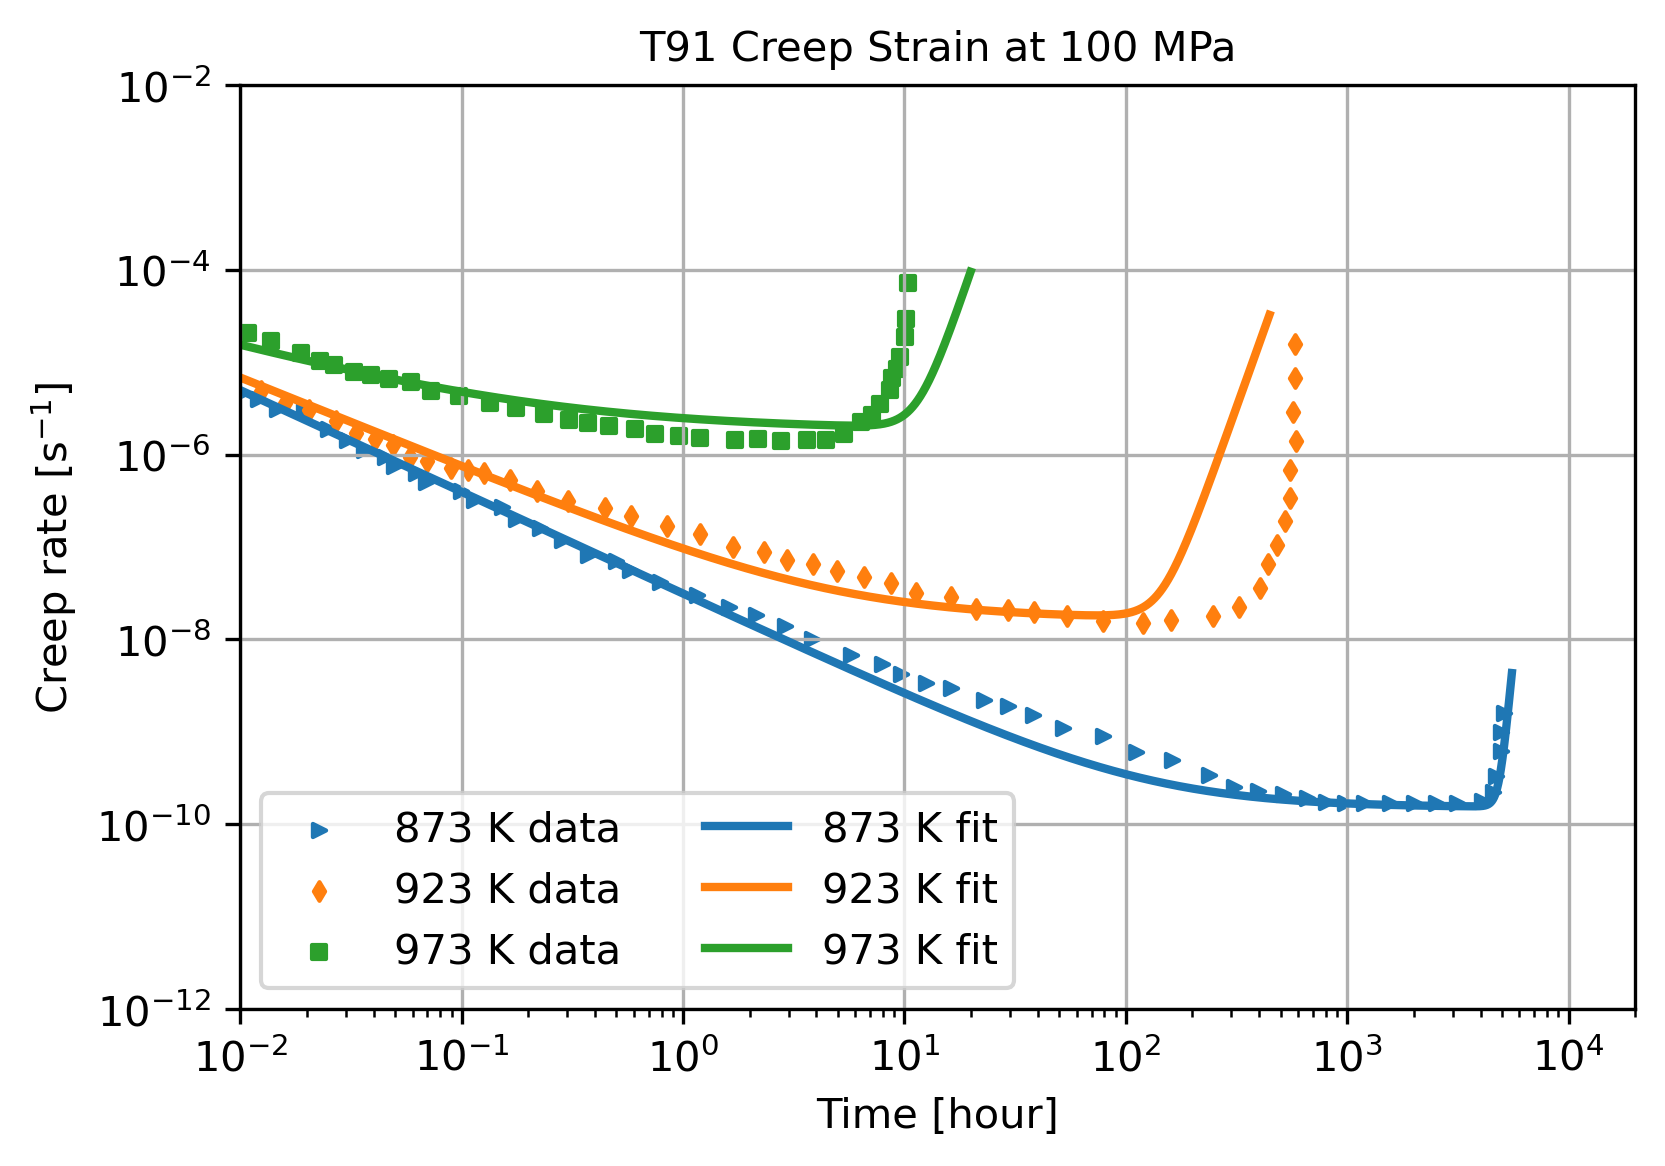

In [15]:
# Load excel data for desired property name
material_property = "T91 Creep Strain"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=65, room_temp=293, display_data_table_bool = True)

x_label = 'Time [hour]'
y_label = r'Creep rate [s$^{-1}$]'
x_lim = [1e-2, 2e4]
y_lim = [1e-12, 1e-2]

# Initialize fitting constants and functions
i_max = 10000
t_max = 10000

A_p = -0.02193
B_p = -0.02796
C_p = 28.7

A_r = -0.021
B_r = -0.0231
C_r = 26.1

A_e = -68.97
B_e = 11.75
C_e = 0.04084

gamma_0 = 1.04
gamma_1 = 4e-3
gamma_2 = 2e-3
a_0 = -4.2
b_0 = 3.5e-3
c_0 = 1e-6

def get_epsdot_T91(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0):

    del_x = (np.log10(t_max) - (-2)) / i_max
    del_t = t_max / i_max
    time = np.zeros(i_max)
    epsdot = np.zeros(i_max)
    x = np.zeros(i_max)

    Lt_p = lambda s, T: A_p * s + B_p * T + C_p
    Le = lambda s, T: A_e + B_e * np.log10(s) + C_e * T
    Lt_r = lambda s, T: A_r * s + B_r * T + C_r
    gamma = lambda s, T: gamma_0 + gamma_1 * (T - 873) + gamma_2 * (s - 100)
    Lt_s = lambda s, T: Lt_r(s, T) / gamma(s, T)
    Le_r = lambda s, T: -Lt_r(s, T) * 1.6
    Le_0 = lambda s, T: a_0 + b_0 * (s - 100) + c_0 * (T - 873)

    t_r = 10**Lt_r(sig, Temp)
    a1 = (Le_0(sig, Temp) - Le(sig, Temp)) / (-3 - Lt_p(sig, Temp))
    b1 = Le_0(sig, Temp) + 3 * a1
    a3 = (Le_r(sig, Temp) - Le(sig, Temp)) / (Lt_r(sig, Temp) - Lt_s(sig, Temp))
    b3 = Le_r(sig, Temp) - a3 * Lt_r(sig, Temp)
    
    for i in range(i_max):
        
        x[i] = -2 + (i - 1) * del_x
        time[i] = 10**x[i]
    
        y_I = a1 * x[i] + b1
        y_II = Le(sig, Temp)
        y_III = a3 * x[i] + b3
        epsdot[i] = 10**y_I + 10**y_II + 10**y_III
    
        if x[i] > Lt_r(sig, Temp):
            epsdot[i] = 0

    return time, epsdot

get_epsdot_T91_lambda = lambda sig, Temp:\
    get_epsdot_T91(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)

# Assemble raw and fit data for first plot
T91s100T873_endpoint = 0.9575
t_T91s100T873, epsdot_T91s100T873 = get_epsdot_T91_lambda(100, 873)

T91s150T873_endpoint = 0.77
t_T91s150T873, epsdot_T91s150T873 = get_epsdot_T91_lambda(150, 873)

T91s200T873_endpoint = 0.6
t_T91s200T873, epsdot_T91s200T873 = get_epsdot_T91_lambda(200, 873)

T91s225T873_endpoint = 0.51
t_T91s225T873, epsdot_T91s225T873 = get_epsdot_T91_lambda(225, 873)

T91s250T873_endpoint = 0.43
t_T91s250T873, epsdot_T91s250T873 = get_epsdot_T91_lambda(250, 873)

vars_x = variables[::2]
vars_y = variables[1::2]
vars_x = [vars_x[0], vars_x[2], vars_x[3], vars_x[4], vars_x[5]]
vars_y = [vars_y[0], vars_y[2], vars_y[3], vars_y[4], vars_y[5]]
x_data_list = [np.power(10, x) for x in vars_x]
y_data_list = [np.power(10, y) for y in vars_y]

x_fit_list = [t_T91s100T873[:int(i_max*T91s100T873_endpoint)],\
              t_T91s150T873[:int(i_max*T91s150T873_endpoint)],\
              t_T91s200T873[:int(i_max*T91s200T873_endpoint)],\
              t_T91s225T873[:int(i_max*T91s225T873_endpoint)],\
              t_T91s250T873[:int(i_max*T91s250T873_endpoint)]]

y_fit_list = [epsdot_T91s100T873[:int(i_max*T91s100T873_endpoint)],\
              epsdot_T91s150T873[:int(i_max*T91s150T873_endpoint)],\
              epsdot_T91s200T873[:int(i_max*T91s200T873_endpoint)],\
              epsdot_T91s225T873[:int(i_max*T91s225T873_endpoint)],\
              epsdot_T91s250T873[:int(i_max*T91s250T873_endpoint)]]
              
data_labels = ['100 MPa data', '150 MPa data', '200 MPa data', '225 MPa data', '250 MPa data']
fit_labels = ['100 MPa fit', '150 MPa fit', '200 MPa fit', '225 MPa fit', '250 MPa fit']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label=x_label, y_label=y_label, title=material_property + " at 600 C",
                  scale='log-log', font_size=f_size, x_lim=x_lim, y_lim=y_lim,
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,
                  data_colors=None, fit_colors=None, marker_size=m_size, 
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)


# Assemble raw and fit data for second plot
T91s100T873_endpoint = 0.9575
t_T91s100T873, epsdot_T91s100T873 = get_epsdot_T91_lambda(100, 873)
T91s100T923_endpoint = 0.775
t_T91s100T923, epsdot_T91s100T923 = get_epsdot_T91_lambda(100, 923)
T91s100T973_endpoint = 0.55
t_T91s100T973, epsdot_T91s100T973 = get_epsdot_T91_lambda(100, 973)

vars_x = variables[::2]
vars_y = variables[1::2]
vars_x = [vars_x[0], vars_x[-2], vars_x[-1]]
vars_y = [vars_y[0], vars_y[-2], vars_y[-1]]
x_data_list = [np.power(10, x) for x in vars_x]
y_data_list = [np.power(10, y) for y in vars_y]

x_fit_list = [t_T91s100T873[:int(i_max*T91s100T873_endpoint)],\
              t_T91s100T923[:int(i_max*T91s100T923_endpoint)],\
              t_T91s100T973[:int(i_max*T91s100T973_endpoint)]]
y_fit_list = [epsdot_T91s100T873[:int(i_max*T91s100T873_endpoint)],\
              epsdot_T91s100T923[:int(i_max*T91s100T923_endpoint)],\
              epsdot_T91s100T973[:int(i_max*T91s100T973_endpoint)]] 

data_labels = ['873 K data', '923 K data', '973 K data']
fit_labels = ['873 K fit', '923 K fit', '973 K fit']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label=x_label, y_label=y_label, title=material_property + " at 100 MPa",\
                  scale='log-log', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

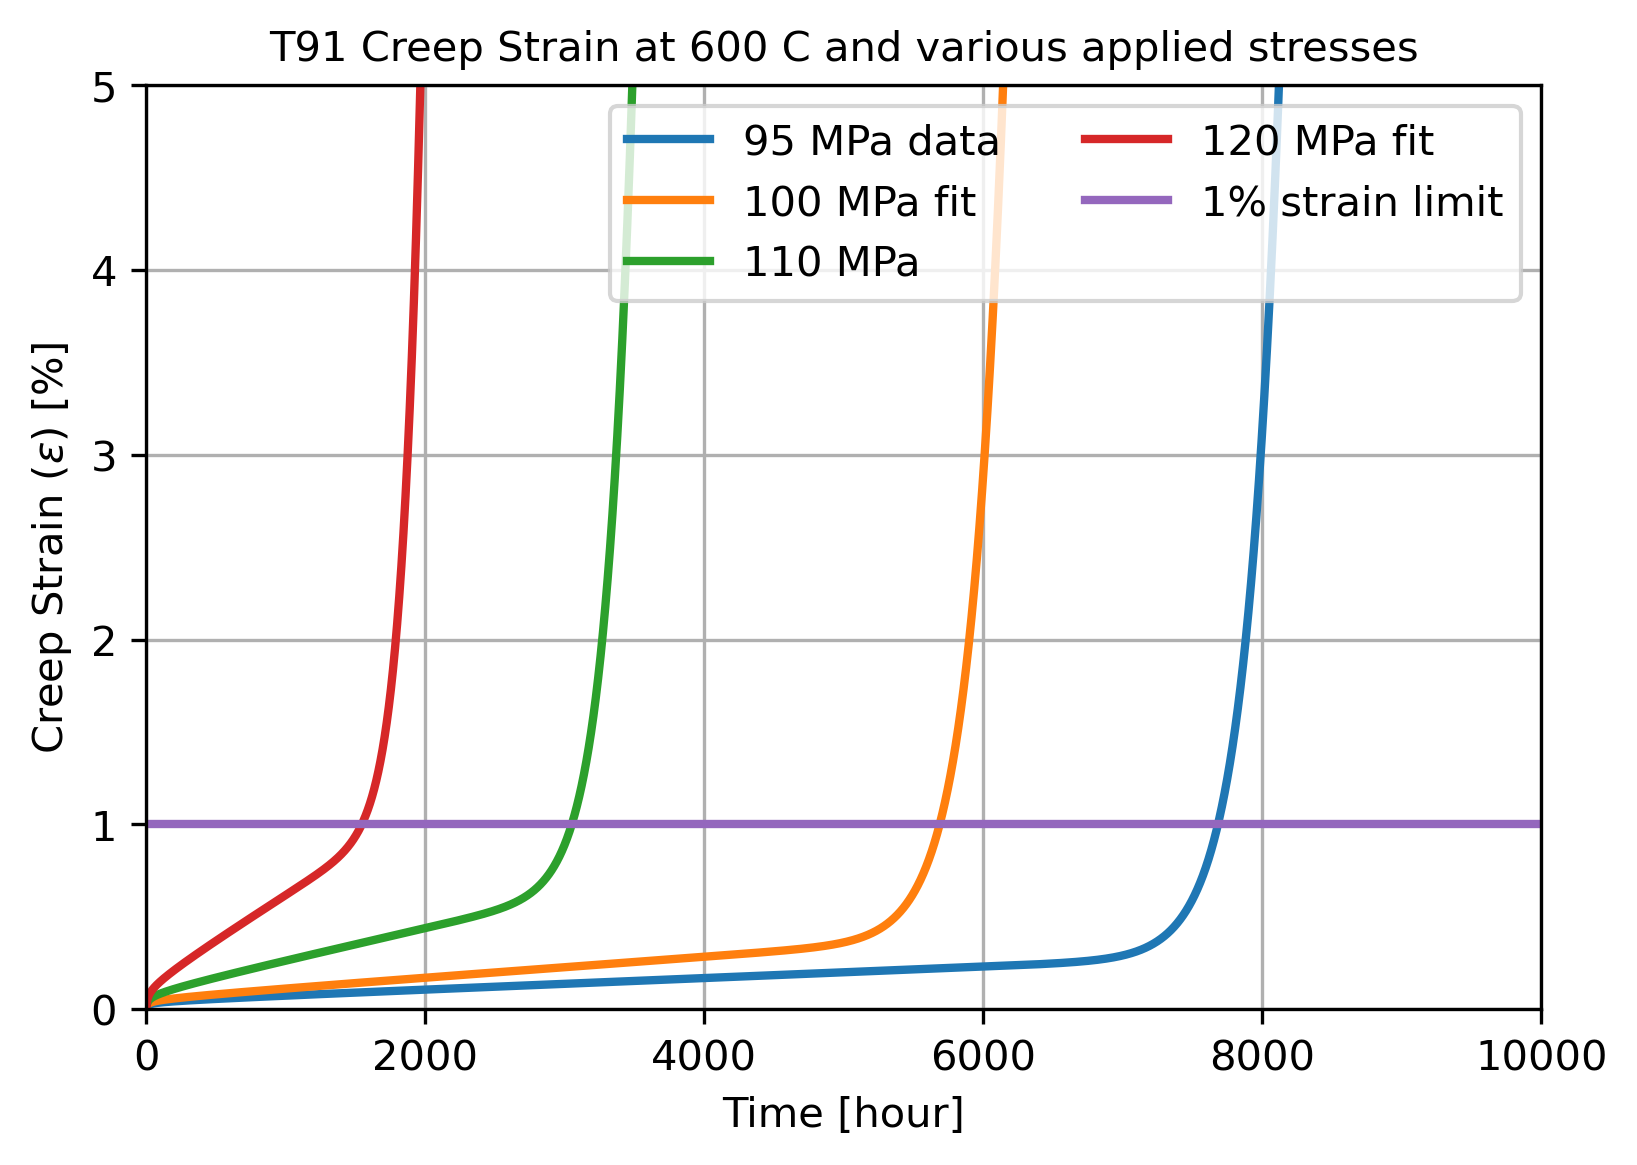

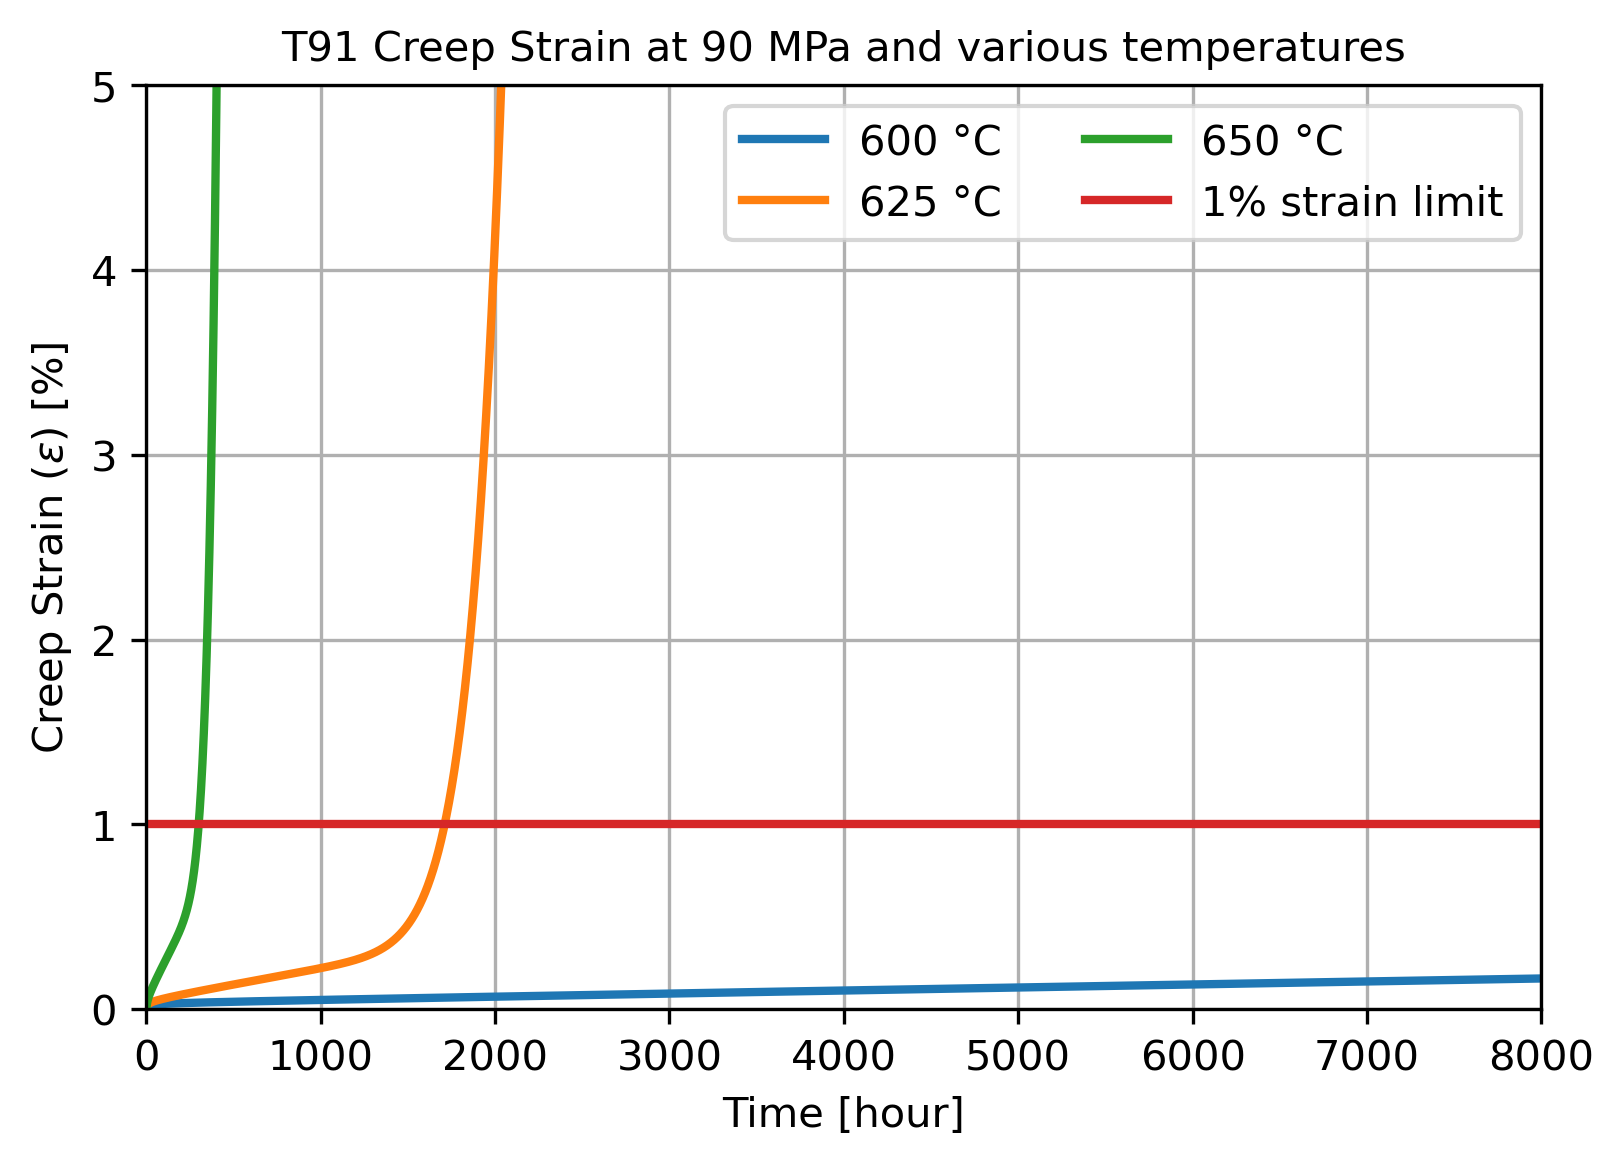

In [16]:
from scipy.integrate import trapezoid

x_label = 'Time [hour]'
y_label = r'Creep Strain ($\epsilon$) [%]'
x_lim = [0, t_max]
y_lim = [0, 5]

# Initialize fitting constants and functions

def get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0):

    del_x = (np.log10(t_max) - (-2)) / i_max
    del_t = t_max / i_max
    time = np.zeros(i_max)
    epsdot = np.zeros(i_max)
    x = np.zeros(i_max)
    q = np.zeros(i_max)

    Lt_p = lambda s, T: A_p * s + B_p * T + C_p
    Le = lambda s, T: A_e + B_e * np.log10(s) + C_e * T
    Lt_r = lambda s, T: A_r * s + B_r * T + C_r
    gamma = lambda s, T: gamma_0 + gamma_1 * (T - 873) + gamma_2 * (s - 100)
    Lt_s = lambda s, T: Lt_r(s, T) / gamma(s, T)
    Le_r = lambda s, T: -Lt_r(s, T) * 1.6
    Le_0 = lambda s, T: a_0 + b_0 * (s - 100) + c_0 * (T - 873)

    t_r = 10 ** Lt_r(sig, Temp)
    a1 = (Le_0(sig, Temp) - Le(sig, Temp)) / (-3 - Lt_p(sig, Temp))
    b1 = Le_0(sig, Temp) + 3 * a1
    a3 = (Le_r(sig, Temp) - Le(sig, Temp)) / (Lt_r(sig, Temp) - Lt_s(sig, Temp))
    b3 = Le_r(sig, Temp) - a3 * Lt_r(sig, Temp)
    
    for i in range(i_max):
        time[i] = (i + 1) * del_t
        x[i] = np.log10(time[i])
        y_I = a1 * x[i] + b1
        y_II = Le(sig, Temp)
        y_III = a3 * x[i] + b3
        epsdot[i] = 10 ** y_I + 10 ** y_II + 10 ** y_III
        
        if epsdot[i] > 10 ** Le_r(sig, Temp) and x[i] > Lt_s(sig, Temp):
            epsdot[i] = 10 ** Le_r(sig, Temp)
        
        q[i] = 100 * del_t * trapezoid(3600 * epsdot[:i + 1])
        if q[i] > 32:
            q[i] = 32

    return time, q

get_epsdot_F82H_lambda_1 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)


# Assemble fit data for first plot

t_95_873, epsdot_95_873 = get_epsdot_F82H_lambda_1(95, 873)
t_100_873, epsdot_100_873 = get_epsdot_F82H_lambda_1(100, 873)
t_110_873, epsdot_110_873 = get_epsdot_F82H_lambda_1(110, 873)
t_120_873, epsdot_120_873 = get_epsdot_F82H_lambda_1(120, 873)
t_one_percent_limit = np.linspace(0, t_max, 10)
epsdot_one_percent_limit = np.ones(10)
x_fit_list = [t_95_873, t_100_873, t_110_873, t_120_873, t_one_percent_limit]
y_fit_list = [epsdot_95_873, epsdot_100_873, epsdot_110_873, epsdot_120_873, epsdot_one_percent_limit]
fit_labels = ['95 MPa data', '100 MPa fit', '110 MPa', '120 MPa fit', '1% strain limit']
legend_loc = 'upper right'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list=None, y_data_list=None, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label=x_label, y_label=y_label, title=material_property + " at 600 C and various applied stresses",
                  scale='linear', font_size=f_size, x_lim=[0, t_max], y_lim=[0, 5], 
                  grid=True, legend=True, data_labels=None, fit_labels=fit_labels,
                  data_colors=None, fit_colors=None, marker_size=m_size, 
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

t_max = 8000
x_lim = [0, t_max]
get_epsdot_F82H_lambda_2 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)
    
# Assemble fit data for second plot

t_90_873, epsdot_90_873 = get_epsdot_F82H_lambda_2(90, 873)
t_90_898, epsdot_90_898 = get_epsdot_F82H_lambda_2(90, 898)
t_90_923, epsdot_90_923 = get_epsdot_F82H_lambda_2(90, 923)
t_one_percent_limit = np.linspace(0, t_max, 10)
epsdot_one_percent_limit = np.ones(10)

x_fit_list = [t_90_873, t_90_898, t_90_923, t_one_percent_limit]
y_fit_list = [epsdot_90_873, epsdot_90_898, epsdot_90_923, epsdot_one_percent_limit]
fit_labels = ['600 °C', '625 °C', '650 °C', '1% strain limit']
legend_loc = 'upper right'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list=None, y_data_list=None, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label=x_label, y_label=y_label, title=material_property + " at 90 MPa and various temperatures",
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim, 
                  grid=True, legend=True, data_labels=None, fit_labels=fit_labels,
                  data_colors=None, fit_colors=None, marker_size=m_size, 
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

,Time_F82Hs78T873h,Strainrate_F82Hs78T873,Time_F82Hs60T973h,Strainrate_F82Hs60T973
0,0.000000,0.000000,0.000000,0.000000
1,5.595319,0.741122,0.976014,0.339847
2,22.928182,0.875516,1.240129,0.463081
3,45.128368,1.566801,1.585082,0.432273
4,63.004975,1.561445,2.098168,0.493890
5,79.256436,1.556576,2.859577,0.617125
6,101.999351,2.177905,4.590257,0.647933
7,139.920441,2.096749,7.113825,0.863594
8,163.745773,2.787548,10.458591,1.325724
9,202.203506,3.055200,16.112055,1.757046


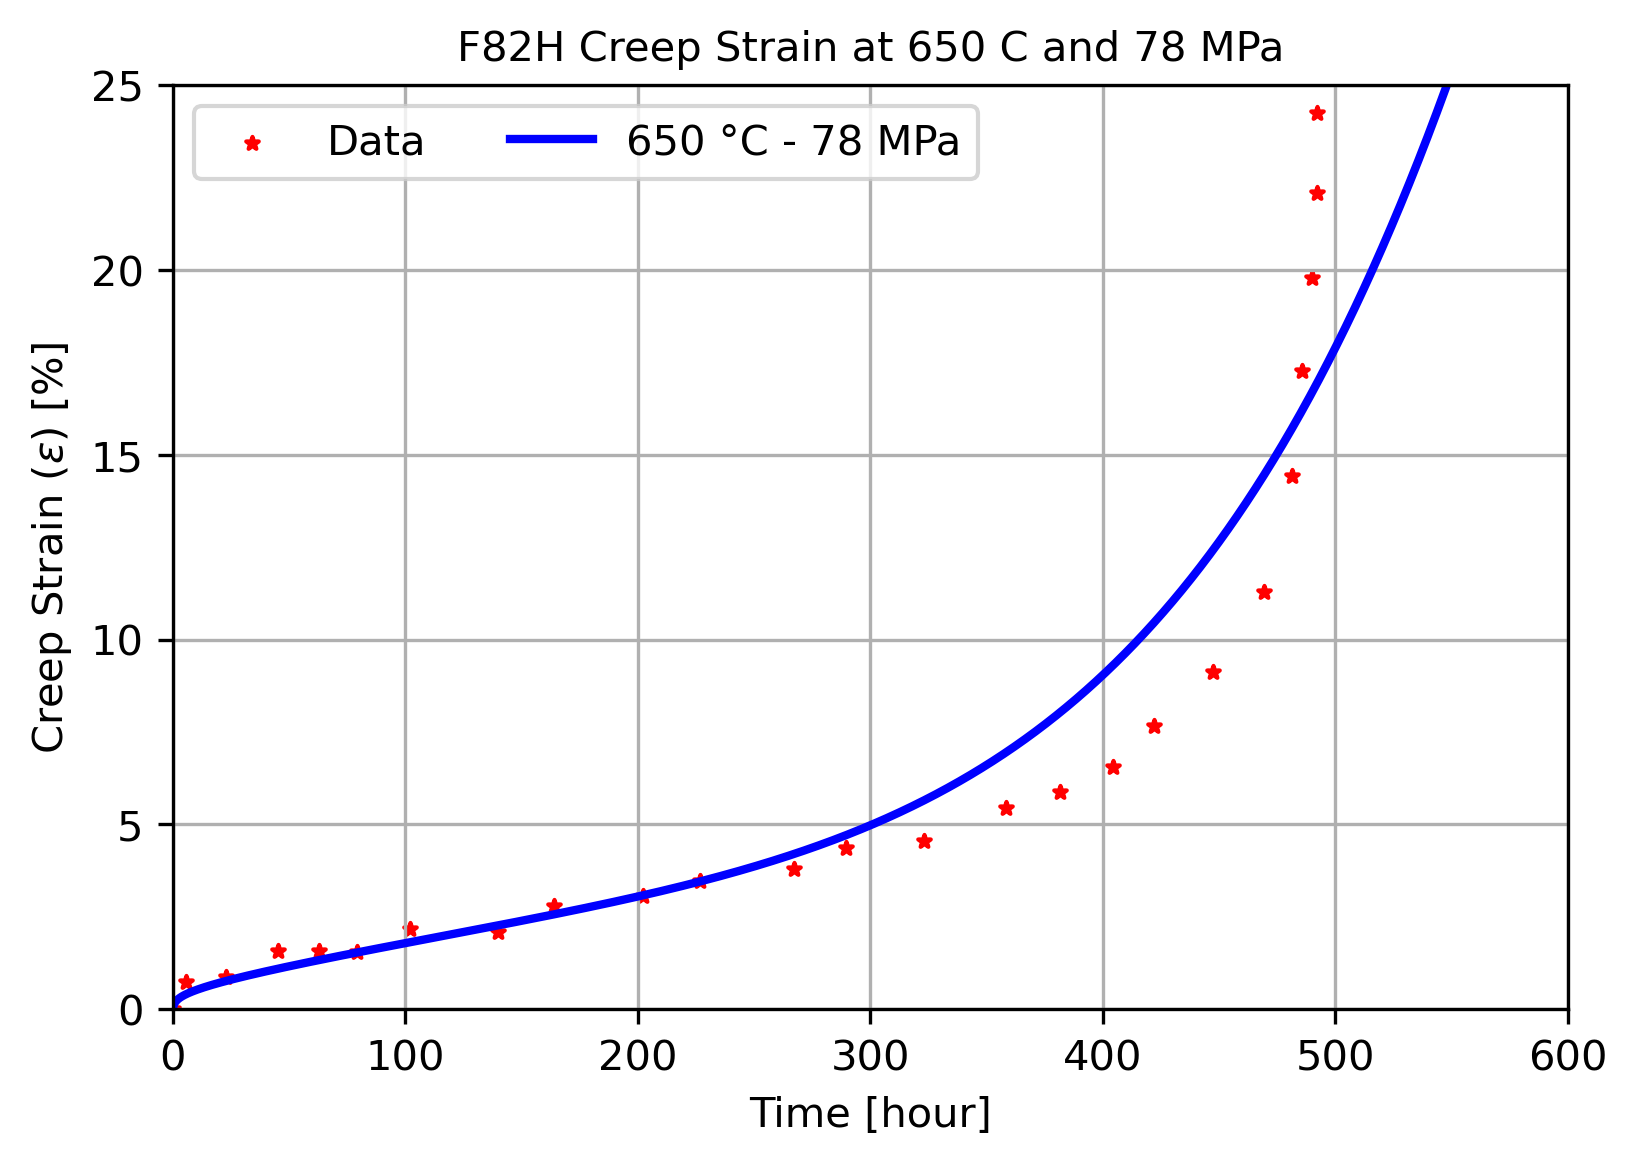

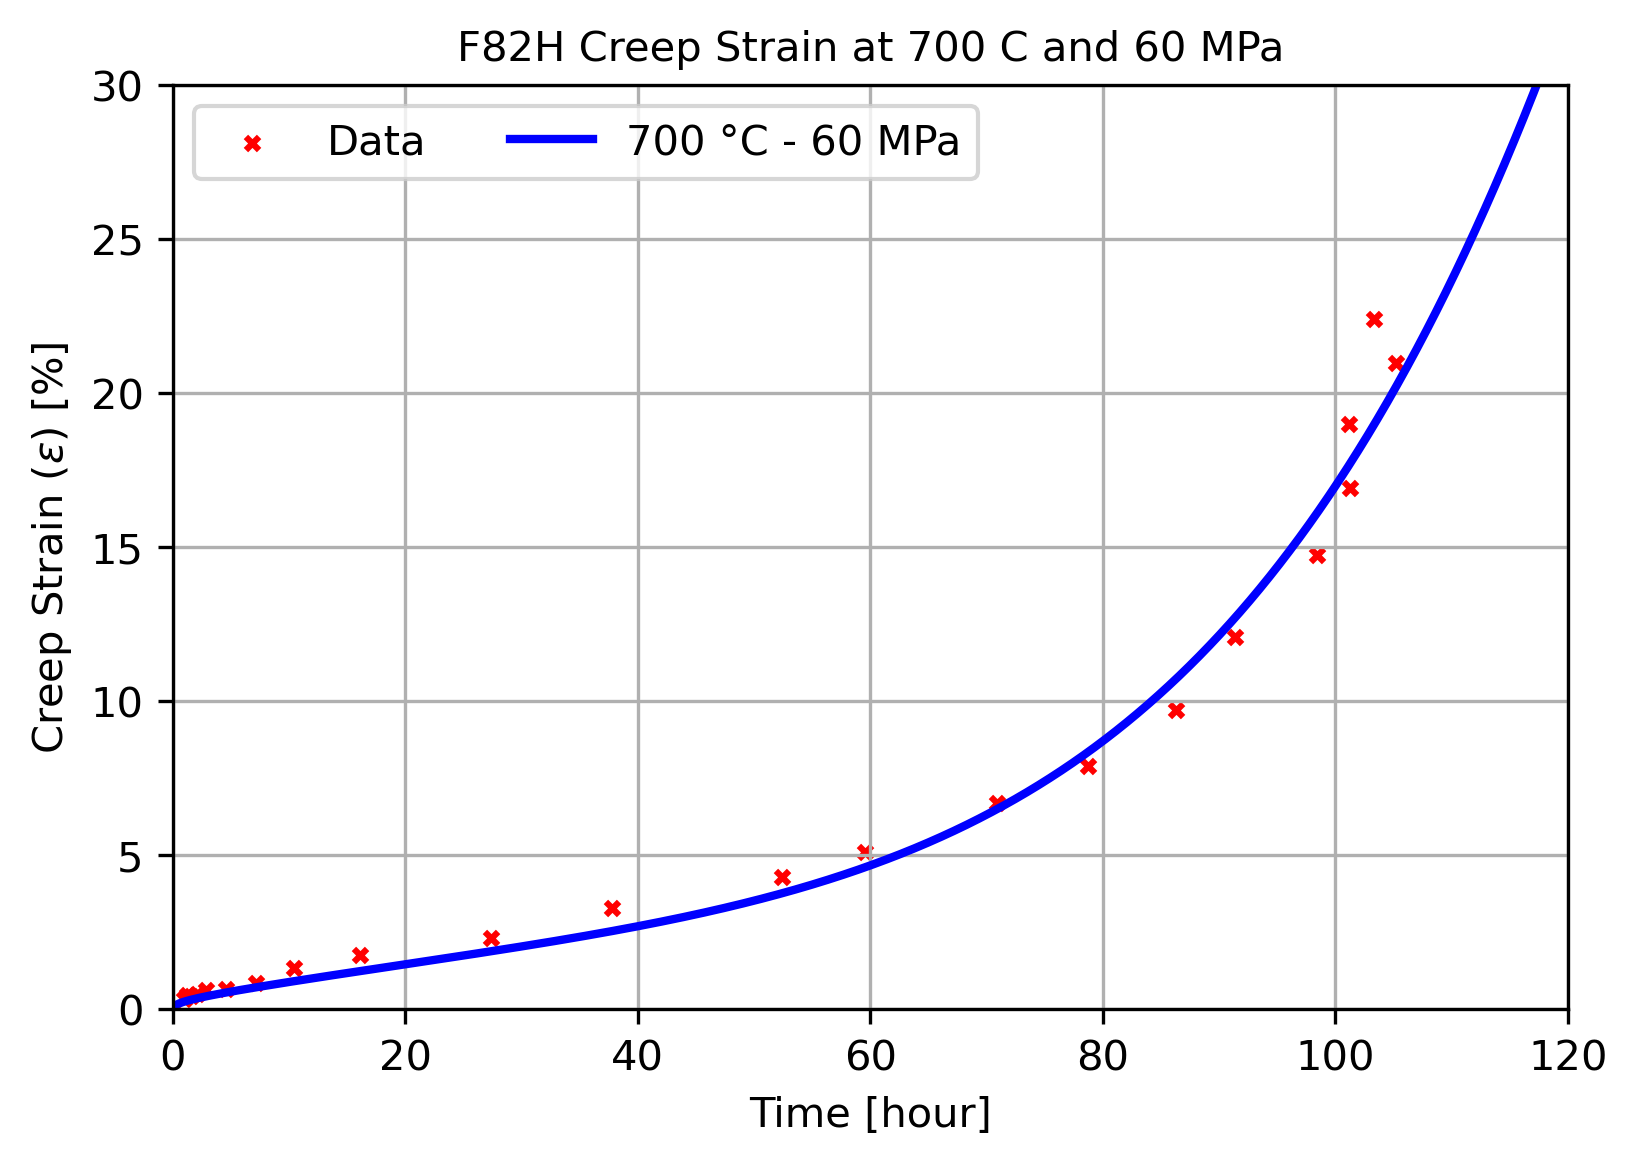

In [17]:
material_property = "F82H Creep Strain"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=35, room_temp=293, display_data_table_bool = True)

x_label = 'Time [hour]'
y_label = r'Creep Strain ($\epsilon$) [%]'
x_lim = [0, 600]
y_lim = [0, 25]

# Initialize fitting constants and functions

gamma_0 = 1.125
C_r = 26.25
A_e = -67.5
A_r = -0.02121
B_r = -0.02329
t_max = 600

get_epsdot_F82H_lambda_3 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)

t_78_923, epsdot_78_923 = get_epsdot_F82H_lambda_3(78, 923)

# Assemble raw and fit data for first plot
x_data_list = [variables[0]]
y_data_list = [variables[1]]
x_fit_list = [t_78_923]
y_fit_list = [epsdot_78_923]
data_colors = ['red']
fit_colors = ['blue']
data_labels = ['Data']
fit_labels = ['650 °C - 78 MPa']
legend_loc = 'upper left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label=x_label, y_label=y_label, title=material_property + " at 650 C and 78 MPa",\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=data_colors, fit_colors=fit_colors, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

x_lim = [0, 120]
y_lim = [0, 30]

gamma_0 = 1.15
A_r = -0.021
B_r = -0.0231
t_max = 120

get_epsdot_F82H_lambda_4 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)

t_60_973, epsdot_60_973 = get_epsdot_F82H_lambda_4(60, 973)

# Assemble raw and fit data for second plot
x_data_list = [variables[2]]
y_data_list = [variables[3]]
x_fit_list = [t_60_973]
y_fit_list = [epsdot_60_973]
data_colors = ['red']
fit_colors = ['blue']
data_labels = ['Data']
fit_labels = ['700 °C - 60 MPa']
legend_loc = 'upper left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label=x_label, y_label=y_label, title=material_property + " at 700 C and 60 MPa",\
                  scale='linear', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=data_colors, fit_colors=fit_colors, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

### 4.7 Fatigue

,log10Cycles2N_eT300,log10Strainamplitude_eT300,log10Cycles2N_pT300,log10Strainamplitude_pT300,log10Cycles2N_tT300,log10Strainamplitude_tT300,log10Cycles2N_H_T300,log10Strainamplitude_H_T300,log10Cycles2N_H_T573,log10Strainamplitude_H_T573,log10Cycles2N_H_T673,log10Strainamplitude_H_T673
0,3.287133,-0.604795,3.288915,-0.836581,3.299461,-0.408056,3.028746,-1.990191,4.042472,-2.207503,3.427042,-1.984225
1,3.601306,-0.663020,3.604400,-1.065366,3.586321,-0.514267,3.074882,-1.819519,4.121945,-2.213015,3.484627,-1.978577
2,3.896654,-0.673058,3.908606,-1.027338,3.913630,-0.480713,2.990841,-1.816800,NaN,NaN,3.677772,-2.118257
3,4.201062,-0.661270,3.909783,-1.180404,3.909655,-0.563786,3.532124,-2.084827,NaN,NaN,3.766361,-2.109783
4,4.505974,-0.715081,4.201930,-1.374102,4.209785,-0.595710,3.716574,-2.210529,NaN,NaN,4.321847,-2.293881
5,4.810516,-0.720786,4.513238,-1.659720,4.510050,-0.645128,3.868472,-2.078919,NaN,NaN,4.383856,-2.288228
6,5.410709,-0.775889,4.818015,-1.696038,4.810348,-0.698920,3.987107,-2.154333,NaN,NaN,4.648201,-2.391478
7,5.711142,-0.847174,5.424060,-2.512099,5.419869,-0.767183,4.004219,-2.207463,NaN,NaN,4.741246,-2.380203
8,NaN,NaN,5.711492,-2.692657,5.724815,-0.825368,4.636133,-2.282399,NaN,NaN,4.855672,-2.436040
9,NaN,NaN,NaN,NaN,NaN,NaN,4.480026,-2.394432,NaN,NaN,5.090219,-2.433024


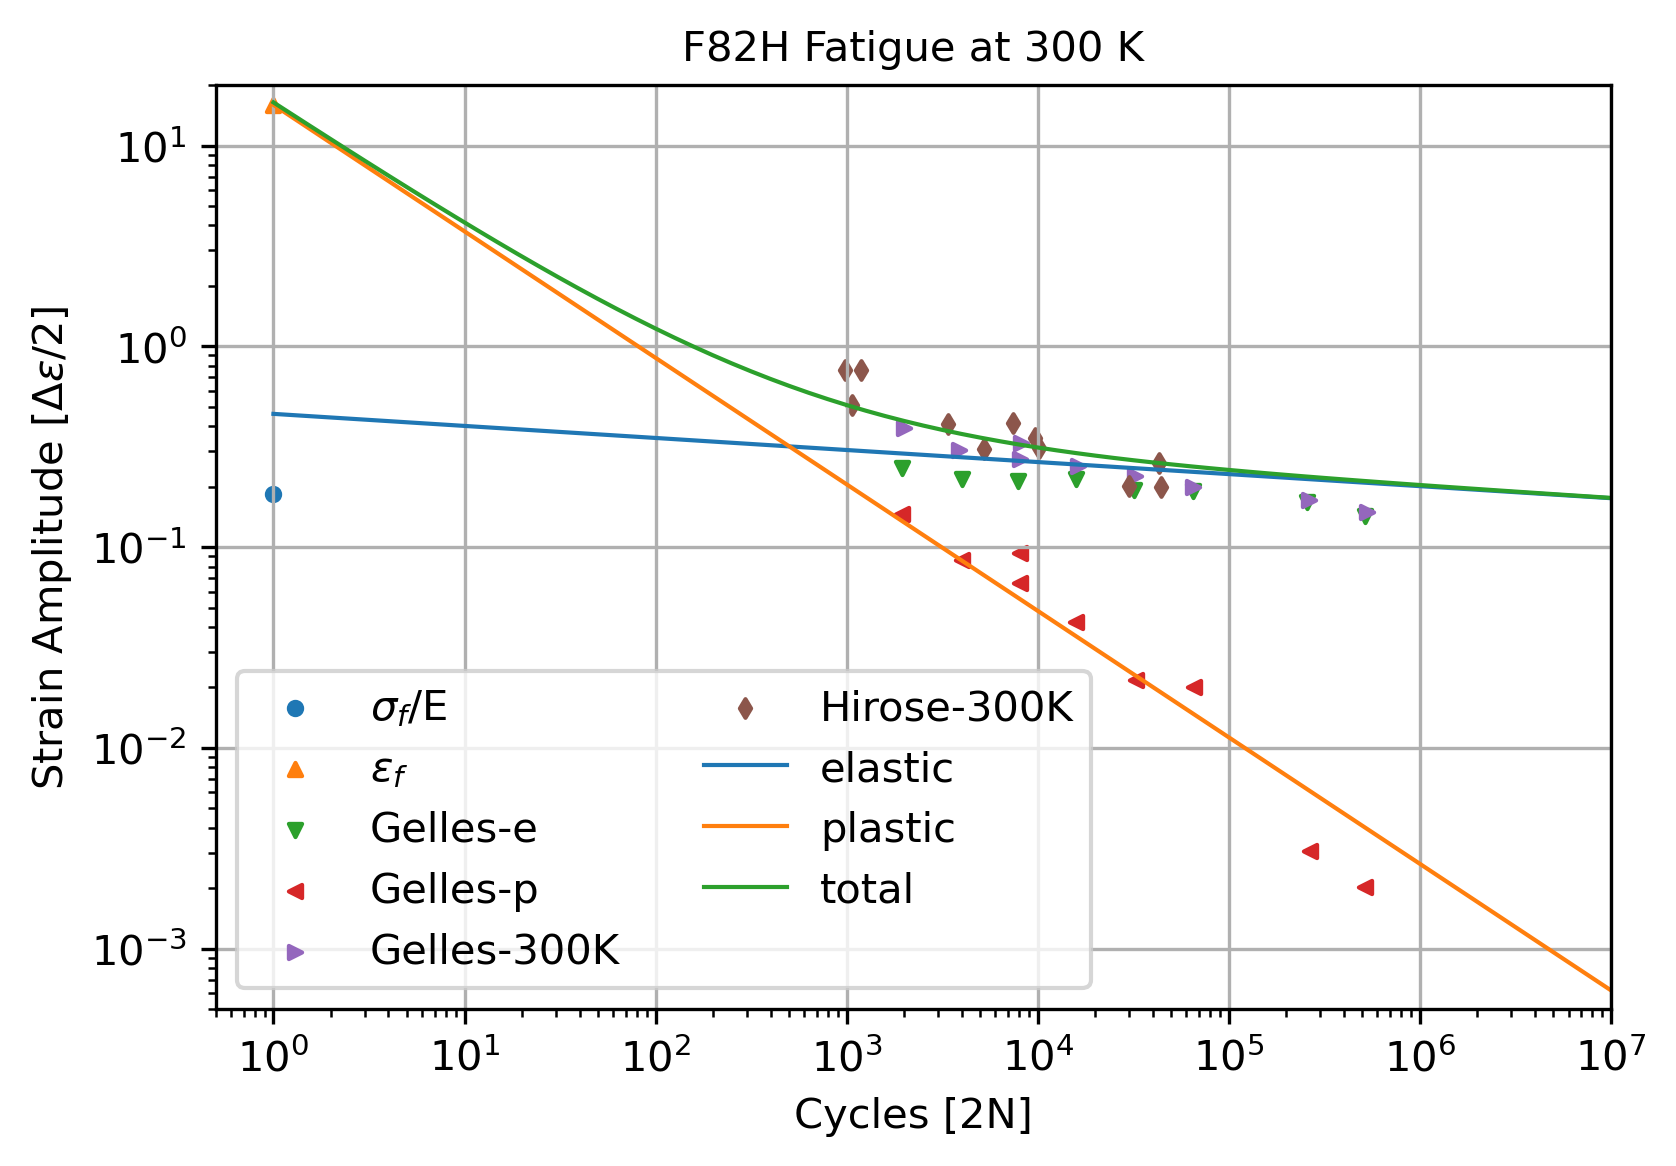

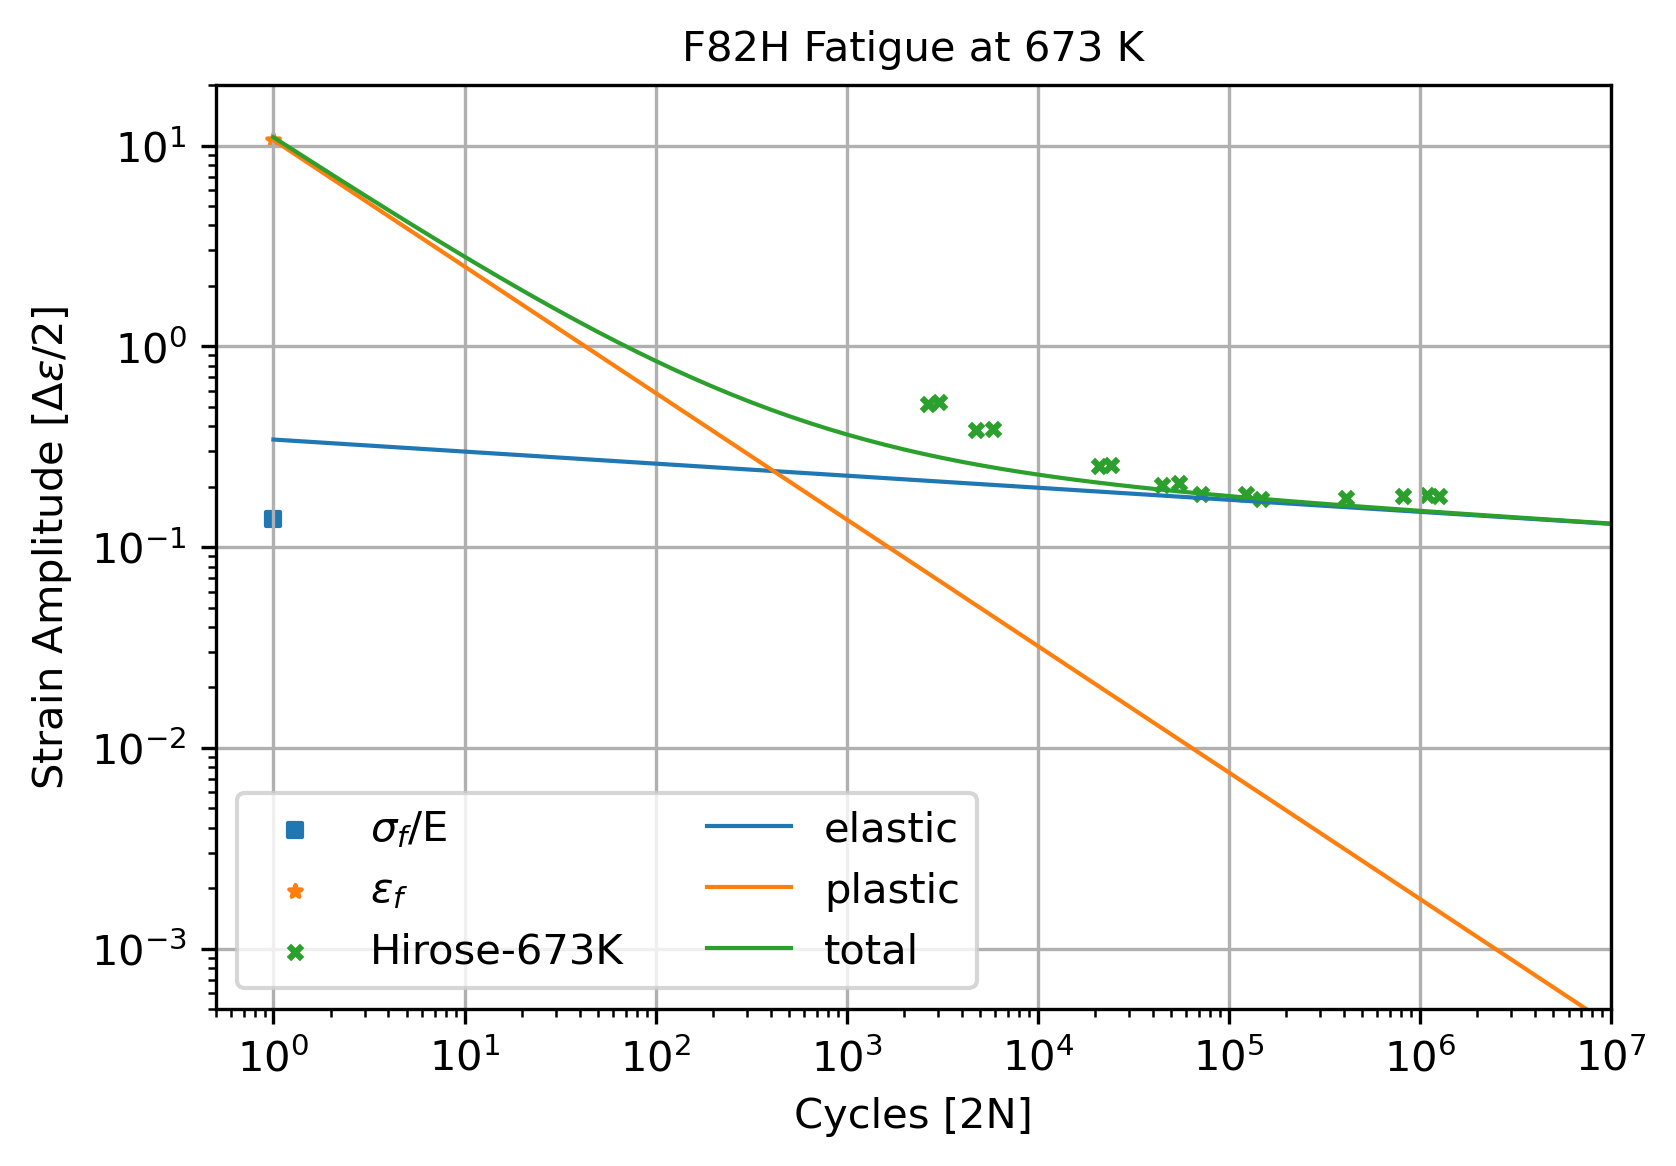

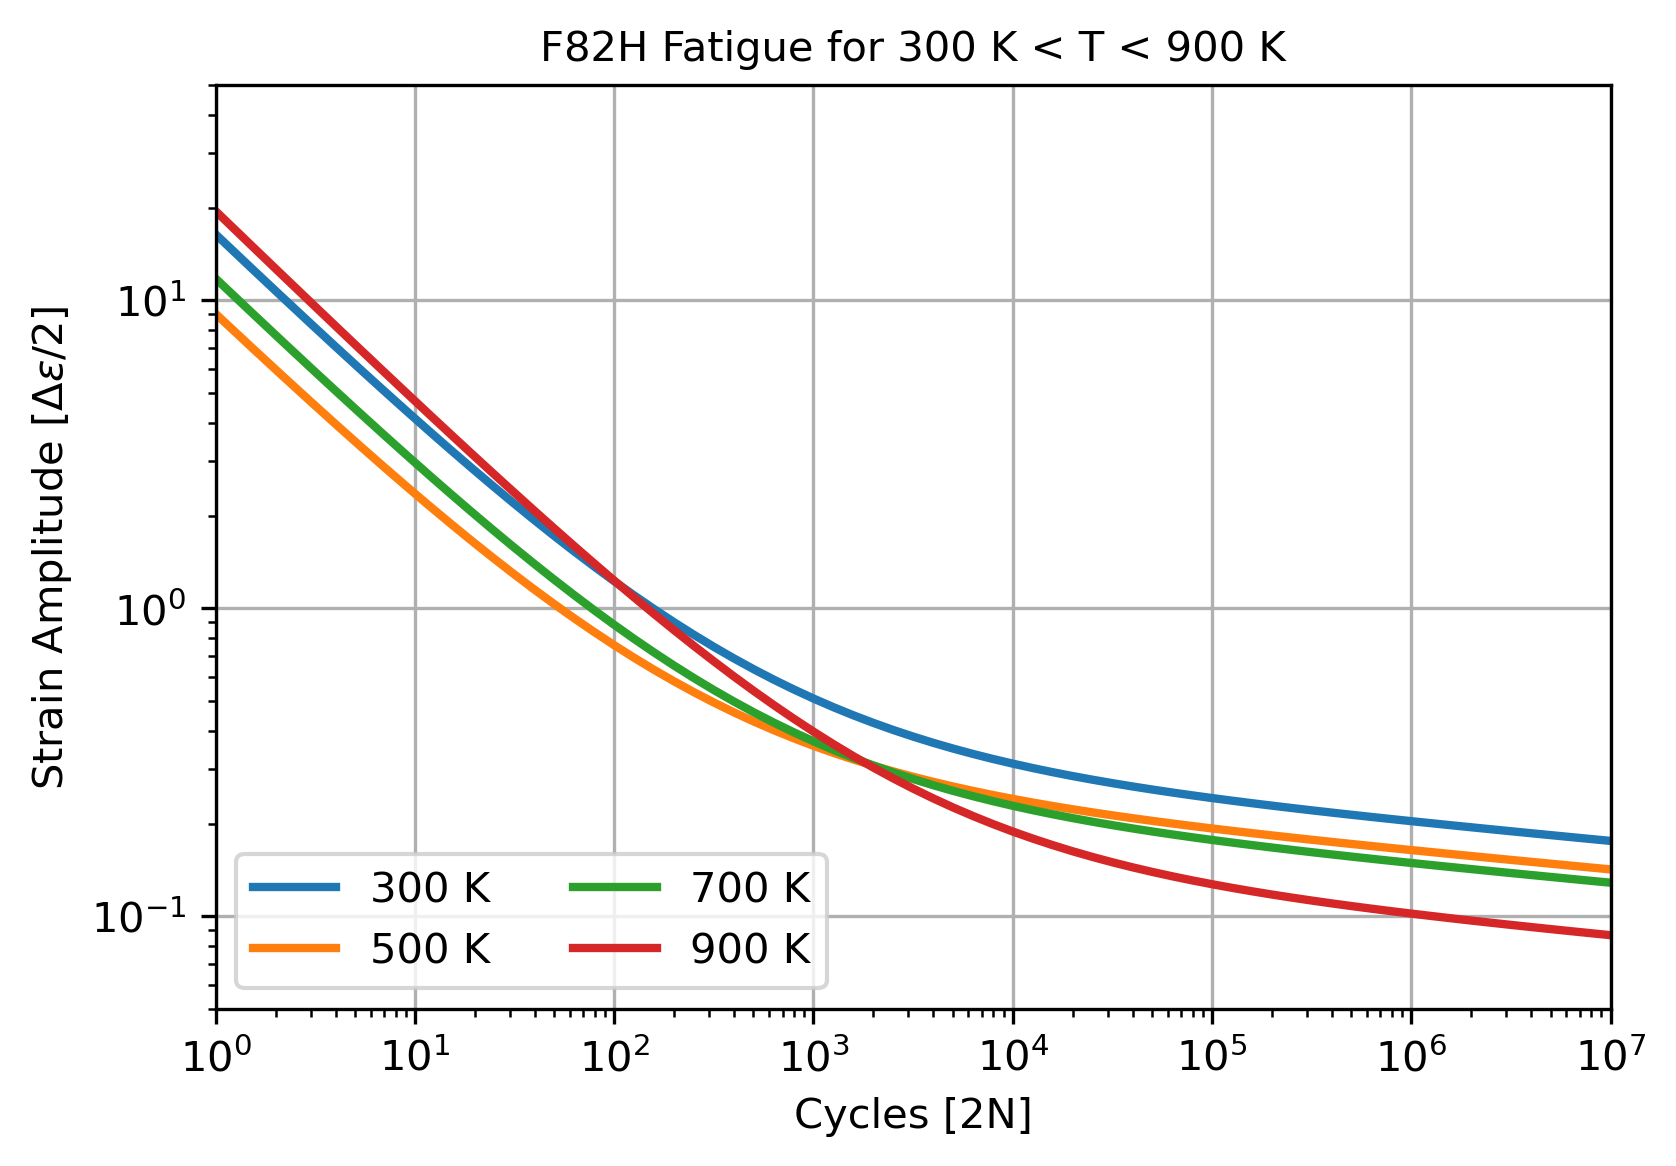

In [18]:
material_property = "Fatigue"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=15, room_temp=293, display_data_table_bool = True)

x_label = 'Cycles [2N]'
y_label = r'Strain Amplitude [$\Delta\epsilon/2$]'
x_lim = [0.5, 1e7]
y_lim = [5e-4, 2e1]

# Initialize fitting constants and functions
E = lambda T: 4.0761e11 - 3.5521e7 * T - 5.871e3 * T**2
e_tot = lambda T: 1e-2 * (62.09 - 0.2306 * T + 0.0003032 * T**2 - 1.082e-7 * T**3)
sig_u = lambda T: 1065 - 2.468 * T + 0.004087 * T**2 - 2.575e-6 * T**3
C = lambda T: 100 * np.log(1 + e_tot(T))
B = lambda T: 2.5 * (1 + e_tot(T)) * sig_u(T) * 1e8 / E(T)
b = -0.06
c = -0.63
del_eps_e = lambda T, n: B(T) * (n)**b
del_eps_p = lambda T, n: C(T) * (n)**c
del_eps_tot = lambda T, n: del_eps_e(T, n) + del_eps_p(T, n)

n = np.arange(0, 7, 0.1)
N2 = 2 * 10**n - 1

# Assemble raw and fit data for first plot
temp = 300
vars_x = variables[::2][:4]
vars_y = variables[1::2][:4]

x_data_list = [np.power(10, x) for x in vars_x]
y_data_list = [np.power(10, y) for y in vars_y]
y_data_list[-1] = 0.5e2 * y_data_list[-1]

x_data_list = [1] + [1] + x_data_list
y_data_list = [B(temp)/2.5] + [C(temp)] + y_data_list

x_fit_list = [N2]*3
y_fit_list = [del_eps_e(temp, N2), del_eps_p(temp, N2), del_eps_tot(temp, N2)] 

data_labels = [r'$\sigma_f$/E', r'$\epsilon_f$', 'Gelles-e', 'Gelles-p', 'Gelles-300K', 'Hirose-300K']
fit_labels = ['elastic', 'plastic', 'total']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 1

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label=x_label, y_label=y_label, title="F82H " + material_property + " at 300 K",\
                  scale='log-log', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)


# Assemble raw and fit data for second plot
temp = 673
vars_x = variables[::2][-1]
vars_y = variables[1::2][-1]

x_data_list = [np.power(10, vars_x)]
y_data_list = [np.power(10, vars_y)]
y_data_list[-1] = 0.5e2 * y_data_list[-1]

x_data_list = [1] + [1] + x_data_list
y_data_list = [B(temp)/2.5] + [C(temp)] + y_data_list

x_fit_list = [N2]*3
y_fit_list = [del_eps_e(temp, N2), del_eps_p(temp, N2), del_eps_tot(temp, N2)] 

data_labels = [r'$\sigma_f$/E', r'$\epsilon_f$', 'Hirose-673K']
fit_labels = ['elastic', 'plastic', 'total']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 1

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label=x_label, y_label=y_label, title="F82H " + material_property + " at 673 K",\
                  scale='log-log', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

# Assemble raw and fit data for third plot
x_lim = [1, 1e7]
y_lim = [5e-2, 5e1]
x_fit_list = [N2]*4
y_fit_list = [del_eps_tot(300, N2), del_eps_tot(500, N2), del_eps_tot(700, N2), del_eps_tot(900, N2)] 

fit_labels = ['300 K', '500 K', '700 K', '900 K']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list=None, y_data_list=None, x_fit_list=x_fit_list, y_fit_list=y_fit_list ,\
                  x_label=x_label, y_label=y_label, title="F82H " + material_property + " for 300 K < T < 900 K",\
                  scale='log-log', font_size=f_size, x_lim=x_lim, y_lim=y_lim,\
                  grid=True, legend=True, data_labels=None, fit_labels=fit_labels,\
                  data_colors=None, fit_colors=None, marker_size=m_size,\
                  fit_line_width=fit_line_width, x_label_font_size=f_size, y_label_font_size=f_size, title_font_size=f_size,\
                  legend_font_size=f_size, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

### 4.8 Fracture Toughness

,T_IEA_KT,IEA_KMPam^1/2
0,-160.545645,48.627568
1,-160.125918,38.015178
2,-160.125918,30.524541
3,-100.104932,65.387180
4,-100.104932,76.623135
5,-100.104932,97.222386
6,-100.104932,110.331000
7,-100.104932,130.930251
8,-100.104932,178.370950
9,-49.737671,97.768005


**Fitting parameters for F82H Fracture Toughness** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 17
    # variables        = 3
    chi-square         = 42688.2630
    reduced chi-square = 3049.16165
    Akaike info crit   = 139.083921
    Bayesian info crit = 141.583561
    R-squared          = 0.77198202
[[Variables]]
    c0:  39.4736021 +/- 217.091365 (549.97%) (init = 1)
    c1: -0.98676223 +/- 2.50087085 (253.44%) (init = 1)
    c2:  0.00835925 +/- 0.00689274 (82.46%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9928
    C(c0, c1) = -0.9877
    C(c0, c2) = +0.9635


**The equation for F82H Fracture Toughness is:**


<IPython.core.display.Latex object>

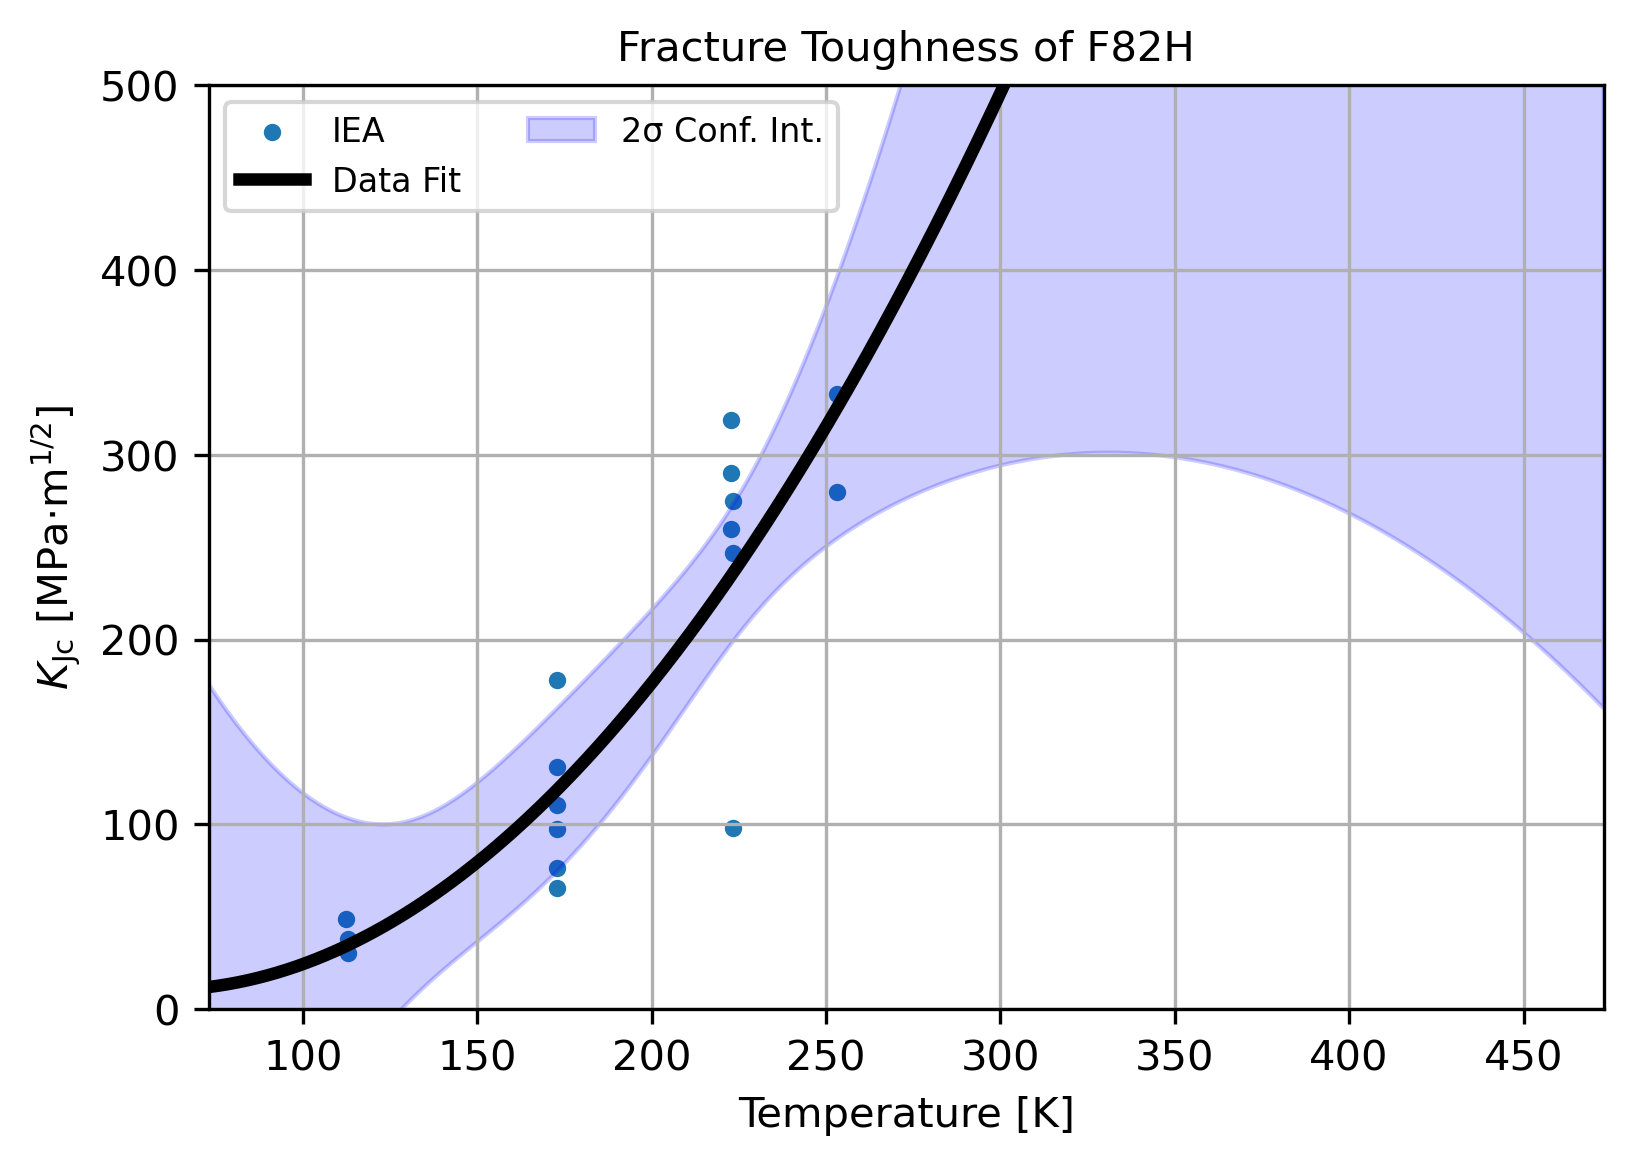

In [19]:
# Load excel data for desired property name
material_property = "Toughness"
var_names, variables, dataframe =\
    load_data(excel_filename, material_property,\
    header_rows_list=[2], num_data_rows=25, room_temp=293, display_data_table_bool = True)

x_label = 'Temperature [K]'
y_label = r'$K_\text{Jc}$ [MPa$\cdot$m$^{1/2}$]'
x_lim = [-200+273, 200+273]
y_lim = [0, 500]
data_labels = ["IEA"] # Replace '_' with your delimiter. Take [0] for the part in front of the delimiter.

# Temperature range and initializations
T = np.linspace(-200+273, 200+273, 1000)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2]
vars_y = variables[1::2]
X_data, Y_data = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
X_data += 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y

p = [1, 1, 1]
fit_result = get_model_fit_and_print_it(X_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name="Fracture " + material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title="Fracture " + material_property + " of " + material_name)

#### ghoniem2013
N. Ghoniem, R. Conn, Assessment of ferritic steels for steady-state fusion reactors, International Atomic Energy Agency, Vienna (Austria); Panel proceedings series IAEA-TC–392/62 (1983) 486–492. URL chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://inis.iaea.org/collection/NCLCollectionStore/_Public/53/051/53051820.pdf

#### gelles1985low
D. S. Gelles, N. M. Ghoniem, R. W. Powell, Low activation ferritic alloys, US Patent No. 4622067, Tech. rep., Hanford Engineering Development Lab., Richland, WA (United States) (1985).
URL https://www.osti.gov/biblio/5365778

#### ghoniem2013deformation
N. M. Ghoniem, G. Po, S. Sharafat, Deformation mechanisms in ferritic/martensitic steels and the impact on mechanical design, Journal of nuclear materials 441 (1-3) (2013) 704–712. URL https://www.sciencedirect.com/science/article/pii/S0022311513005485?casa_token=UYhjzEEBRB0AAAAA:j0Bi8Kzog7ca1mNEMSaKY9JOTF1yXkgp_Fcwj2AYjcmGf3cVuYfx0ID2EvKSPWuLQ8qta8SevgA

#### jitsukawa2002development
S. Jitsukawa, M. Tamura, B. Van der Schaaf, R. Klueh, A. Alamo, C. Petersen, M. Schirra, P. Spaetig, G. Odette, A. Tavassoli, et al., Development of an extensive database of mechanical and physical properties for reduced-activation martensitic steel f82h, Journal of Nuclear Materials 307 (2002) 179–186.

#### chaouadi2009radiation
R. Chaouadi, T. Hirai, J. Linke, G. Pintsuk, A radiation hardening model of 9% cr–martensitic steels including dpa and helium, Journal of nuclear materials 386 (2009) 544–549. URL https://www.sciencedirect.com/science/article/pii/S0022311508009239

#### tan2016development
L. Tan, L. L. Snead, Y. Katoh, Development of new generation reduced activation ferritic-martensitic
steels for advanced fusion reactors, Journal of Nuclear Materials 478 (2016) 42–49. URL https://www.sciencedirect.com/science/article/pii/S002231151630232X?casa_token=27f39PR0ABsAAAAA:5gVunHoH-W2X7vveNJMQNN8VOfnWVpkY6c7UVP5dqcg2WGDlwTsZx5P0joUkbjUvBgDTcfcWaKM

#### huang2011progress
Q. Huang, C. Li, Q. Wu, S. Liu, S. Gao, Z. Guo, Z. Yan, B. Huang, Y. Song, Z. Zhu, et al., Progress in development of clam steel and fabrication of small tbm in china, Journal of Nuclear Materials 417 (1-3) (2011) 85–88. URL https://www.sciencedirect.com/science/article/abs/pii/S002231151000992X

#### cheng1998concentration
E. Cheng, Concentration limits of natural elements in low activation fusion materials, Journal of
nuclear materials 258 (1998) 1767–1772. URL https://www.sciencedirect.com/science/article/pii/S0022311598001342?casa_token=7lwbfdE_ZDoAAAAA:gyZECxI1SCuDTlMC6fy-65SxGqwmwhyg1oEPUICRoSbtD1PXH5TTO466VQvnBvlIYjXuo1DmcQ8

#### lindau2005present
R. Lindau, A. M¨oslang, M. Rieth, M. Klimiankou, E. Materna-Morris, A. Alamo, A.-A. Tavassoli, C. Cayron, A.-M. Lancha, P. Fernandez, et al., Present development status of eurofer and ods-eurofer for application in blanket concepts, Fusion Engineering and design 75 (2005) 989–996. URL https://www.sciencedirect.com/science/article/pii/S0920379605003534?casa_token=\uu1qiCf4LSYAAAAA:OD8b1ar77jwS4JeyV3AXtCi2Nl4uOcPJTlcyuMzwu-54Yms7-r6vhvlBPflTpC_6WDnxDplXfqg

#### hirose2004effects
T. Hirose, K. Shiba, T. Sawai, S. Jitsukawa, M. Akiba, Effects of heat treatment process for blanket fabrication on mechanical properties of f82h, Journal of nuclear materials 329 (2004) 324–327. URL https://www.sciencedirect.com/science/article/pii/S0022311504001825?casa_token=8DVSGffxjysAAAAA:HHL0tzIxI4q0DEvE3ccDKEgVCbjpUkv4xqXcoiLNCKC4dhBuDeJvuUyZZG7gP82-SFhdp2oWS4c

#### haarmann1999t91 
K. Haarmann, J. Vaillant, B. Vandenberghe, W. Bendick, A. Arbab, The t91/p91 book, Vallourec & Mannesmann Tubes 19992002 (1999). URL https://drive.google.com/file/d/1QVk52zaIzUeyy-GXQO1e75YvxAHiZIVf/view?usp=sharing

#### chakraborty2022lath
A. Chakraborty, R. F. Webster, S. Primig, Lath martensite substructure evolution in low-carbon mi-croalloyed steels, Journal of Materials Science 57 (22) (2022) 10359–10378. URL https://link.springer.com/article/10.1007/s10853-022-07275-9

#### jia2003microstructure
X. Jia, Y. Dai, Microstructure in martensitic steels t91 and f82h after irradiation in sinq target-3, Journal of nuclear materials 318 (2003) 207–214. URL https://www.sciencedirect.com/science/article/abs/pii/S0022311503001016?casa_token=D0IRBN4C514AAAAA:aAyEzFHKYkfeeUb0_KaqMbNH3oaCJqtiq2gk5kVMhy-y9uqbg7qT7P9AvxNlnZaKVQLMp7qCbDQ

#### mahler2021microstructure
M. Mahler, G. Po, Y. Cui, N. Ghoniem, J. Aktaa, Microstructure-specific hardening of ferritic-martensitic steels pre and post 15 dpa neutron irradiation at 330° c: a dislocation dynamics study, Nuclear materials and energy 26 (2021) 100814. URL https://www.sciencedirect.com/science/article/pii/S2352179120300892

[15] A.-A. Tavassoli, Present limits and improvements of structural materials for fusion reactors–a review,
Journal of Nuclear Materials 302 (2-3) (2002) 73–88. 13

[16] A.-A. Tavassoli, J.-W. Rensman, M. Schirra, K. Shiba, Materials design data for reduced activation
martensitic steel type f82h, Fusion Engineering and Design 61 (2002) 617–628. 13, 14, 15, 16, 17, 18,
20, 22, 23, 24, 25, 26, 27

[17] C. Davisson, J. Weeks, The relation between the total thermal emissive power of a metal and its
electrical resistivity, JOSA 8 (5) (1924) 581–605.
URL https://opg.optica.org/view_article.cfm?pdfKey=6af3cca3-d637-4e09-869803cd0c47093e_
47617 18

[18] A. Sievers, Thermal radiation from metal surfaces, JOSA 68 (11) (1978) 1505–1516.
URL https://opg.optica.org/directpdfaccess/83053044-daa6-46e1-888e95578640cd01_
57333/josa-68-11-1505.pdf?da=1&id=57333&seq=0&mobile=no 18

[19] T. Ech´aniz, I. G. de Arrieta, A. Gil-Mu˜noz, J. Fern´andez-Pereda, R. Fuente, M. Klimenkov, G. L´opez,
Infrared emissivity of reduced-activation eurofer 97 for fusion reactor applications, Journal of Nuclear
Materials 549 (2021) 152907.
URL https://www.sciencedirect.com/science/article/pii/S0022311521001318 19

[20] E. Daum, K. Ehrlich, M. Schirra, Proceedings of the second milestone meeting of european laboratories
on the development of ferritic/martensitic steels for fusion technology (1997).
URL https://publikationen.bibliothek.kit.edu/270041382 22, 23, 24, 25, 26, 27

[21] R. Klueh, Proceedings of the iea working group meeting on ferritic/martensitic steels, Tech. rep., Oak
Ridge National Lab. (1996).
URL https://inis.iaea.org/collection/NCLCollectionStore/_Public/28/080/28080146.pdf
22, 23, 24, 25, 26, 27
79                                                    

[22] M. F. Ashby, A first report on deformation-mechanism maps, Acta Metallurgica 20 (7) (1972) 887–897.
URL https://www.sciencedirect.com/science/article/pii/000161607290082X?casa_token=
NCDAoD8OvLAAAAAA:VcKewv_whUyB_Dextx6vMHWD6k_TAhWeIFLj-YXwEk-Syy1kvcp5hqzDVWFKUH3uyMk7RV4nDaQ
30, 31

[23] H. J. Frost, M. F. Ashby, Deformation-mechanism maps: the plasticity and creep of metals and ceramics,
(No Title) (1982). 30

[24] K. Shiba, M. Suzuki, A. Hishinuma, Irradiation response on mechanical properties of neutron irradiated
f82h, Journal of Nuclear materials 233 (1996) 309–312.
URL https://www.sciencedirect.com/science/article/abs/pii/S0022311596002231 30

[25] A. K. Mukherjee, J. E. Bird, J. E. Dorn, Experimental correlations for high-temperature creep (1968).
URL chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://escholarship.org/
content/qt31p4z5v2/qt31p4z5v2.pdf 32

[26] H. J. Ryu, Y. S. Kim, A. Yacout, Thermal creep modeling of ht9 steel for fast reactor applications,
Journal of nuclear materials 409 (3) (2011) 207–213.
URL https://www.sciencedirect.com/science/article/pii/S0022311510010676 34

[27] T. Shrestha, M. Basirat, I. Charit, G. P. Potirniche, K. K. Rink, Creep rupture behavior of grade 91
steel, Materials Science and Engineering: A 565 (2013) 382–391.
URL https://www.sciencedirect.com/science/article/pii/S0921509312017194 37, 38

[28] M. Tamura, M. M. Nowell, K. Shinozuka, H. Esaka, Creep behavior of double tempered 8% cr-2% wvta
martensitic steel, Materials transactions 47 (5) (2006) 1332–1340.
URL https://www.jstage.jst.go.jp/article/matertrans/47/5/47_5_1332/_pdf 41

[29] K. Shinozuka, H. Esaka, H. Sakasegawa, H. Tanigawa, Creep strength and microstructure of f82h steels
near tempering temperature, Journal of Nuclear Materials 464 (2015) 155–159. doi:https://doi.org/
10.1016/j.jnucmat.2015.04.035.
URL https://www.sciencedirect.com/science/article/pii/S0022311515002457 42

[30] R. G. Budynas, J. K. Nisbett, et al., Shigley’s mechanical engineering design, Vol. 8, McGraw-Hill New
York, 2008. 43, 44

[31] D. S. Gelles, N. M. Ghoniem, R. W. Powell, Low activation ferritic alloys, uS Patent 4,622,067 (Nov. 11
1986). 45

[32] T. Hirose, T. Kato, H. Sakasegawa, H. Tanigawa, T. Nozawa, Evaluation of fatigue properties of reduced
activation ferritic/martensitic steel, f82h for development of design criteria, Fusion Engineering and
Design 160 (2020) 111823. doi:https://doi.org/10.1016/j.fusengdes.2020.111823.
URL https://www.sciencedirect.com/science/article/pii/S0920379620303719 45, 46

[33] M. Makin, F. Minter, Irradiation hardening in copper and nickel, Acta Metallurgica 8 (10) (1960) 691–
699.
URL https://www.sciencedirect.com/science/article/pii/0001616060902005 47

[34] H. Trinkaus, The effect of cascade induced gas resolution on bubble formation in metals, Journal of
nuclear materials 318 (2003) 234–240.
URL https://www.sciencedirect.com/science/article/pii/S002231150300103X?casa_token=
90X1wPjVsEkAAAAA:2Z9ijHA9H6LjW25fqsj_ofD8yoFFfYctiEbczTwl5Eg7xmQShingvuIySCAFYdDGTc6k5dqDTME
47
80

[35] T. Yamamoto, G. R. Odette, H. Kishimoto, J.-W. Rensman, P. Miao, On the effects of irradiation and
helium on the yield stress changes and hardening and non-hardening embrittlement of 8cr tempered
martensitic steels: Compilation and analysis of existing data, Journal of nuclear materials 356 (1-3)
(2006) 27–49.
URL https://www.sciencedirect.com/science/article/pii/S0022311506002418?casa_
token=MiqeuMK4H_sAAAAA:yAuneQmW0_R5_2EhbrgljPpP0PJBuogzAckJ1McqDX3uAhNecOdAHHf_
STMAfKcPcYfCEqWHApA 47, 48

[36] E. Gaganidze, J. Aktaa, Assessment of neutron irradiation effects on rafm steels, Fusion Engineering
and Design 88 (3) (2013) 118–128.
URL https://www.sciencedirect.com/science/article/pii/S0920379612005364?casa_token=
ADuHwhFwETAAAAAA:CsQBQLLjjxausjxvsElCiAcIUJ97550qtrdF1Tp7kU11owMcVA6rstrJ-fcpCi8jchf3cKOAT_
c 51, 54

[37] E. Gaganidze, C. Petersen, Post irradiation examination of rafm steels after fast reactor irradiation up
to 71 dpa and¡ 340 c (arbor 2). rafm steels. metallurgical and mechanical characterisation. final report
for tw5-ttms-001, d 10 (2011).
URL https://www.osti.gov/etdeweb/biblio/22599430 52, 54

[38] T. Yamamoto, G. R. Odette, A fusion relevant data-driven engineering void swelling model for 9cr
tempered martensitic steels, Journal of Nuclear Materials 576 (2023) 154085.
URL https://www.sciencedirect.com/science/article/pii/S0022311522005669 57

[39] A. Brailsford, R. Bullough, The rate theory of swelling due to void growth in irradiated metals, Journal
of Nuclear Materials 44 (2) (1972) 121–135. doi:https://doi.org/10.1016/0022-3115(72)90091-8.
URL https://www.sciencedirect.com/science/article/pii/0022311572900918 57, 58

[40] E. Wakai, N. Hashimoto, Y. Miwa, J. Robertson, R. Klueh, K. Shiba, S. Jistukawa, Effect of helium
production on swelling of f82h irradiated in hfir, Journal of Nuclear Materials 283-287 (2000) 799–805,
9th Int. Conf. on Fusion Reactor Materials. doi:https://doi.org/10.1016/S0022-3115(00)00268-3.
URL https://www.sciencedirect.com/science/article/pii/S0022311500002683 57, 59, 60

[41] E. Getto, K. Sun, A. Monterrosa, Z. Jiao, M. Hackett, G. Was, Void swelling and microstructure
evolution at very high damage level in self-ion irradiated ferritic-martensitic steels, Journal of Nuclear
Materials 480 (2016) 159–176. doi:https://doi.org/10.1016/j.jnucmat.2016.08.015.
URL https://www.sciencedirect.com/science/article/pii/S0022311516305931 57, 59, 60

[42] K. Ehrlich, Irradiation creep and interrelation with swelling in austenitic stainless steels, Journal of
Nuclear Materials 100 (1) (1981) 149–166. doi:https://doi.org/10.1016/0022-3115(81)90531-6.
URL https://www.sciencedirect.com/science/article/pii/0022311581905316 61, 69

[43] S. Jitsukawa, A. Kimura, A. Kohyama, R. Klueh, A. Tavassoli, B. Van der Schaaf, G. Odette,
J. Rensman, M. Victoria, C. Petersen, Recent results of the reduced activation ferritic/martensitic
steel development, Journal of Nuclear Materials 329 (2004) 39–46.
URL https://www.sciencedirect.com/science/article/pii/S0022311504001229?casa_token=
kDGkrTvtzpAAAAAA:utHXgwWp1BB-eSuGg9PJEpj2MJ7gl1sn7Y8nOoaHZPfrceVFWV7ArpjtzeFx3dnGGsqMr8IsO8g
64

[44] R. Klueh, D. Gelles, S. Jitsukawa, A. Kimura, G. Odette, B. Van der Schaaf, M. Victoria, Ferritic/-
martensitic steels–overview of recent results, Journal of Nuclear Materials 307 (2002) 455–465.
URL https://www.sciencedirect.com/science/article/pii/S0022311502010826?casa_token=
0I39hI1WGvcAAAAA:npMtr78a9Y3-ZS0nuJi_nniiiItI3IJqMz70ZwlxRSVIsypGWJ7cKaaQvMtqA6izww8cMDNVjDY
65, 66
81

[45] K. Herschbach, W. Schneider, K. Ehrlich, Effects of minor alloying elements upon swelling and in-pile
creep in model plain fe-15cr-15ni stainless steels and in commercial din 1.4970 alloys, Journal of Nuclear
Materials 203 (3) (1993) 233–248. doi:https://doi.org/10.1016/0022-3115(93)90380-H.
URL https://www.sciencedirect.com/science/article/pii/002231159390380H 69

[46] F. Garner, M. Toloczko, B. Sencer, Comparison of swelling and irradiation creep behavior of fcc-
austenitic and bcc-ferritic/martensitic alloys at high neutron exposure, Journal of Nuclear Materials
276 (1) (2000) 123–142. doi:https://doi.org/10.1016/S0022-3115(99)00225-1.
URL https://www.sciencedirect.com/science/article/pii/S0022311599002251 69

[47] M. Ando, T. Nozawa, T. Hirose, H. Tanigawa, E. Wakai, R. E. Stoller, J. Myers, Effect of helium on
irradiation creep behavior of b-doped f82h irradiated in hfir, Fusion Science and Technology 68 (3)
(2015) 648–651. arXiv:https://doi.org/10.13182/FST14-963, doi:10.13182/FST14-963.
URL https://doi.org/10.13182/FST14-963 69, 70

[48] P. Tortorelli, Dissolution kinetics of steels exposed in lead-lithium and lithium environments, Journal of
Nuclear Materials 191-194 (1992) 965–969. doi:https://doi.org/10.1016/0022-3115(92)90617-T.
URL https://www.sciencedirect.com/science/article/pii/002231159290617T 73

[49] O. Chopra, D. Smith, Compatibility of ferrous alloys in a forced circulation pb-17li system, Journal of
Nuclear Materials 141-143 (1986) 566–570. doi:https://doi.org/10.1016/0022-3115(86)90055-3.
URL https://www.sciencedirect.com/science/article/pii/0022311586900553 73, 74

[50] O. Chopra, D. Smith, Compatibility of ferritic steels in forced circulation lithium and pb-17li systems,
Journal of Nuclear Materials 155-157 (1988) 715–721. doi:https://doi.org/10.1016/0022-3115(88)
90402-3.
URL https://www.sciencedirect.com/science/article/pii/0022311588904023 73, 74
82